
    =================================================
    Graded Challenge 4

    Nama  : Putri Arzalya Maharani
    Batch : HCK-013

    Program ini dibuat untuk memprediksi harga perjalanan platform ride-hailing berdasarkan korelasi antar variabel untuk menentukan faktor apa yang mempengaruhi harga kemudian membangun model LinearRegression untuk memperoleh output harga perjalanan berdasarkan faktor-faktor tersebut.
    =================================================

# Importing Library

In [116]:
# Library untuk Data Manipulation
import pandas as pd
import numpy as np

# Library untuk plot
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Library untuk uji statistik
from scipy.stats import pearsonr, spearmanr, kendalltau

# Library untuk Modelling
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from feature_engine.outliers import Winsorizer
from statsmodels.stats.stattools import durbin_watson

# Model Saving
import pickle
import json

# Data Loading

In [117]:
# Membuka isi dari dataset
data = pd.read_csv("/Users/putriarzalya/Downloads/rideshare_kaggle.csv")

data.head(5)

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...             0.1276  1544979600           39.89   
1     Lyft  ...             0.1300  1543251600           40.49   
2     Lyft  ...             0.1064  1543338000           35.36   
3     Lyft  ...             0.0000  1543507200           34.67   
4     Lyft  ...             0.0001  1543420800           33.10   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1545012000           43.68          1544968800   
1          1543233600           47.30          1543251600   
2          1543377600           47.55          1543320000   
3          1543550400           45.03          1543510800   
4          1543402800           42.18          1543420800   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   33.73                  1545012000                   38.07   
1                   36.20                  1543291200                   43.92   
2                   31.04                  1543377600                   44.12   
3                   30.30                  1543550400                   38.53   
4                   29.11                  1543392000                   35.75   

  apparentTemperatureMaxTime  
0                 1544958000  
1                 1543251600  
2                 1543320000  
3                 1543510800  
4                 1543420800  

[5 rows x 57 columns]

- Dataset ini terdapat 693.071 baris dan 57 kolom.

In [69]:
# Mengetahui info terkait missing value dan jenis data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

- Berdasarkan info, kolom "price" memiliki missing value.
- Tipe data yang diperoleh dari info yaitu terdapat tipe data object, float64, dan int64.

# Exploratory Data Analysis (EDA)

In [70]:
# Menampilkan persebaran statistik data
data.describe(include='all').T

count  unique  \
id                             693071  693071   
timestamp                    693071.0     NaN   
hour                         693071.0     NaN   
day                          693071.0     NaN   
month                        693071.0     NaN   
datetime                       693071   31350   
timezone                       693071       1   
source                         693071      12   
destination                    693071      12   
cab_type                       693071       2   
product_id                     693071      13   
name                           693071      13   
price                        637976.0     NaN   
distance                     693071.0     NaN   
surge_multiplier             693071.0     NaN   
latitude                     693071.0     NaN   
longitude                    693071.0     NaN   
temperature                  693071.0     NaN   
apparentTemperature          693071.0     NaN   
short_summary                  693071       9   
long_summary                   693071      11   
precipIntensity              693071.0     NaN   
precipProbability            693071.0     NaN   
humidity                     693071.0     NaN   
windSpeed                    693071.0     NaN   
windGust                     693071.0     NaN   
windGustTime                 693071.0     NaN   
visibility                   693071.0     NaN   
temperatureHigh              693071.0     NaN   
temperatureHighTime          693071.0     NaN   
temperatureLow               693071.0     NaN   
temperatureLowTime           693071.0     NaN   
apparentTemperatureHigh      693071.0     NaN   
apparentTemperatureHighTime  693071.0     NaN   
apparentTemperatureLow       693071.0     NaN   
apparentTemperatureLowTime   693071.0     NaN   
icon                           693071       7   
dewPoint                     693071.0     NaN   
pressure                     693071.0     NaN   
windBearing                  693071.0     NaN   
cloudCover                   693071.0     NaN   
uvIndex                      693071.0     NaN   
visibility.1                 693071.0     NaN   
ozone                        693071.0     NaN   
sunriseTime                  693071.0     NaN   
sunsetTime                   693071.0     NaN   
moonPhase                    693071.0     NaN   
precipIntensityMax           693071.0     NaN   
uvIndexTime                  693071.0     NaN   
temperatureMin               693071.0     NaN   
temperatureMinTime           693071.0     NaN   
temperatureMax               693071.0     NaN   
temperatureMaxTime           693071.0     NaN   
apparentTemperatureMin       693071.0     NaN   
apparentTemperatureMinTime   693071.0     NaN   
apparentTemperatureMax       693071.0     NaN   
apparentTemperatureMaxTime   693071.0     NaN   

                                                              top    freq  \
id                           424553bb-7174-41ea-aeb4-fe06d4f4b9d7       1   
timestamp                                                     NaN     NaN   
hour                                                          NaN     NaN   
day                                                           NaN     NaN   
month                                                         NaN     NaN   
datetime                                      2018-11-26 23:21:14     156   
timezone                                         America/New_York  693071   
source                                         Financial District   58857   
destination                                    Financial District   58851   
cab_type                                                     Uber  385663   
product_id                   6f72dfc5-27f1-42e8-84db-ccc7a75f6969   55096   
name                                                       UberXL   55096   
price                                                         NaN     NaN   
distance                                                      NaN     NaN   
surge_multiplier                  

In [71]:
# Mengetahui jumlah value yang unik pada tiap kolom
data.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

# Duplicate Handling

In [65]:
data.duplicated().sum()

0

- Pada dataset yang digunakan tidak ada data yang duplikat.

### Mengetahui missing value dalam dataset

In [72]:
# Menghitung persentase nilai yang hilang dalam setiap kolom
percent_missing = (data.isnull().sum() * 100 / len(data)).round(2)
missing_value_data = pd.DataFrame({'column': data.columns, 'percent_missing': percent_missing})
missing_value_data.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_data

column  percent_missing
price                                              price             7.95
id                                                    id             0.00
ozone                                              ozone             0.00
temperatureLowTime                    temperatureLowTime             0.00
apparentTemperatureHigh          apparentTemperatureHigh             0.00
apparentTemperatureHighTime  apparentTemperatureHighTime             0.00
apparentTemperatureLow            apparentTemperatureLow             0.00
apparentTemperatureLowTime    apparentTemperatureLowTime             0.00
icon                                                icon             0.00
dewPoint                                        dewPoint             0.00
pressure                                        pressure             0.00
windBearing                                  windBearing             0.00
cloudCover                                    cloudCover             0.00
uvIndex                                          uvIndex             0.00
visibility.1                                visibility.1             0.00
sunriseTime                                  sunriseTime             0.00
temperatureHighTime                  temperatureHighTime             0.00
sunsetTime                                    sunsetTime             0.00
moonPhase                                      moonPhase             0.00
precipIntensityMax                    precipIntensityMax             0.00
uvIndexTime                                  uvIndexTime             0.00
temperatureMin                            temperatureMin             0.00
temperatureMinTime                    temperatureMinTime             0.00
temperatureMax                            temperatureMax             0.00
temperatureMaxTime                    temperatureMaxTime             0.00
apparentTemperatureMin            apparentTemperatureMin             0.00
apparentTemperatureMinTime    apparentTemperatureMinTime             0.00
apparentTemperatureMax            apparentTemperatureMax             0.00
temperatureLow                            temperatureLow             0.00
temperatureHigh                          temperatureHigh             0.00
timestamp                                      timestamp             0.00
surge_multiplier                        surge_multiplier             0.00
hour                                                hour             0.00
day                                                  day             0.00
month                                              month             0.00
datetime                                        datetime             0.00
timezone                                        timezone             0.00
source                                            source             0.00
destination                                  destination             0.00
cab_type                                        cab_type             0.00
product_id                                    product_id             0.00
name                                                name             0.00
distance                                        distance             0.00
latitude                                        latitude             0.00
visibility                                    visibility             0.00
longitude                                      longitude             0.00
temperature                                  temperature             0.00
apparentTemperature                  apparentTemperature             0.00
short_summary                              short_summary             0.00
long_summary                                long_summary             0.00
precipIntensity                          precipIntensity             0.00
precipProbability                      precipProbability             0.00
humidity                                        humidity             0.00
windSpeed                                      windSpe

- Pada kolom price memiliki missing value sebanyak 7.95% dari total keseluruhan data.

### Bagaimana Distribusi Data?

- Apakah data memiliki distribusi normal atau tidak?
- Apakah ada pencilan (outliers) dalam data?
- Box plot juga dapat memberikan gambaran tentang distribusi data. Jika data terdistribusi normal, box plot akan menunjukkan bahwa median berada di tengah kotak (IQR) dan garis median box akan sejajar dengan garis tengah box. Outlier juga dapat dilihat pada box plot.

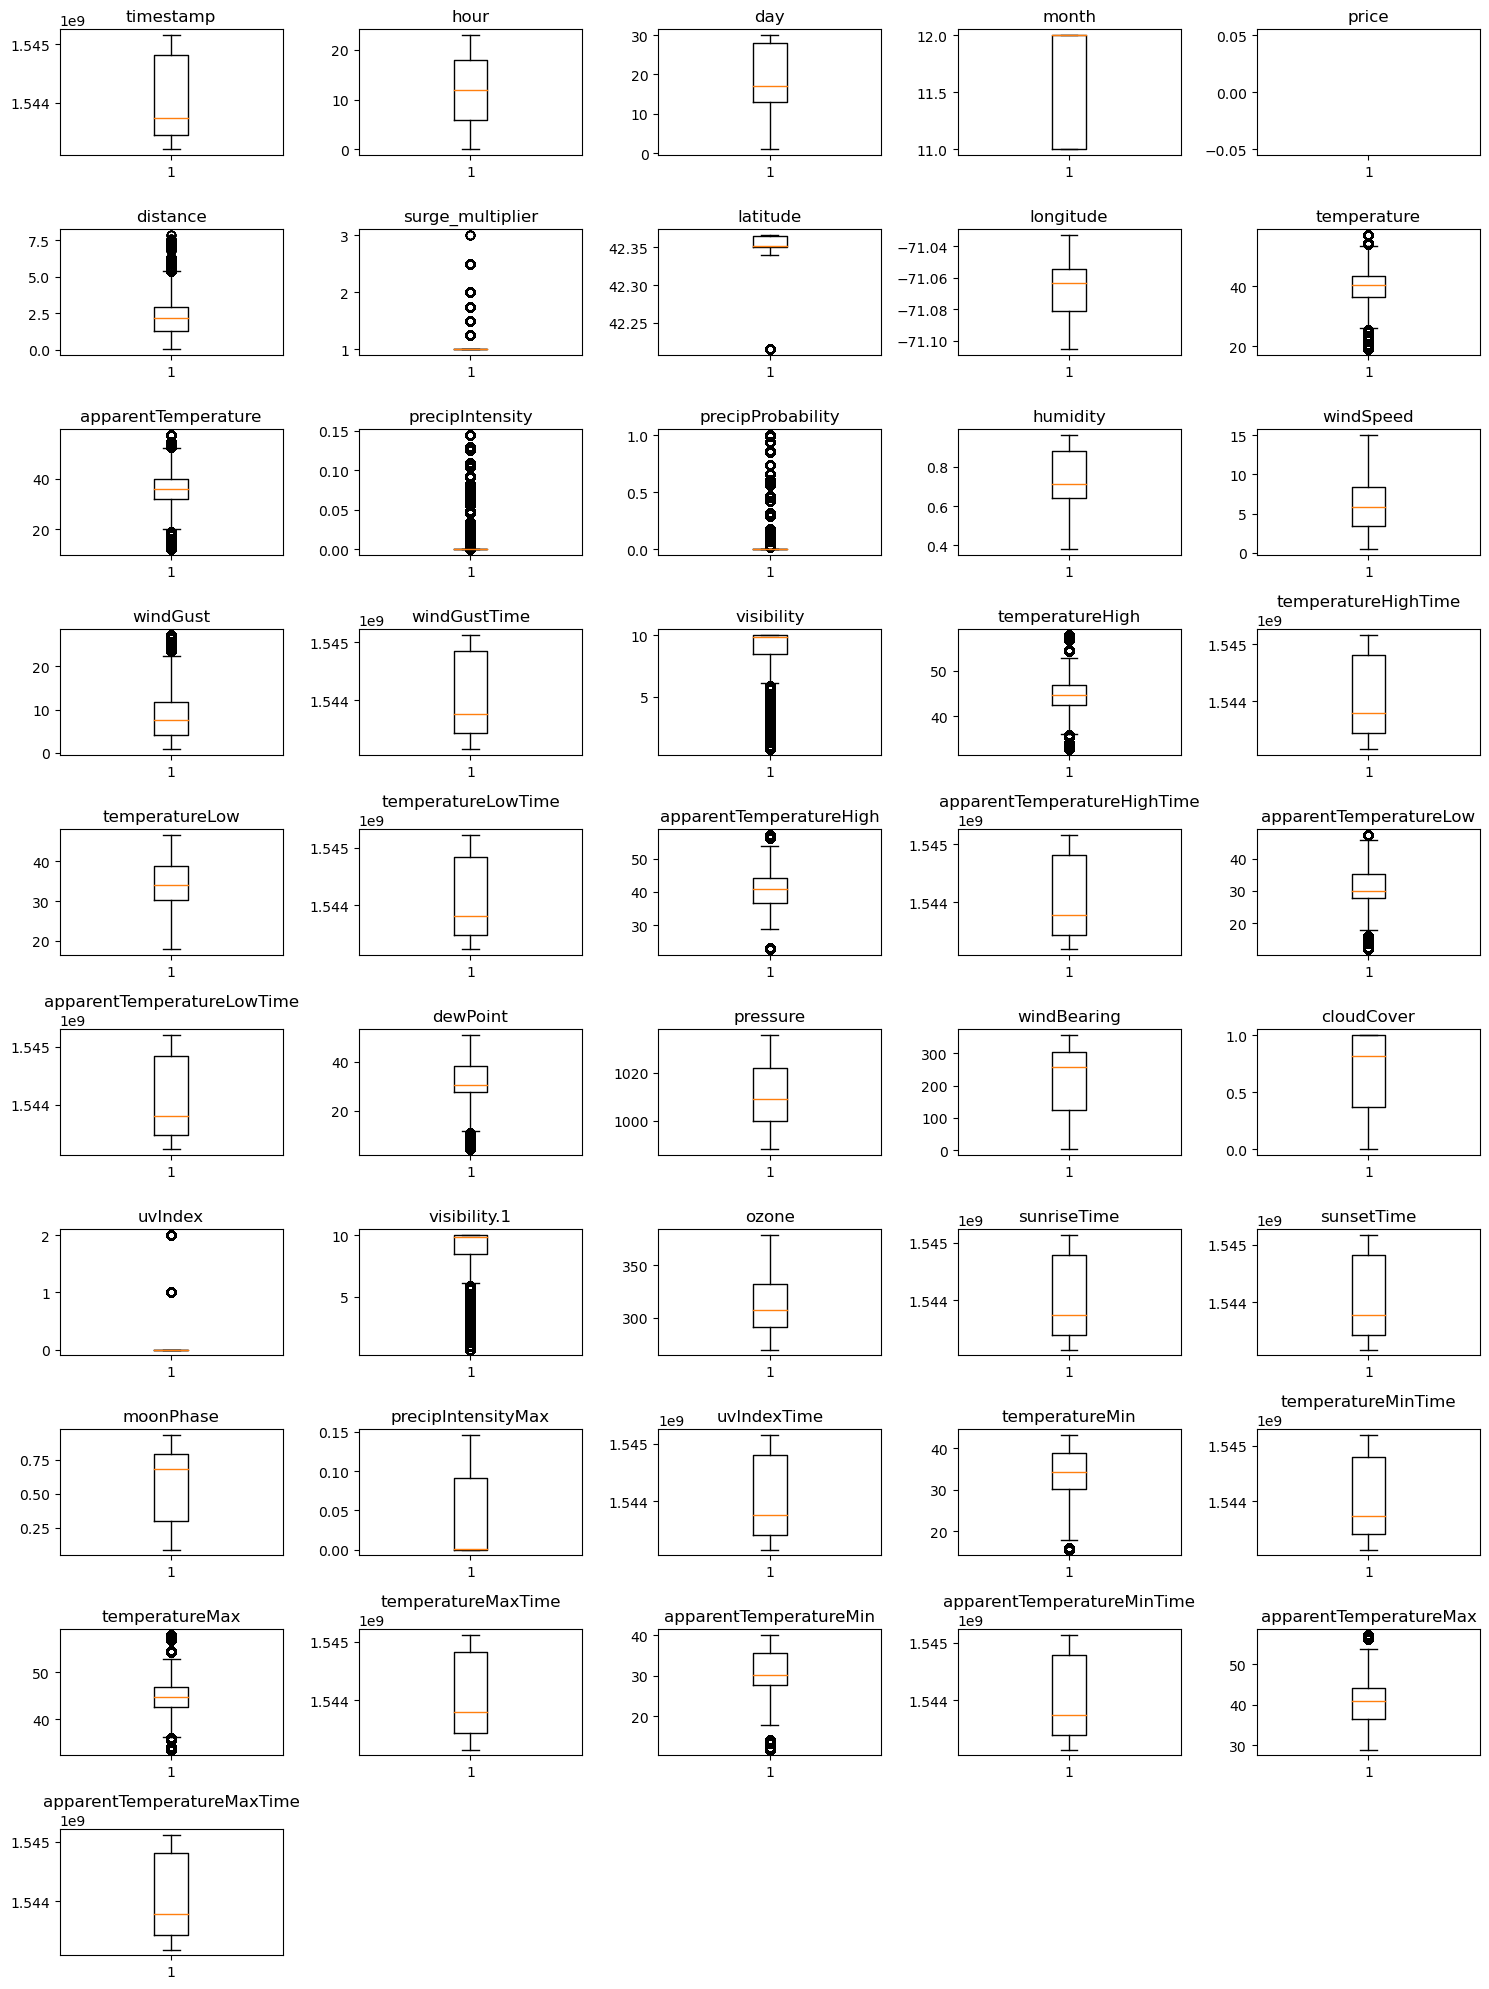

In [73]:
data_num_cols = data.columns[data.dtypes != object]

# numeric column
fig, axes = plt.subplots(10, 5, figsize=(15, 20))
axes = axes.flatten()
# Creating boxplot
for i, column in enumerate(data_num_cols):
   axes[i].boxplot(data[column])
   axes[i].set_title(column)
    
# Removing the unused plots
for j in range(len(data_num_cols), len(axes)):
   axes[j].axis('off')

plt.tight_layout()

plt.show()

- Terlihat outlier di beberapa kolom seperti distance, surge_multiplier, latitude, temperature, apparentTemperature, precipIntensiy, precipProbability, windGust, Visibility, temperatureHigh, apparentTemperatureHigh, apparentTemperatureLow, dewPoint, Visibility.1, temperatureMin, temperatureMax, apparentTemperatureMin, apparentTemperatureMax.

- Terlihat beberapa memiliki distribusi normal seperti hour. Kolom lainnya maish ada yang terdistribusi normal tetapi memiliki condong ke bawah atau atas. 

**Korelasi Antar Variabel**

- Apakah ada hubungan antara variabel dalam dataset?
- Bagaimana hubungan antara variabel-variabel tersebut?

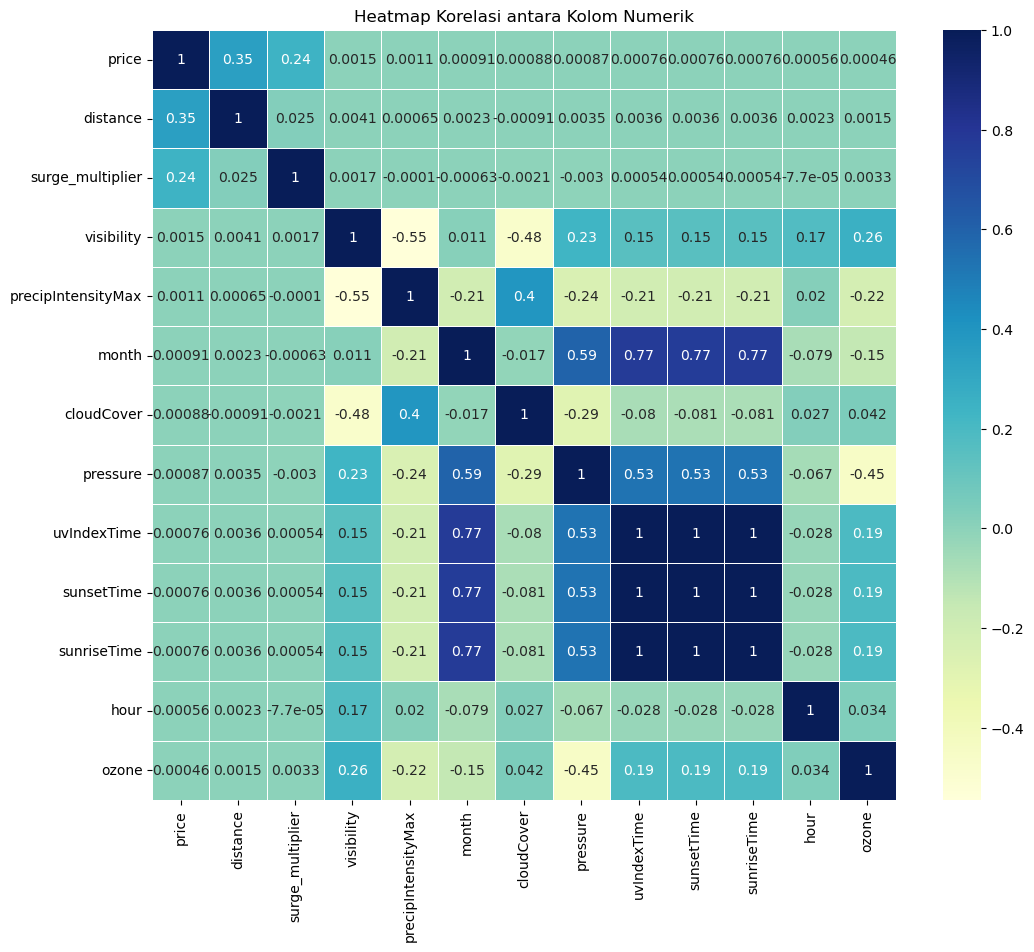

In [99]:
# Kolom numerik yang akan dianalisis
numeric_columns = ['price', 'distance', 'surge_multiplier', 'visibility', 'precipIntensityMax', 'month', 
                  'cloudCover', 'pressure', 
                  'uvIndexTime', 'sunsetTime', 'sunriseTime', 'hour', 'ozone']

# Buat heatmap korelasi
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap Korelasi antara Kolom Numerik')
plt.show()

-**Berdasarkan Heatmap, kolom yang memiliki korelasi kuat yaitu :**
- uvIndexTime dengan SunriseTime
- uvIndexTime dengan SunsetTime

-**Korelasi yang tidak kuat tapi dapat dikatakan berkorelasi :**
- Price dengan distance, surge_multiplier
- Visibility dengan pressure, ozone
- Month dengan pressure, uvIndexTime, SunriseTime, SunsetTime

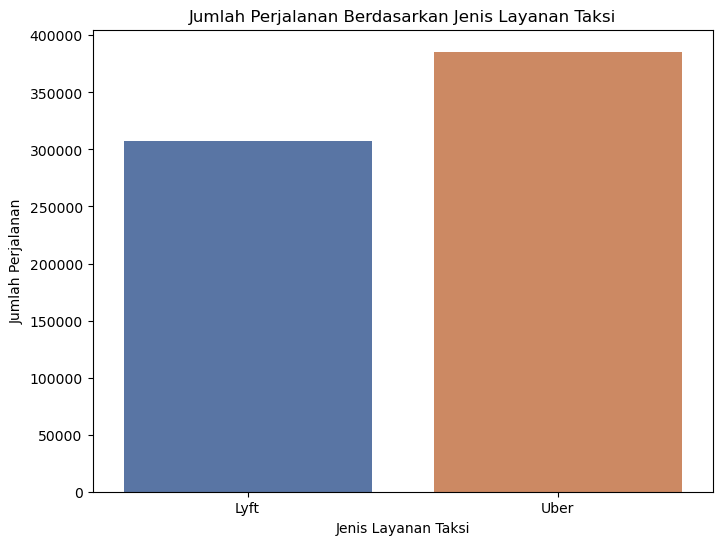

In [114]:
# Membuat plot berdasarkan jenis layanan taksi
plt.figure(figsize=(8, 6))
sns.countplot(x='cab_type', data=data, palette='deep')
plt.title('Jumlah Perjalanan Berdasarkan Jenis Layanan Taksi')
plt.xlabel('Jenis Layanan Taksi')
plt.ylabel('Jumlah Perjalanan')
plt.show()

- Layanan taksi "Uber" lebih sering dipilih oleh konsumen dibandingkan dengan layanan taksi "Lyft".

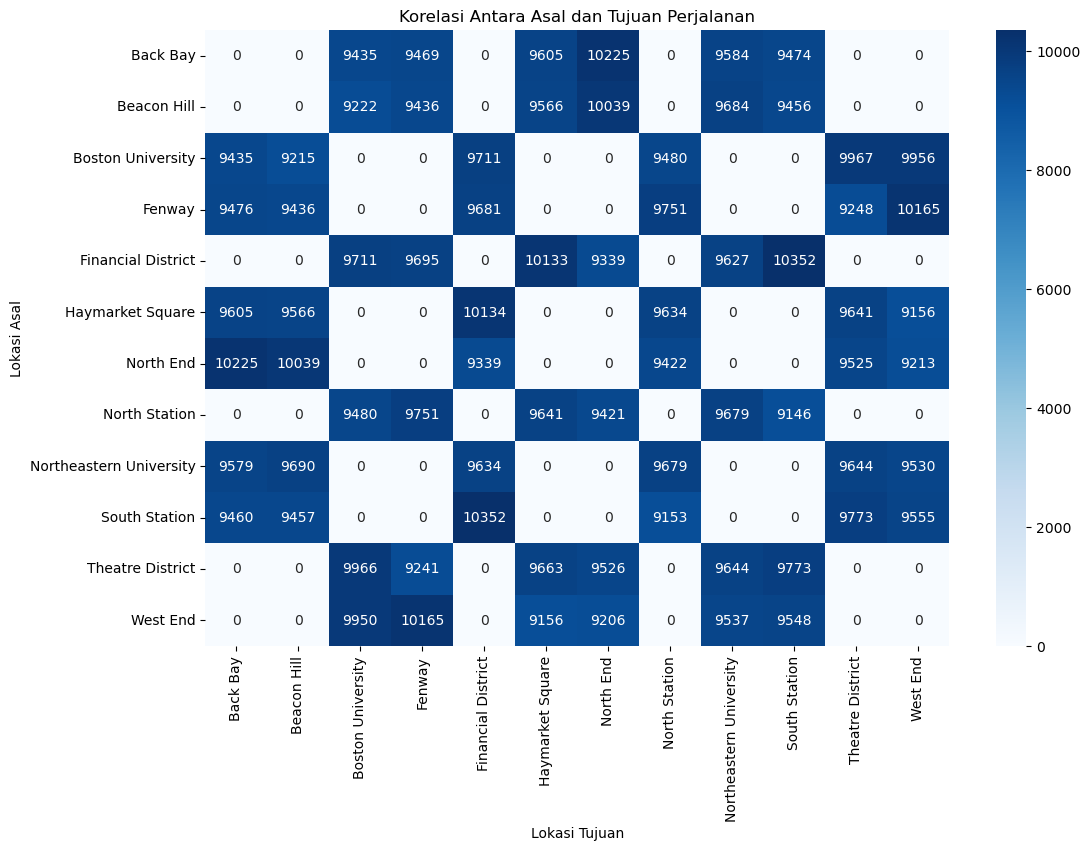

In [93]:
# membuat Heatmap antara Asal dan Tujuan perjalanan
source_dest_count = data.groupby(['source', 'destination']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(source_dest_count, cmap='Blues', annot=True, fmt='d')
plt.title('Korelasi Antara Asal dan Tujuan Perjalanan')
plt.xlabel('Lokasi Tujuan')
plt.ylabel('Lokasi Asal')
plt.show()

- Diperoleh insight berupa pola seberapa sering konsumen berangkat dari lokasi asal ke lokasi tujuan.
- Lokasi berangkat di South Station dengan tujuan Financial District terdapat 10352 kali.
- Pola lainnya seperti Fenway - West End, South Station - Financial District, Haymarket Square - Financial District, dan lainnya.

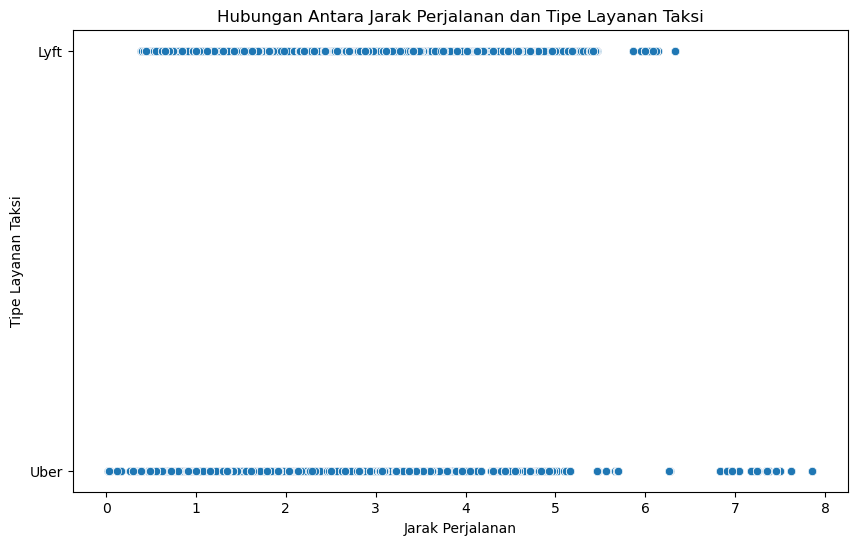

In [102]:
# membuat plot tipe layanan taksi berdasarkan jarak
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='cab_type', data=data)
plt.title('Hubungan Antara Jarak Perjalanan dan Tipe Layanan Taksi')
plt.xlabel('Jarak Perjalanan')
plt.ylabel('Tipe Layanan Taksi')
plt.show()

- Berdasarkan plot tersebut dapat diperoleh bahwa kebanyakan jenis layanan taksi yang sering digunakan yaitu Uber. Dengan jarak yang tidak terlalu jauh ataupun dekat, layanan taksi Uber lebih sering dipilih oleh konsumen.
- Pada jarak yang terhitung dekat (kurang dari nol), konsumen lebih memilih menggunakan Uber.
- Pada jarak < 1 hingga 5, aktivitas jumlah perjalanan pada kedua layanan taksi tersebut sama-sama dipilih.
- Pada jarak >7, konsumen memilih layanan taksi Uber dibandingkan Lyft.

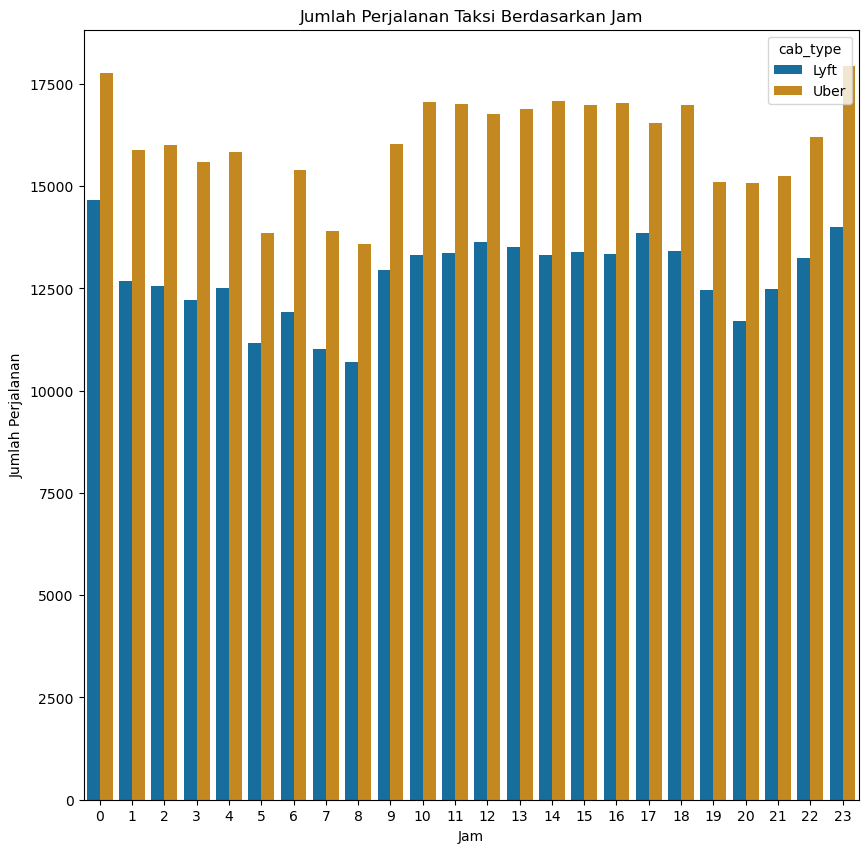

In [111]:
# membuat plot jumlah perjalanan berdasarkan jam
plt.figure(figsize=(10, 10))
sns.countplot(x='hour', data=data, hue='cab_type', palette='colorblind')
plt.title('Jumlah Perjalanan Taksi Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Perjalanan')
plt.show()

- Berdasarkan plot tersebut, pada jam-jam tertentu khususnya layanan taksi Uber pada jam 11-12 malam mengalami peningkatan aktivitas.
- Diperoleh juga terkait jam-jam sibuk yaitu pukul 9 pagi hingga 6 sore mengalami jumlah aktivitas yang konstan.

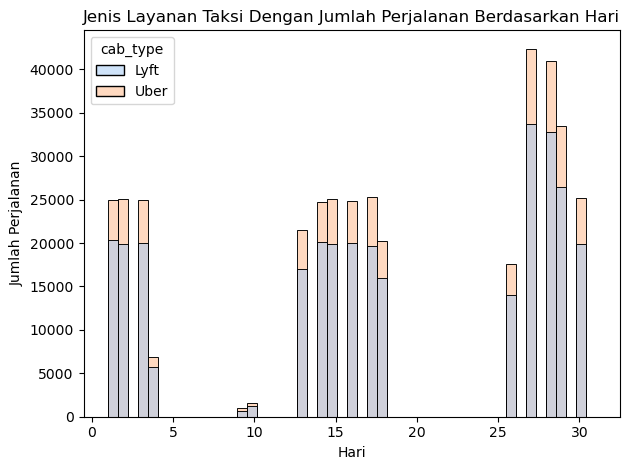

In [98]:
# membuat plot jumlah perjalanan berdasarkan hari
sns.histplot(x='day',data=data, bins = np.linspace(1,31), hue='cab_type', palette='pastel')
plt.title("Jenis Layanan Taksi Dengan Jumlah Perjalanan Berdasarkan Hari")
plt.xlabel("Hari")
plt.ylabel("Jumlah Perjalanan")
plt.tight_layout()
plt.show()

- Berdasarkan hari, ditemukan pola bahwa pada penghujung hari di bulan tersebut menunjukkan kenaikan aktivitas baik pada "Uber" maupun "Lyft".
- Ditemukannya juga pola penurunan, di tanggal awal (1-3) terlihat konstan kemudian penurunan terjadi pada tanggal 4 hingga 13. Pada tanggal 18-25 pun mengalami penurunan aktivitas.
- Penurunan aktivitas ini banyak faktornya, bisa disebabkan karna diskon, cuaca, dan lainnya. 

month
12    406614
11    286457
Name: count, dtype: int64

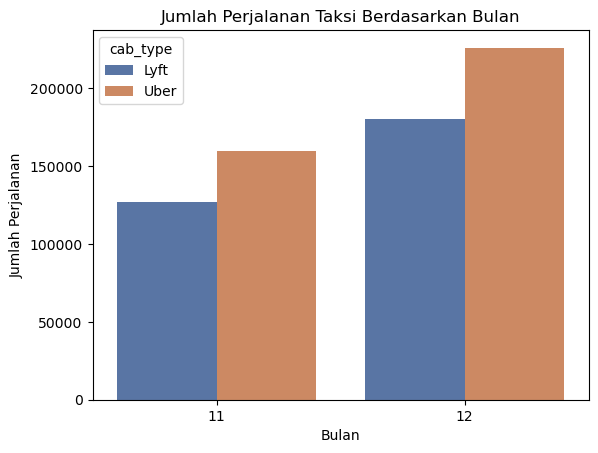

In [115]:
# membuat plot jumlah perjalanan berdasarkan bulan
sns.countplot(x='month', data=data, hue= 'cab_type', palette='deep')
plt.title('Jumlah Perjalanan Taksi Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Perjalanan')
# menghitung jumlah value dari kolom 'month'
data['month'].value_counts()

- Pada bulan November dan Desember terlihat adanya kenaikan aktivitas pada kedua layanan taksi tersebut.

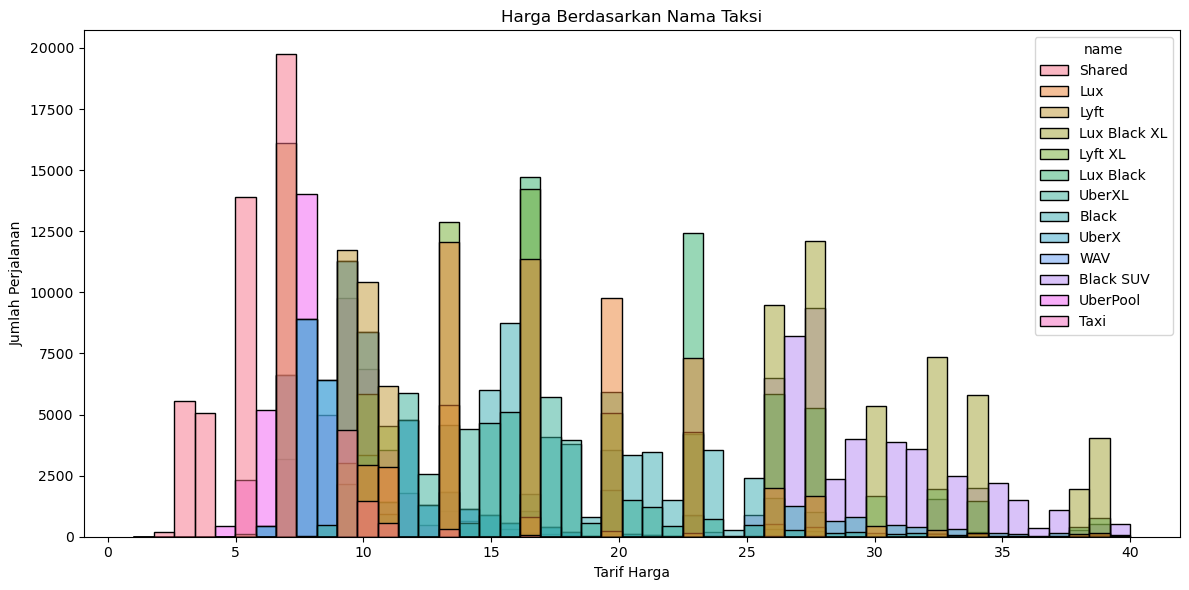

In [89]:
# membuat plot berdasarkan harga dari setiap nama taksi
plt.figure(figsize=(12, 6))  # Menentukan lebar 12 dan tinggi 6
sns.histplot(x='price', data=data, bins=np.linspace(1, 40), hue='name') # berdasarkan nama taksi
plt.title("Harga Berdasarkan Nama Taksi")
plt.ylabel("Jumlah Perjalanan")
plt.xlabel("Tarif Harga")
plt.tight_layout()
plt.show()


- Nama taksi "Shared" lebih sering dipilih oleh konsumen dimana rentang harganya pun sekitar <10$.
- Nama taksi "Lyft XL" pun sering dipilih kedua dimana rentang harganya sekitar 18$.
- Harga yang paling tinggi dimiliki oleh "Black SUV" dan harga yang paling rendah dimiliki oleh "Shared"

# Split Train-Test Set

**Bagian ini berisi proses penyiapan data untuk proses pelatihan model**

In [118]:
# copy dataset
df = data.copy()

df.head(5)

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...             0.1276  1544979600           39.89   
1     Lyft  ...             0.1300  1543251600           40.49   
2     Lyft  ...             0.1064  1543338000           35.36   
3     Lyft  ...             0.0000  1543507200           34.67   
4     Lyft  ...             0.0001  1543420800           33.10   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1545012000           43.68          1544968800   
1          1543233600           47.30          1543251600   
2          1543377600           47.55          1543320000   
3          1543550400           45.03          1543510800   
4          1543402800           42.18          1543420800   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   33.73                  1545012000                   38.07   
1                   36.20                  1543291200                   43.92   
2                   31.04                  1543377600                   44.12   
3                   30.30                  1543550400                   38.53   
4                   29.11                  1543392000                   35.75   

  apparentTemperatureMaxTime  
0                 1544958000  
1                 1543251600  
2                 1543320000  
3                 1543510800  
4                 1543420800  

[5 rows x 57 columns]

- Tujuan men-split yaitu untuk menentukan input dan outputnya. Dimana pada case ini untuk menentukan harga perjalanan sehingga y sebagai target/label dan x sebagai feature.
- Digunakannya test_size 20% untuk dialokasikan sebagai data pengujian.

In [119]:
# split antara label dan feature
X = df.drop(columns=['price'], axis=1) #feature
y = df['price'] #label

# Split into Train & Test Set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # ukuran pengujian test yang digunakan
                                                    random_state=42) # memastikan reproduktibilitas hasil

# Missing Value Handling

- Mengetahui missing value pada data y_train dan y_test

In [120]:
# Check missing value y_train
print("Jumlah missing value pada y_train: ", y_train.isnull().sum())

# Menghitung persentase nilai yang hilang dalam setiap kolom
total_entries = len(df)
missing_percentage = (y_train.isnull().sum() / total_entries) * 100
print("Persentase missing value y_train: ", missing_percentage)

# Check missing value y_test
print("Jumlah missing value pada y_test: ", y_test.isnull().sum())

# Menghitung persentase nilai yang hilang dalam setiap kolom
total_entries = len(df)
missing_percentage = (y_test.isnull().sum() / total_entries) * 100
print("Persentase missing value y_test: ", missing_percentage)

Jumlah missing value pada y_train:  44165
Persentase missing value y_train:  6.372363004656088
Jumlah missing value pada y_test:  10930
Persentase missing value y_test:  1.57703900466186


- Kode ini bertujuan untuk menyamakan baris antara y_train dengan X_train. Begitu juga y_test dan X_test.
- Ketika menghapus missing value di data y_train maka pada X_train pun harus dihapus agar jumlah baris tetap sama. Hal tersebut dilakukan juga pada y_test dan X_test.

In [121]:
# Menghapus missing value dari y_train
y_train.dropna(inplace=True)

# Menghapus missing value sesuai dengan indeks y_train_filtered
X_train = X_train.loc[y_train.index]

# Menghapus missing value dari y_test
y_test.dropna(inplace=True)

# Menghapus missing value sesuai dengan indeks y_test_filtered
X_test = X_test.loc[y_test.index]

# Outlier Handling

In [122]:
# Membuat variabel kolom numerik
num_cols = X_train.columns[X_train.dtypes != object]

- Membuat plot sebelum membuang outlier

In [123]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

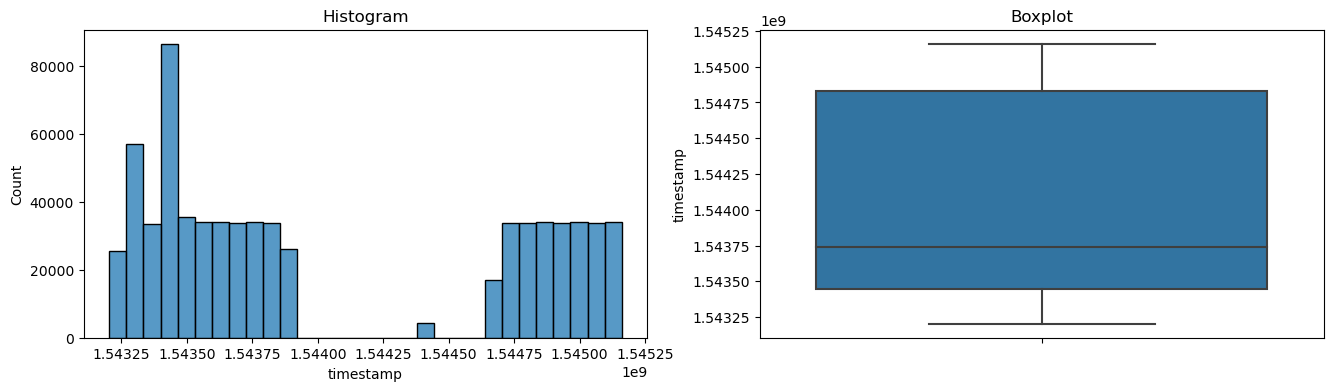

<Figure size 1600x400 with 0 Axes>

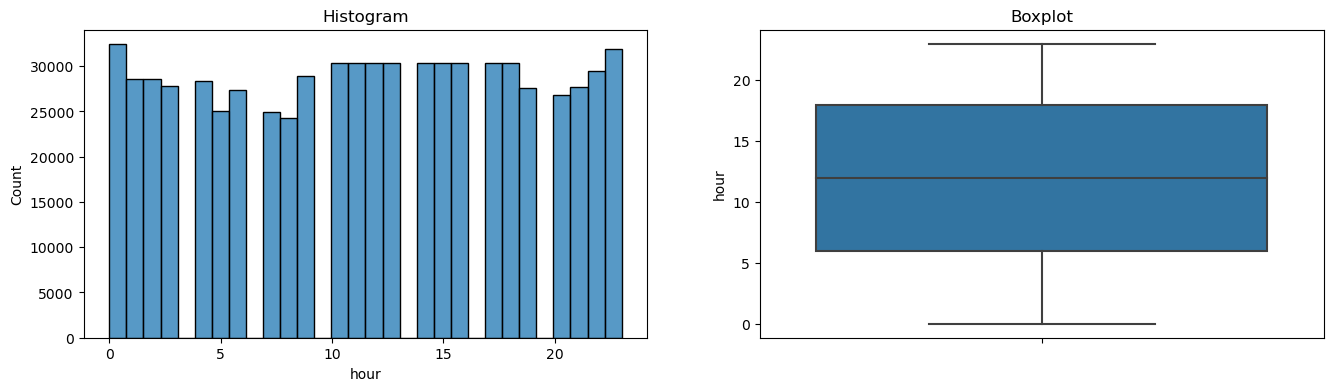

<Figure size 1600x400 with 0 Axes>

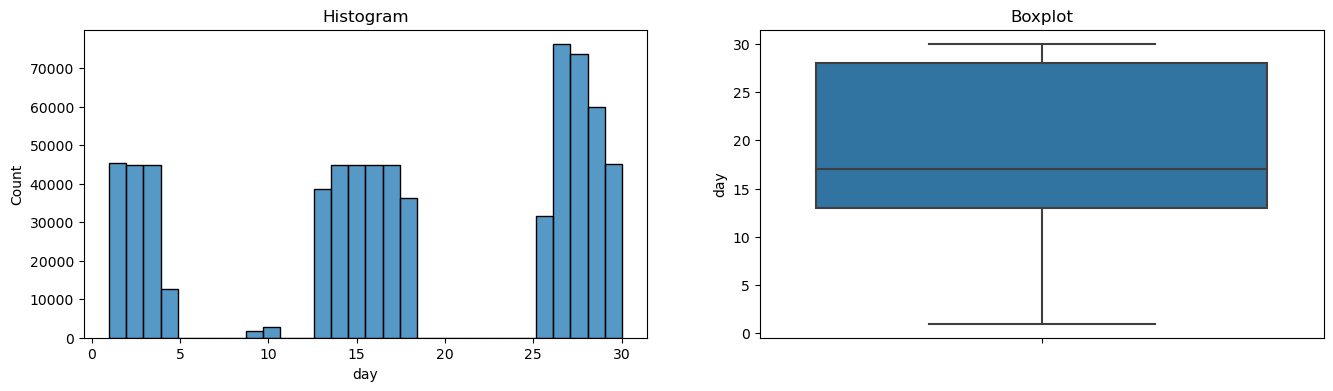

<Figure size 1600x400 with 0 Axes>

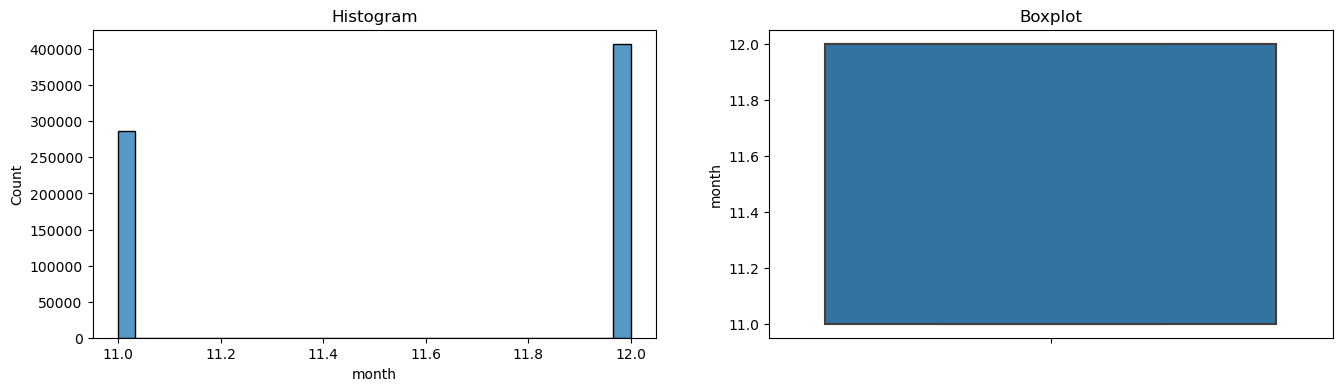

<Figure size 1600x400 with 0 Axes>

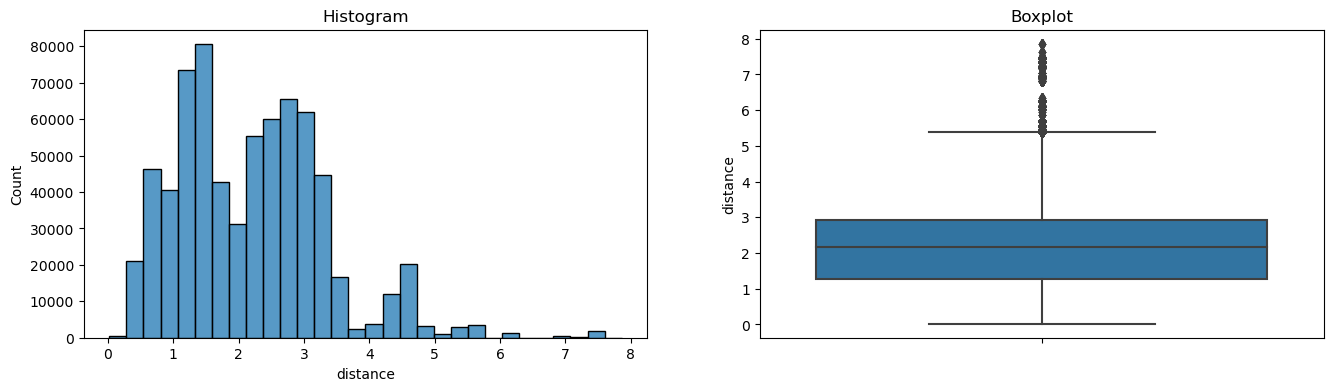

<Figure size 1600x400 with 0 Axes>

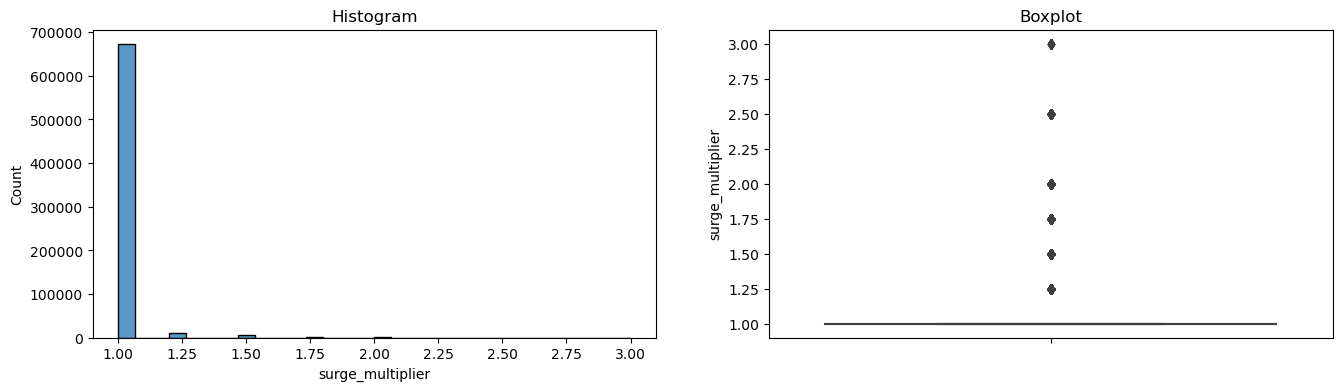

<Figure size 1600x400 with 0 Axes>

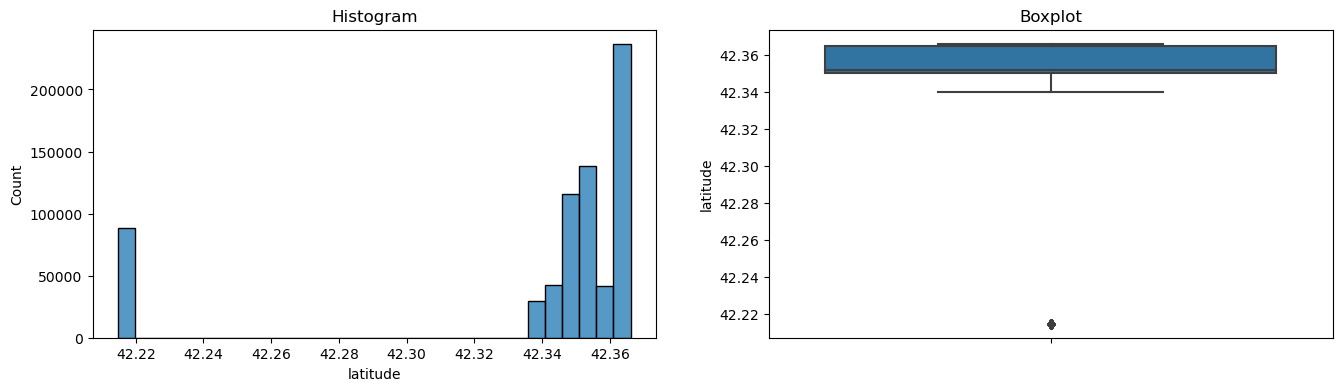

<Figure size 1600x400 with 0 Axes>

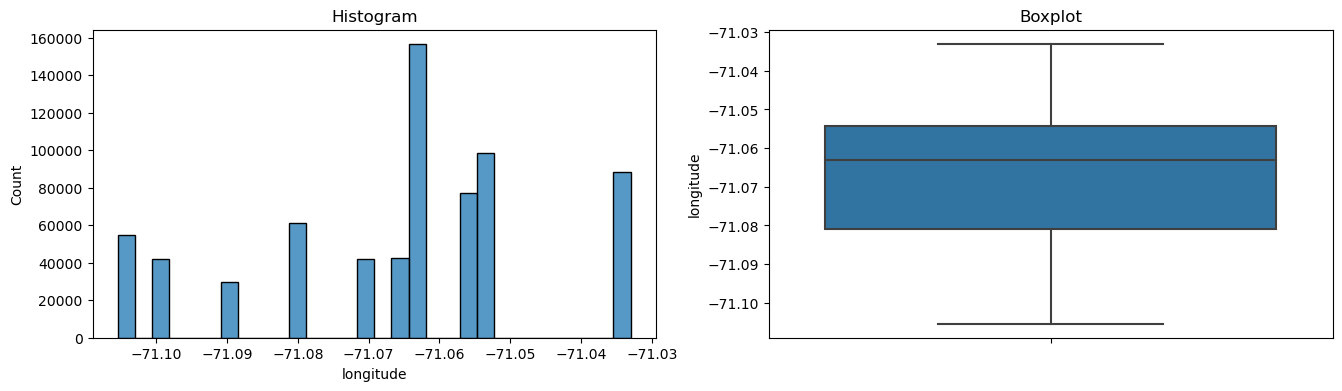

<Figure size 1600x400 with 0 Axes>

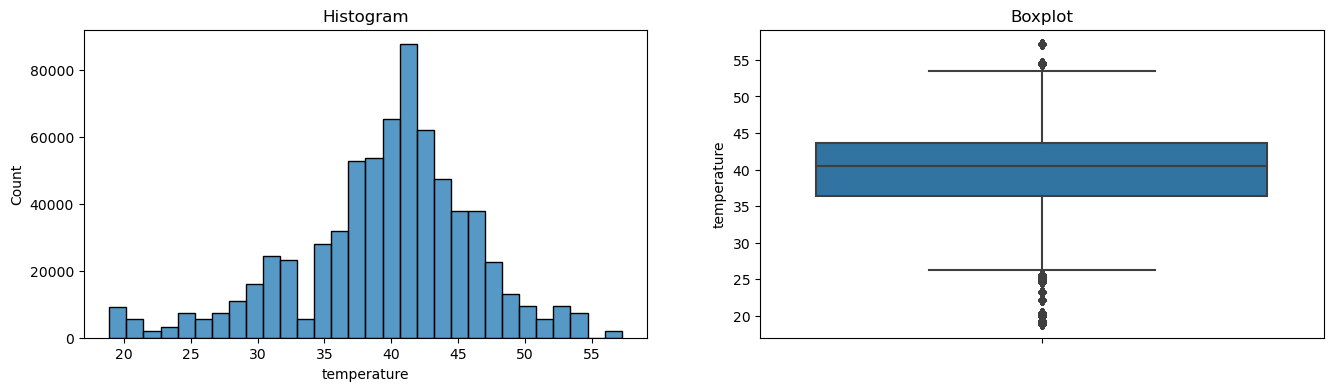

<Figure size 1600x400 with 0 Axes>

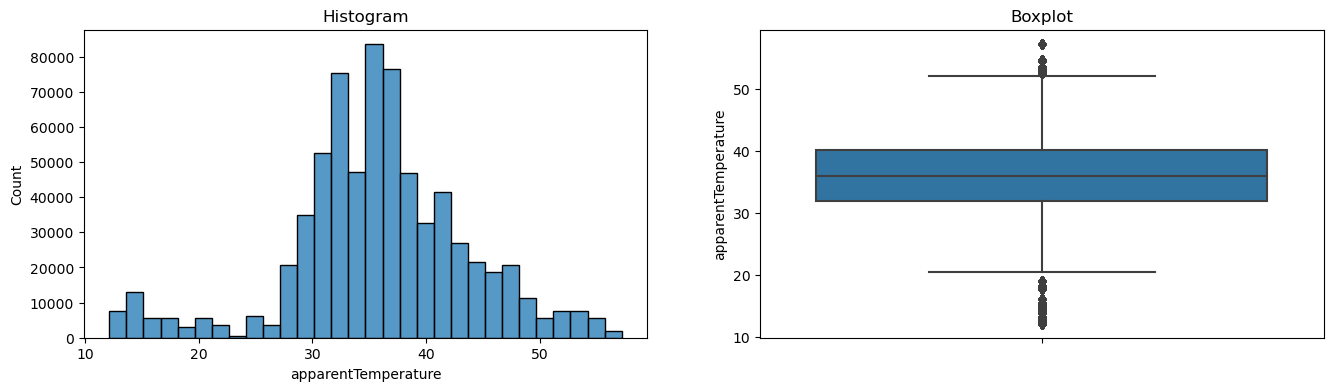

<Figure size 1600x400 with 0 Axes>

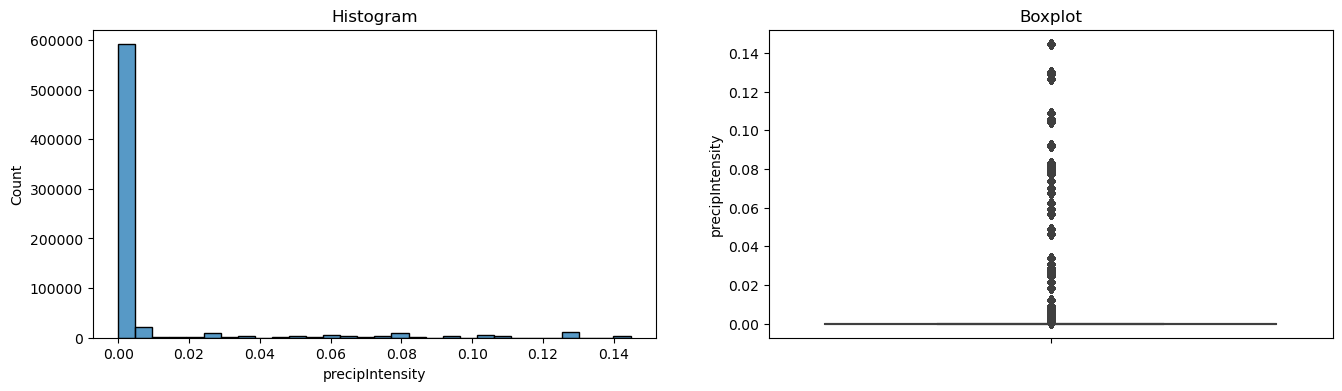

<Figure size 1600x400 with 0 Axes>

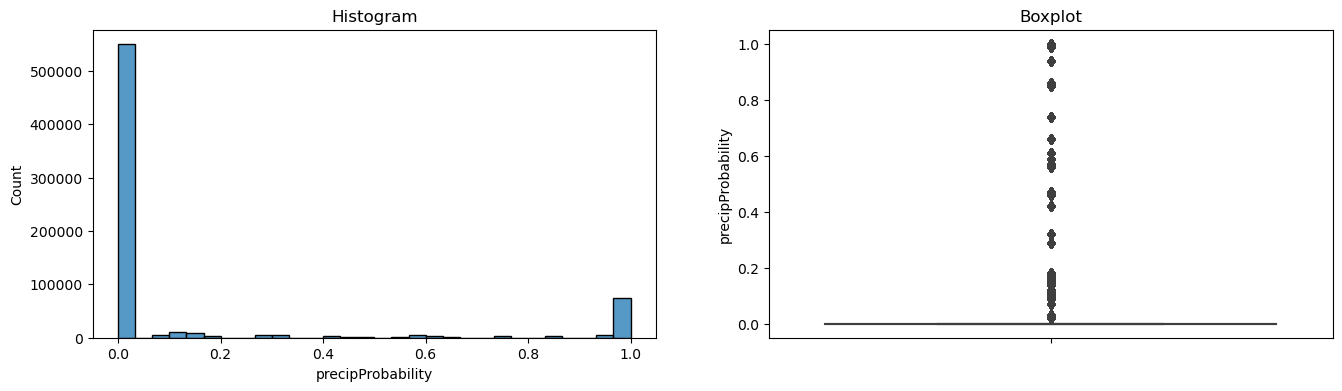

<Figure size 1600x400 with 0 Axes>

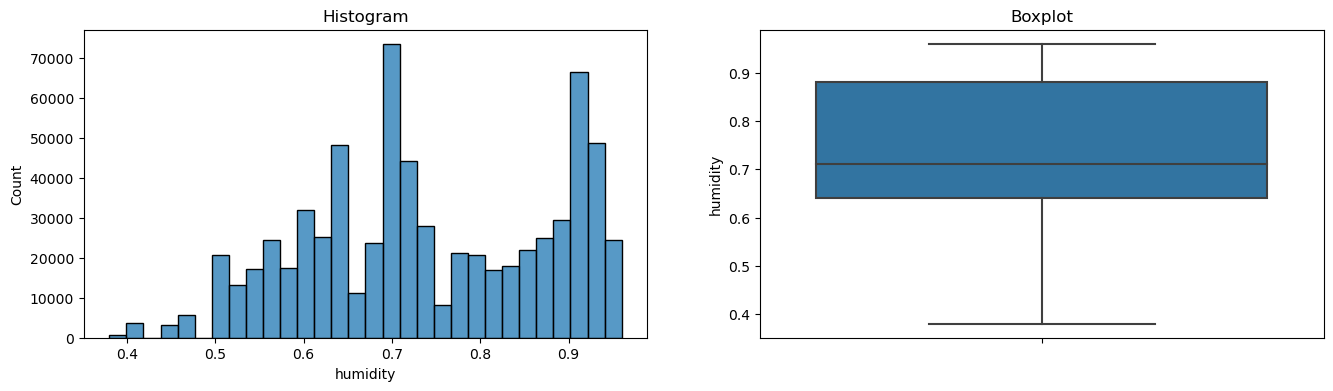

<Figure size 1600x400 with 0 Axes>

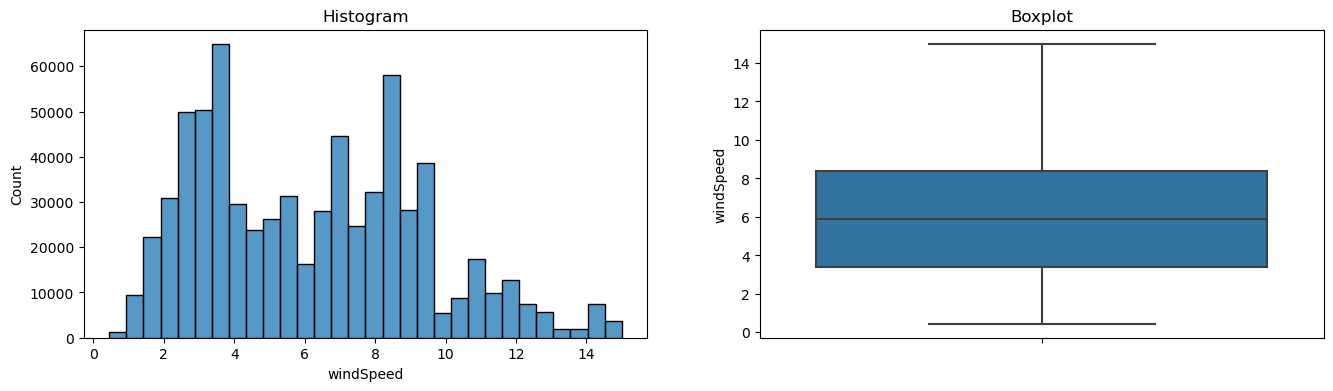

<Figure size 1600x400 with 0 Axes>

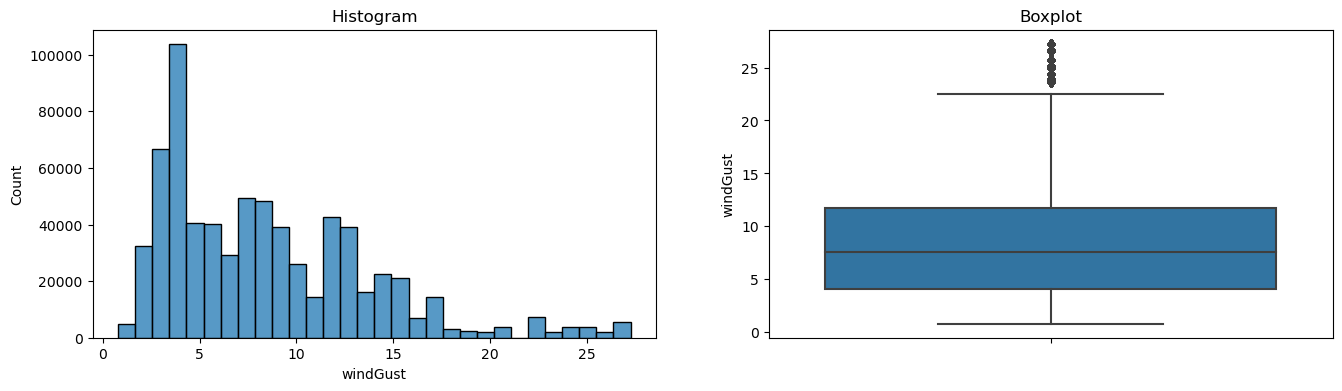

<Figure size 1600x400 with 0 Axes>

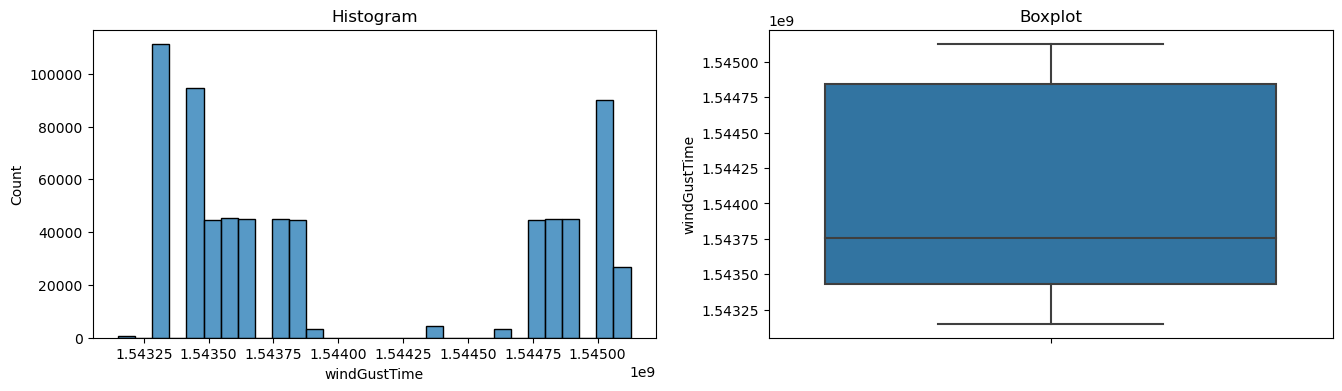

<Figure size 1600x400 with 0 Axes>

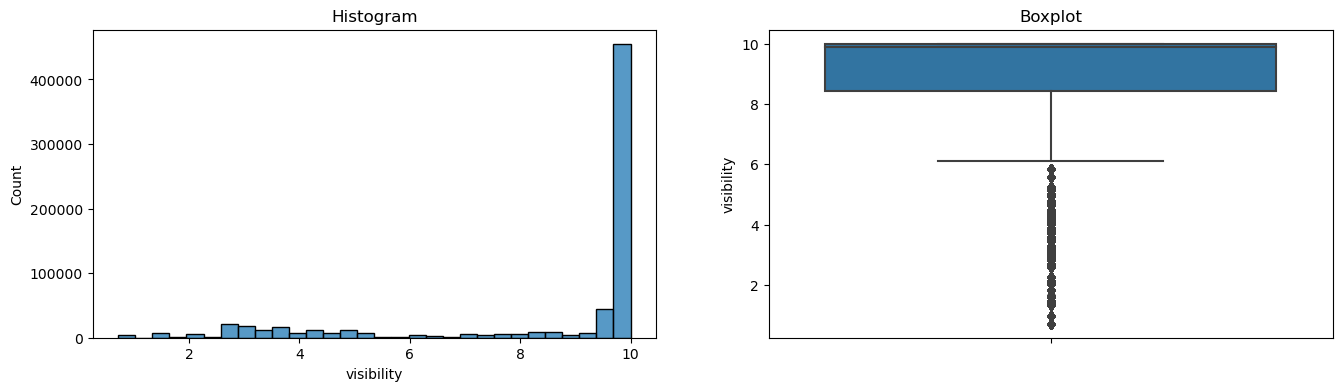

<Figure size 1600x400 with 0 Axes>

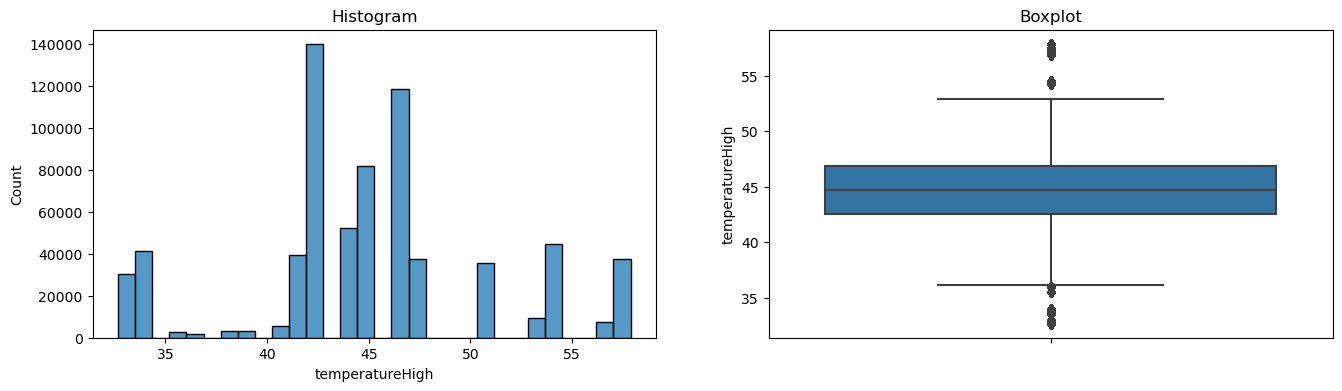

<Figure size 1600x400 with 0 Axes>

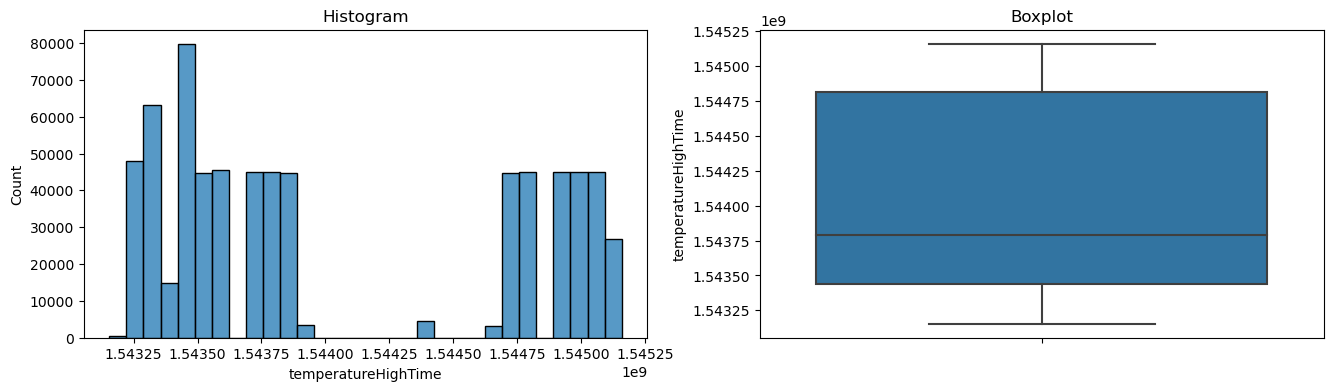

<Figure size 1600x400 with 0 Axes>

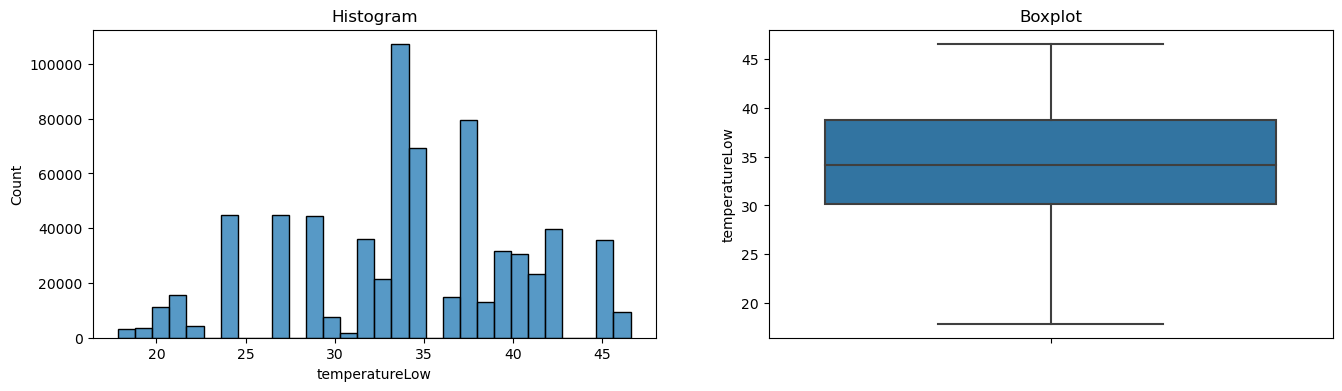

<Figure size 1600x400 with 0 Axes>

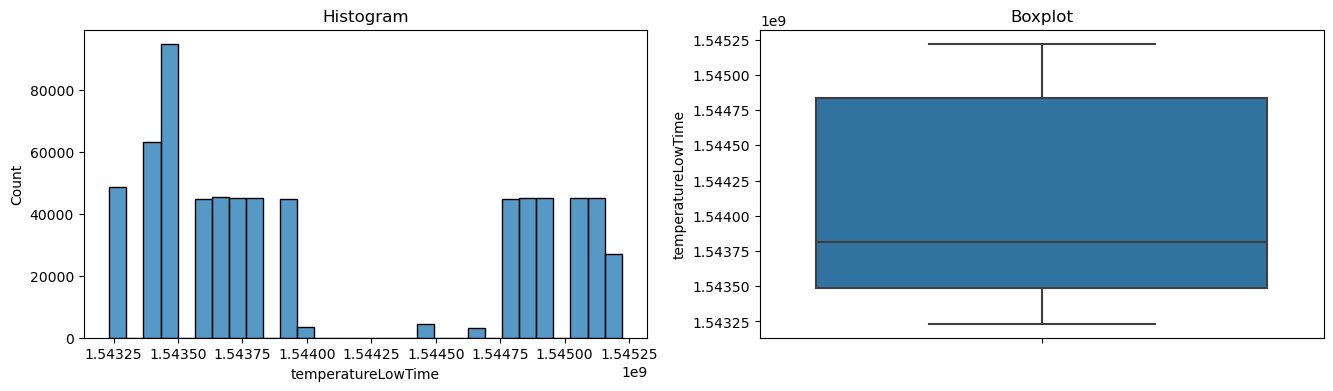

<Figure size 1600x400 with 0 Axes>

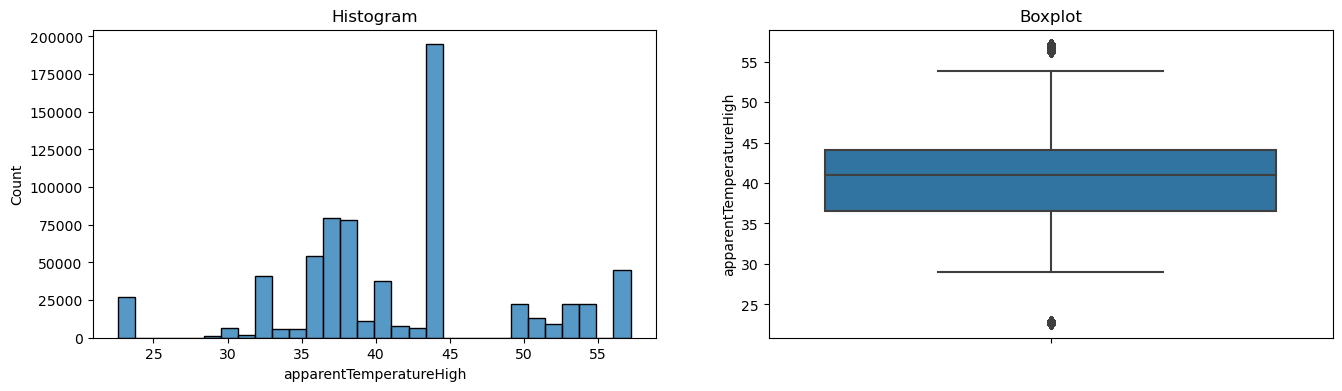

<Figure size 1600x400 with 0 Axes>

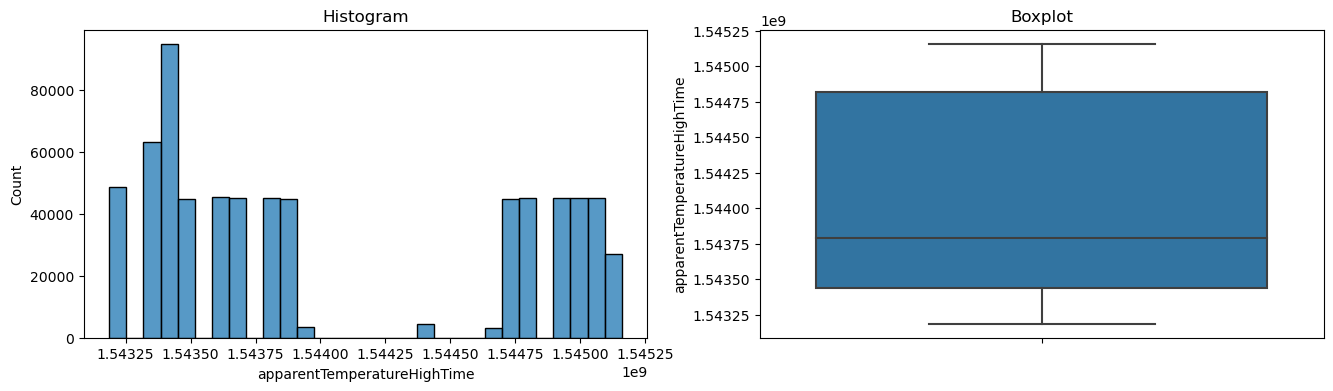

<Figure size 1600x400 with 0 Axes>

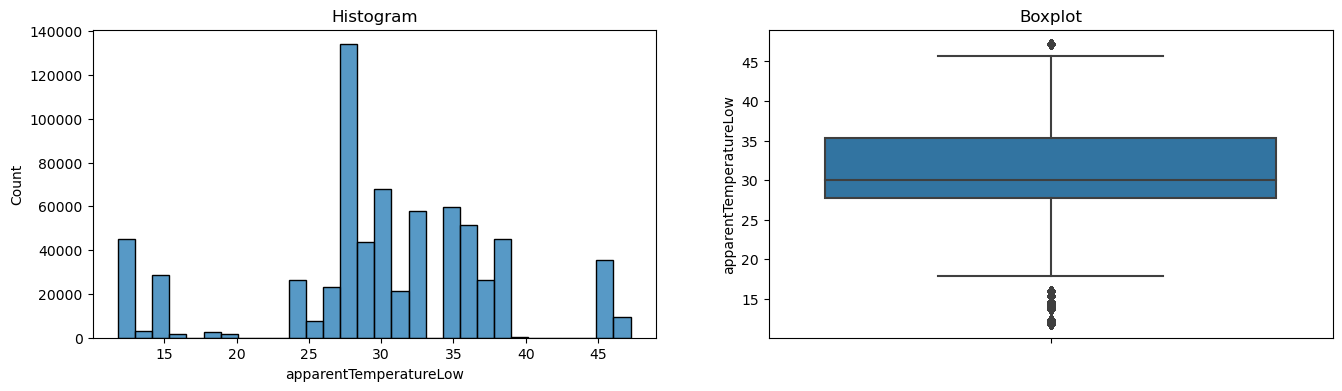

<Figure size 1600x400 with 0 Axes>

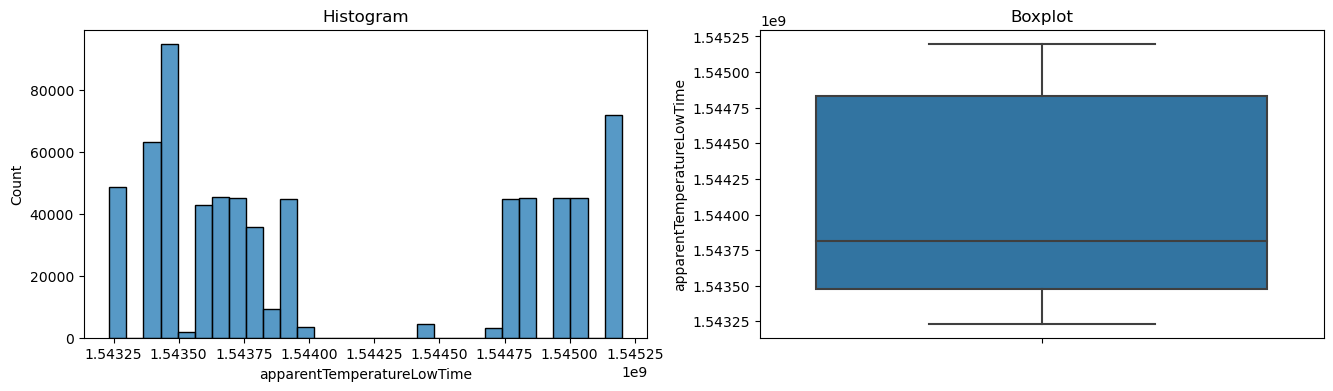

<Figure size 1600x400 with 0 Axes>

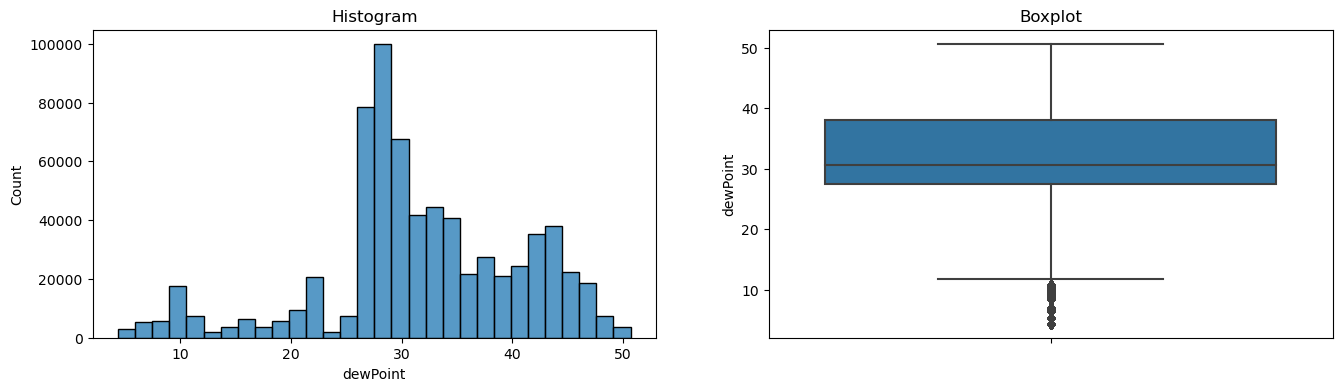

<Figure size 1600x400 with 0 Axes>

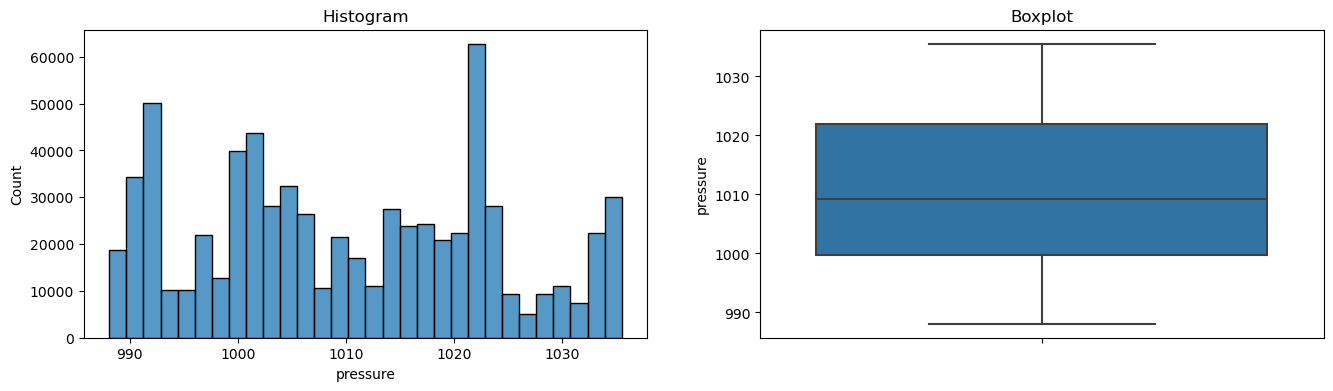

<Figure size 1600x400 with 0 Axes>

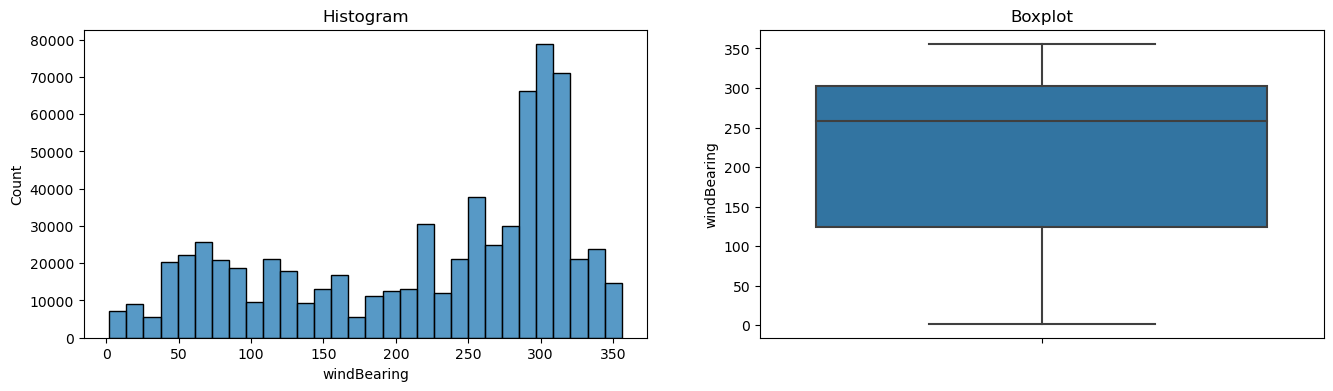

<Figure size 1600x400 with 0 Axes>

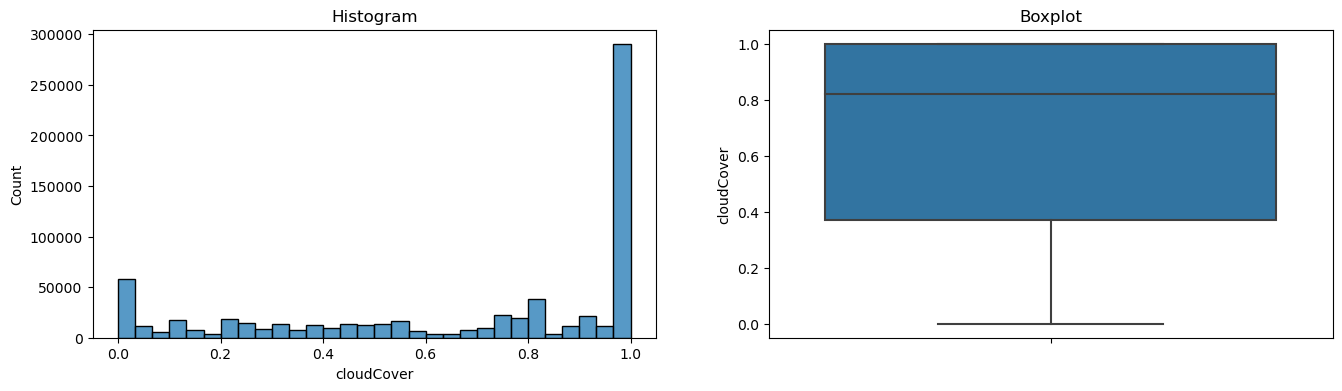

<Figure size 1600x400 with 0 Axes>

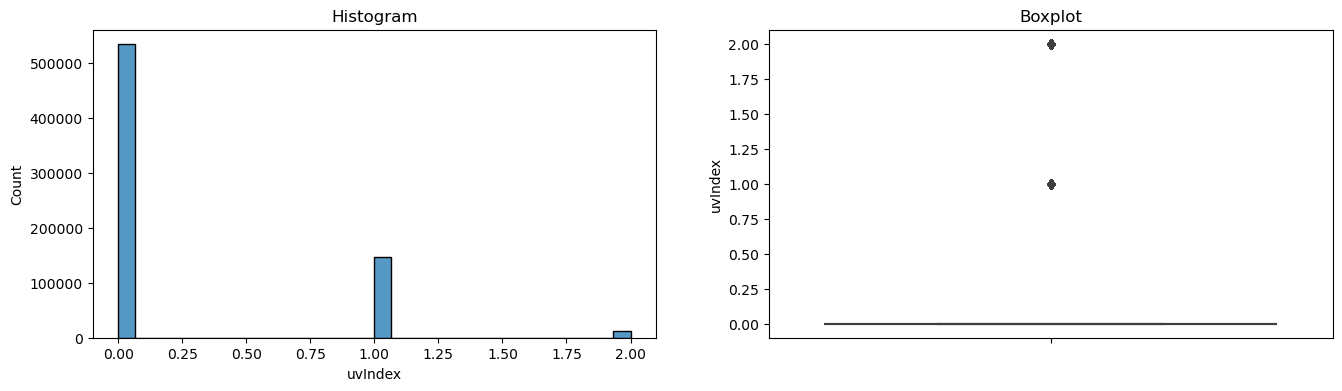

<Figure size 1600x400 with 0 Axes>

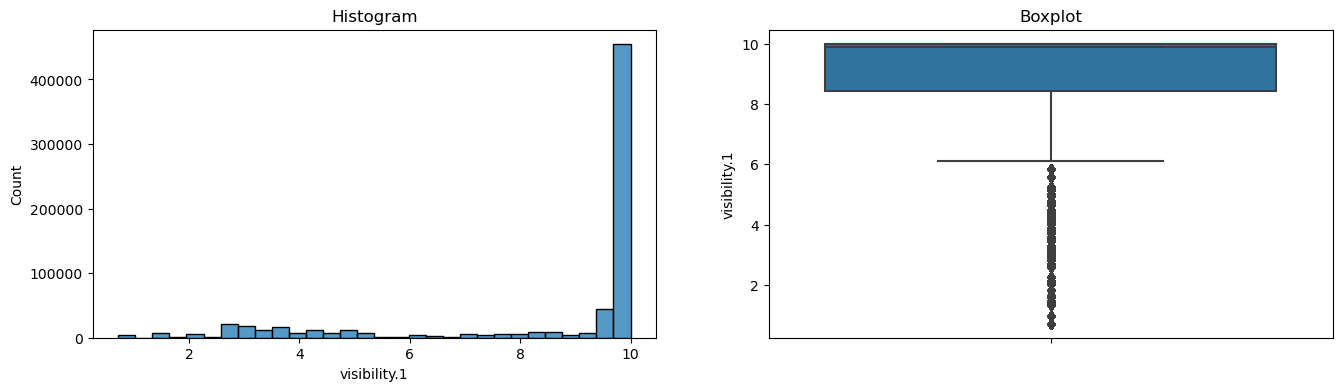

<Figure size 1600x400 with 0 Axes>

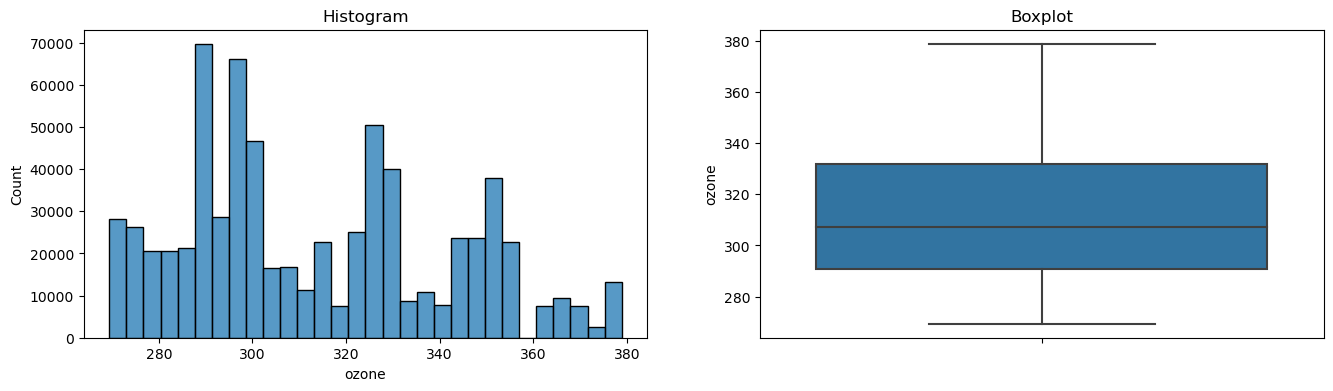

<Figure size 1600x400 with 0 Axes>

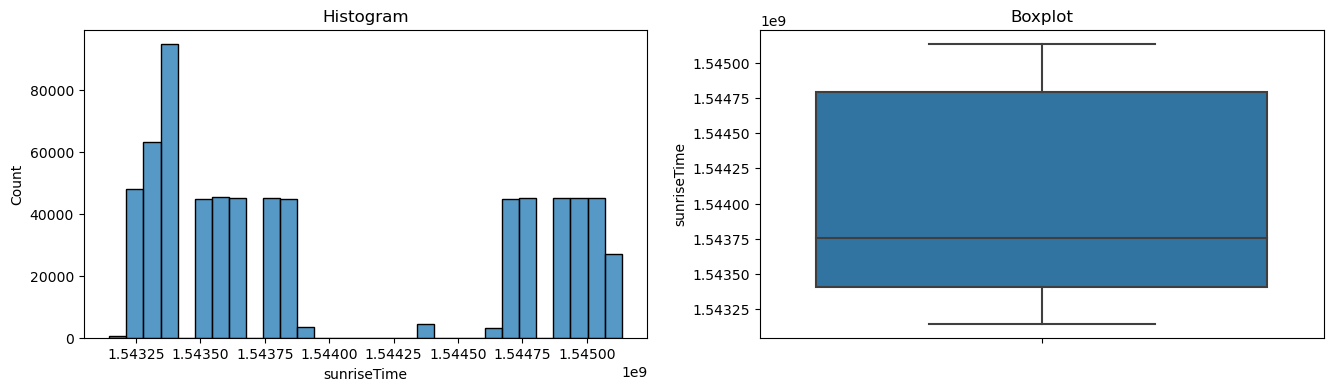

<Figure size 1600x400 with 0 Axes>

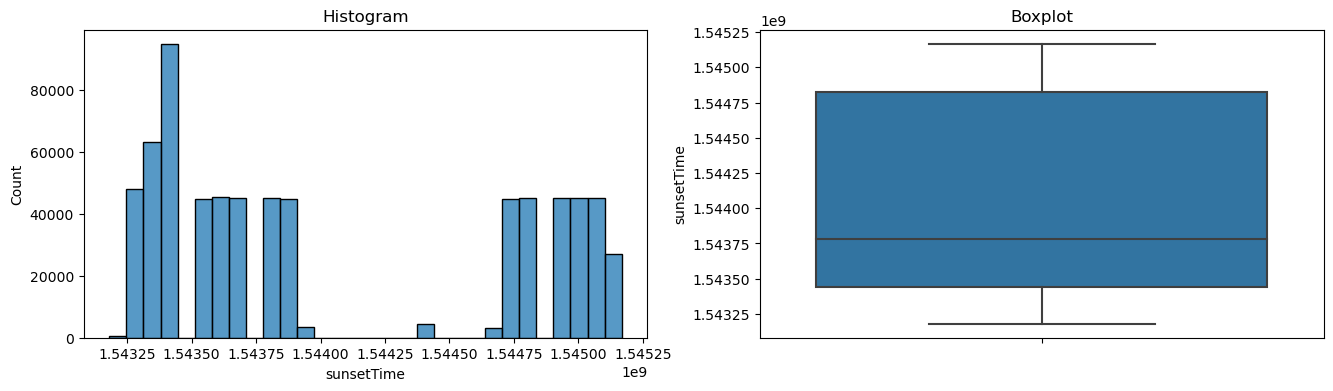

<Figure size 1600x400 with 0 Axes>

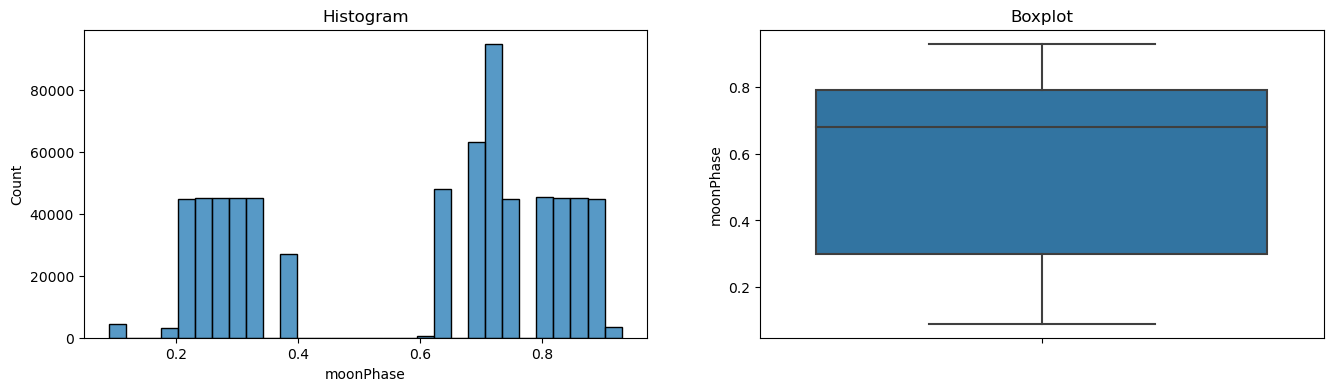

<Figure size 1600x400 with 0 Axes>

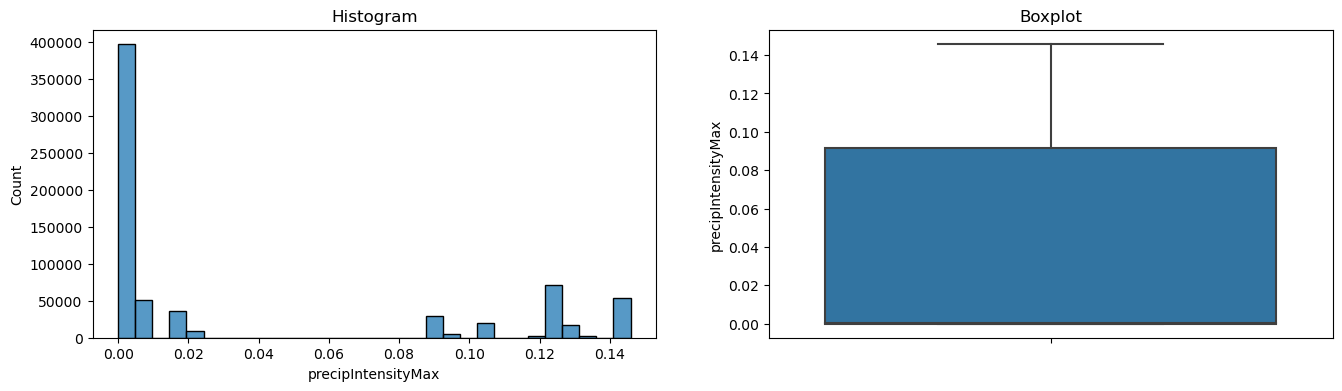

<Figure size 1600x400 with 0 Axes>

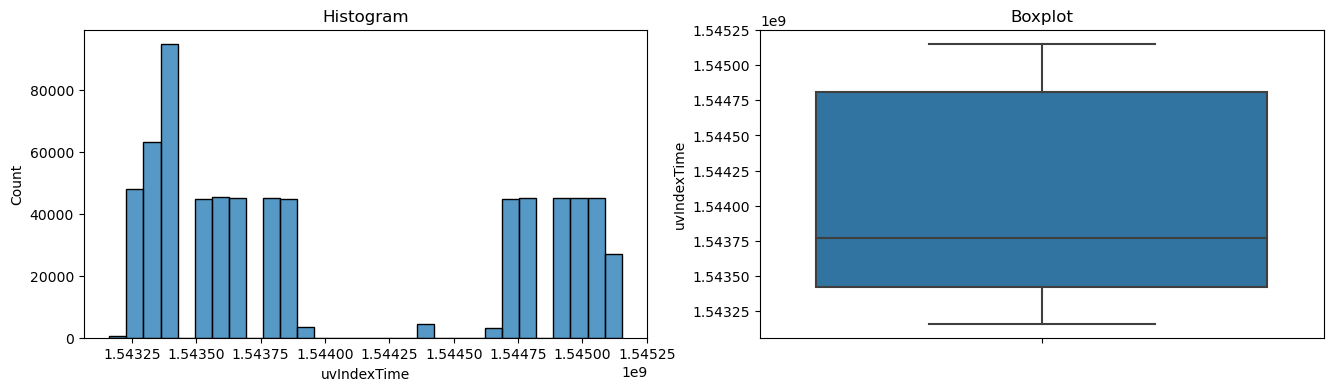

<Figure size 1600x400 with 0 Axes>

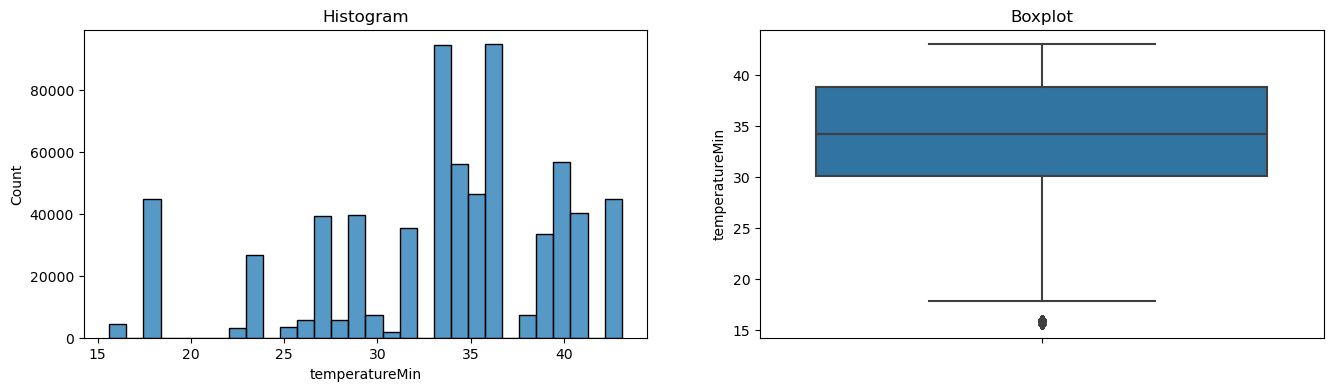

<Figure size 1600x400 with 0 Axes>

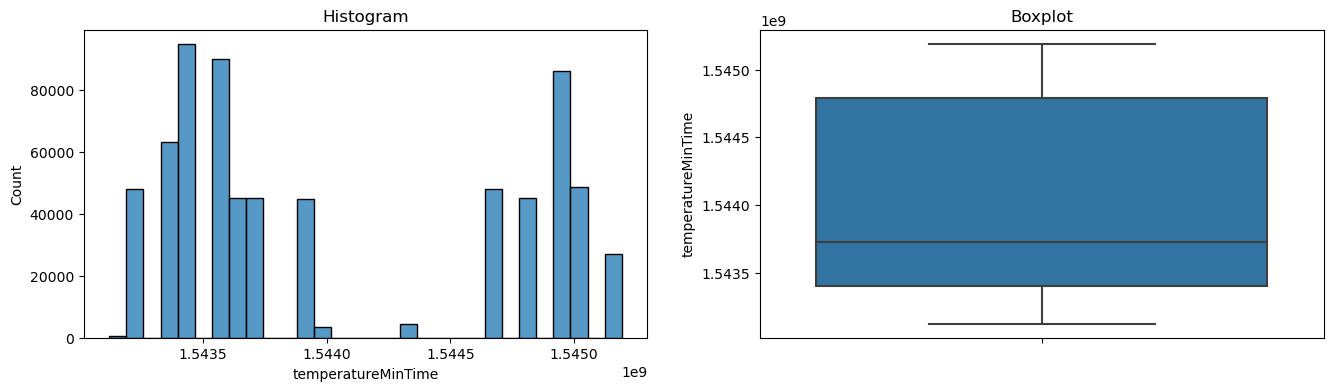

<Figure size 1600x400 with 0 Axes>

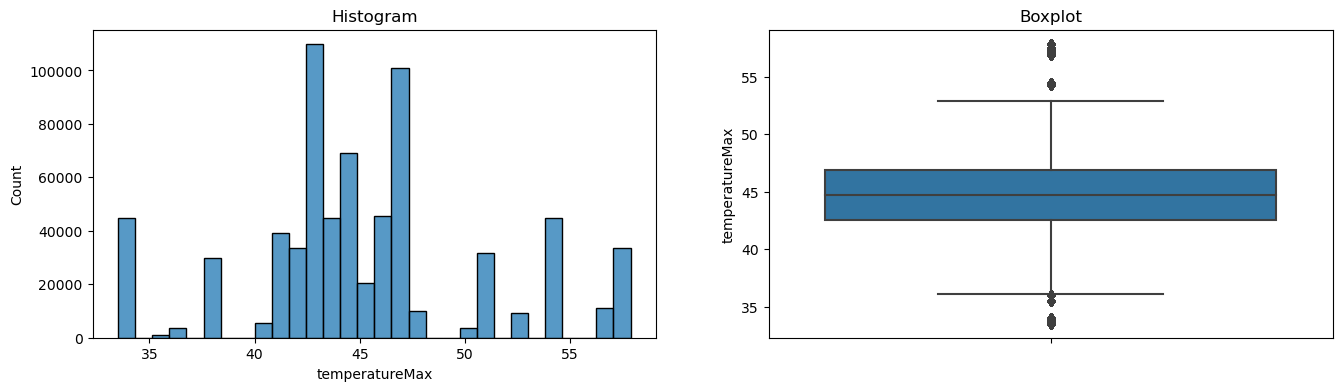

<Figure size 1600x400 with 0 Axes>

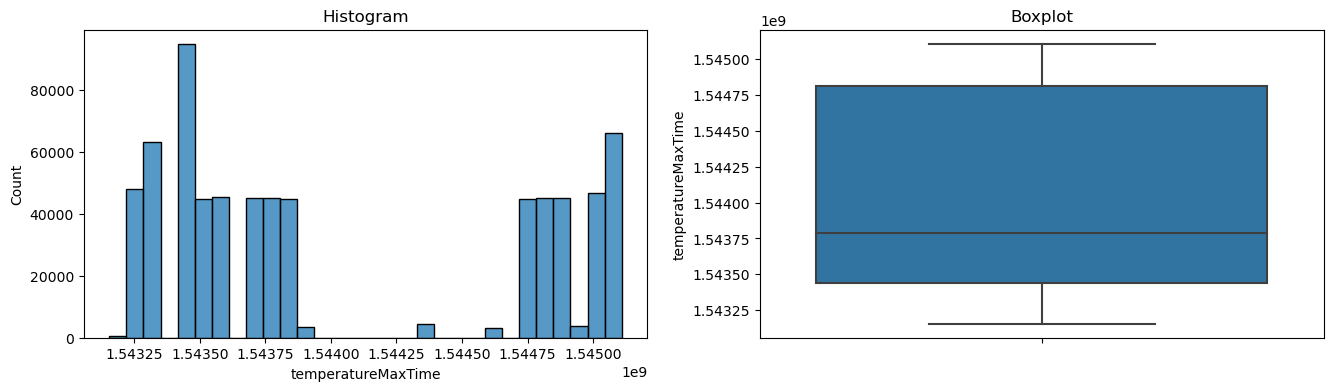

<Figure size 1600x400 with 0 Axes>

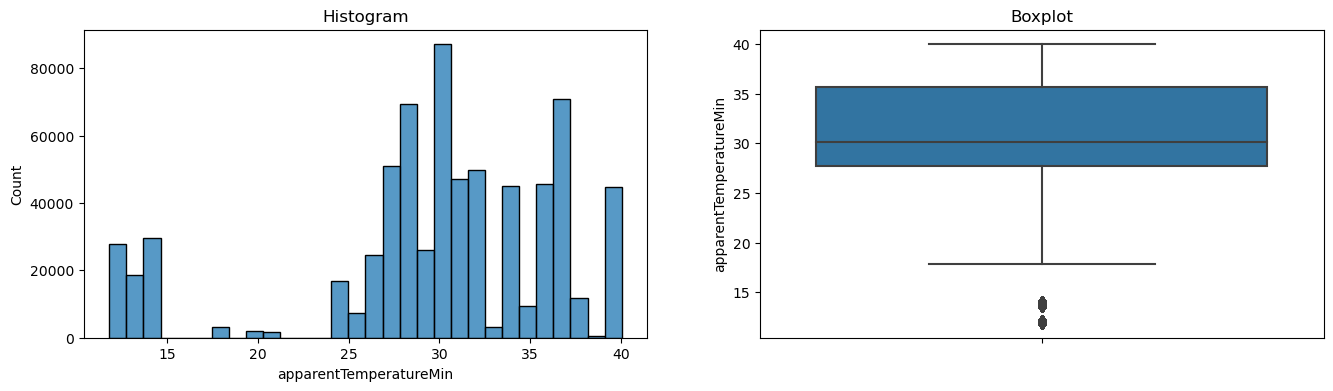

<Figure size 1600x400 with 0 Axes>

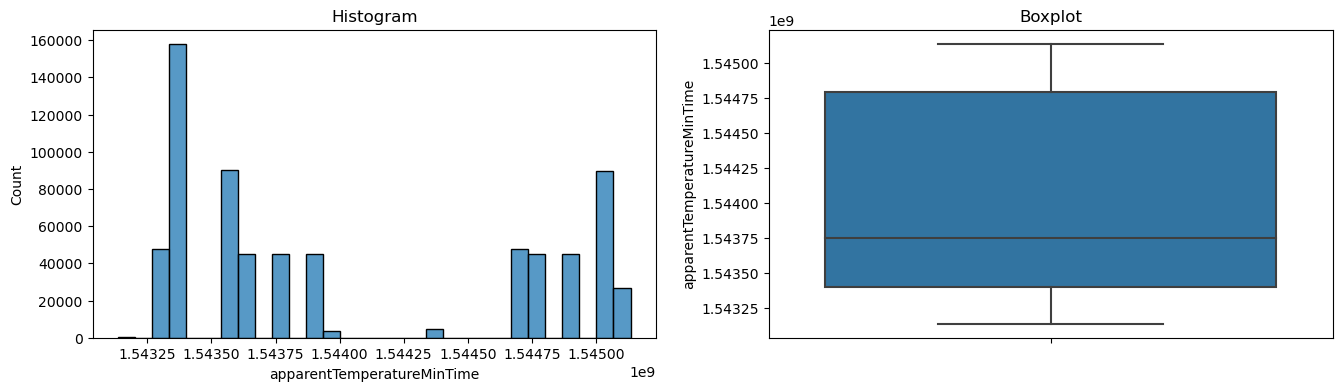

<Figure size 1600x400 with 0 Axes>

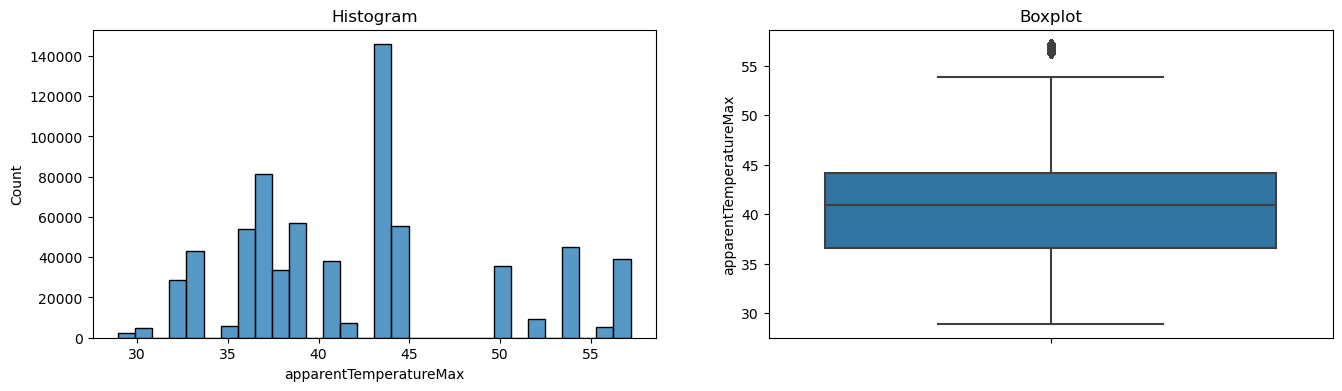

<Figure size 1600x400 with 0 Axes>

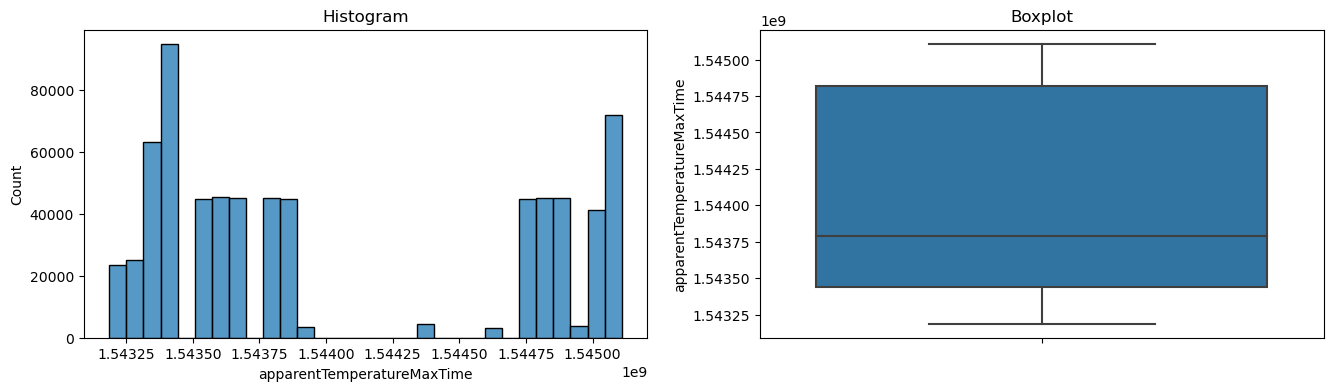

<Figure size 1600x400 with 0 Axes>

In [124]:
for kolom in num_cols:
    # Panggil fungsi diagnostic_plots untuk membuat boxplot dan histogram untuk kolom saat ini
    diagnostic_plots(df, kolom)
    # Define figure size
    plt.figure(figsize=(16,4))

- Untuk menghilangkan outlier, dihitung skewness pada tiap kolom, kemudian hasil dari skewness digolongkan apakah termasuk distribusi normal atau tidak.
- Hasilnya diperoleh list kolom yang memiliki distribusi normal dan distribusi miring(skewed).

In [125]:
# Inisialisasi list untuk menyimpan kolom dengan distribusi normal dan skewed
distribution_normal = []
distribution_skewed = []

# Iterasi melalui kolom-kolom numerikal
for kolom in num_cols:
    # Hitung skewness dari kolom saat ini
    skewness = X_train[kolom].skew()
    
    # Tambahkan kolom ke list yang sesuai dengan distribusi skewnessnya
    if -0.5 <= skewness <= 0.5:
        distribution_normal.append(kolom)
    else:
        distribution_skewed.append(kolom)

# Print kolom dengan distribusi normal dan skewed
print("Kolom dengan distribusi normal:")
print(distribution_normal)
print("\nKolom dengan distribusi skewed:")
print(distribution_skewed)

Kolom dengan distribusi normal:
['timestamp', 'hour', 'day', 'month', 'longitude', 'apparentTemperature', 'humidity', 'windSpeed', 'windGustTime', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'uvIndexTime', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime']

Kolom dengan distribusi skewed:
['distance', 'surge_multiplier', 'latitude', 'temperature', 'precipIntensity', 'precipProbability', 'windGust', 'visibility', 'apparentTemperatureLow', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'precipIntensityMax', 'temperatureMin', 'apparentTemperatureMin', 'apparentTemperatureMax']


| Distribusi Normal | Distribusi Miring | 
| --- | --- | 
| timestamp | distance |
| hour | surge_multiplier |
| day | latitude |
| month | temperaturer |
| longitude | precipIntensity |
| apparentTemperature | precipProbability |
| humidity | windGust |
| windSpeed | visibility |
| windGustTime | apparentTemperatureLow |
| temperatureHigh | windBearing |
| temperatureHighTime | cloudCover |
| temperatureLow | uvIndex |
| temperatureLowTime | visibility.1 |
| apparentTemperatureHigh | precipIntensityMax |
| apparentTemperatureHighTime | temperatureMin |
| apparentTemperatureLowTime | apparentTemperatureMin |
| pressure | apparentTemperatureMax |
| ozone |  |
| sunriseTime |  |
| sunsetTime |  |
| moonPhase |  |
| uvIndexTim |  |
| temperatureMinTime |  |
| temperatureMax |  |
| temperatureMaxTime |  |
| apparentTemperatureMinTime |  |
| apparentTemperatureMaxTime |  |


- Dipilihnya metode capping karena nilai-nilai outlier dipotong sehingga tidak melebihi batas tersebut. Dengan kata lain, tidak menghilangkan data pada dataset tetapi hanya memotong yang melebihi batas.
- 4 kolom yang terdiri dari ; 
1. 'surge_multiplier', 
2. 'precipIntensity', 
3. 'precipProbability', 
4. 'uvIndex' 
memiliki skewed distribution yang tidak bisa dihitung menggunakan metode IQR karena kolom-kolom tersebut memiliki variansi yang rendah. Oleh karena itu, dilakukan capping menggunakan metode Gaussian/normal.

Visualisasi Distribusi Sebelum dan Sesudah Capping - Kolom dengan distribusi skewed:

distance - Before Capping


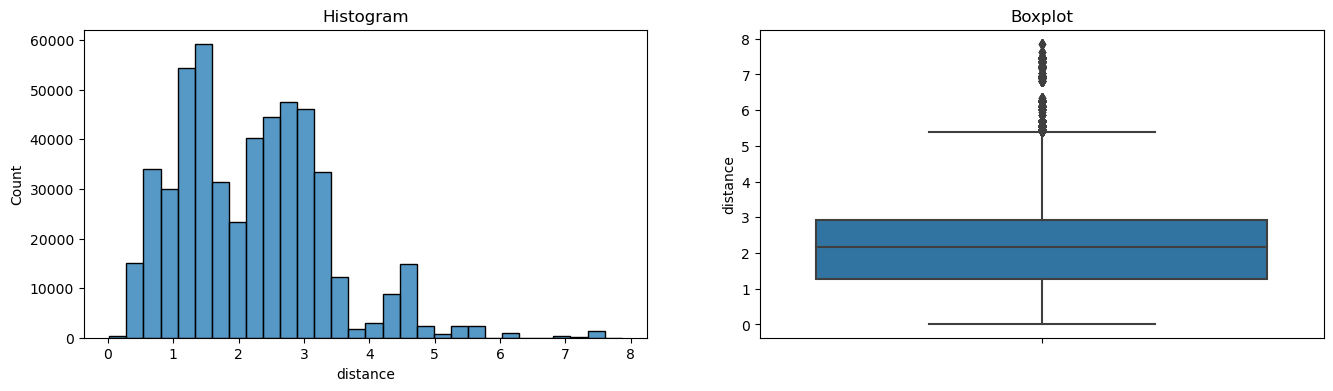


distance - After Capping


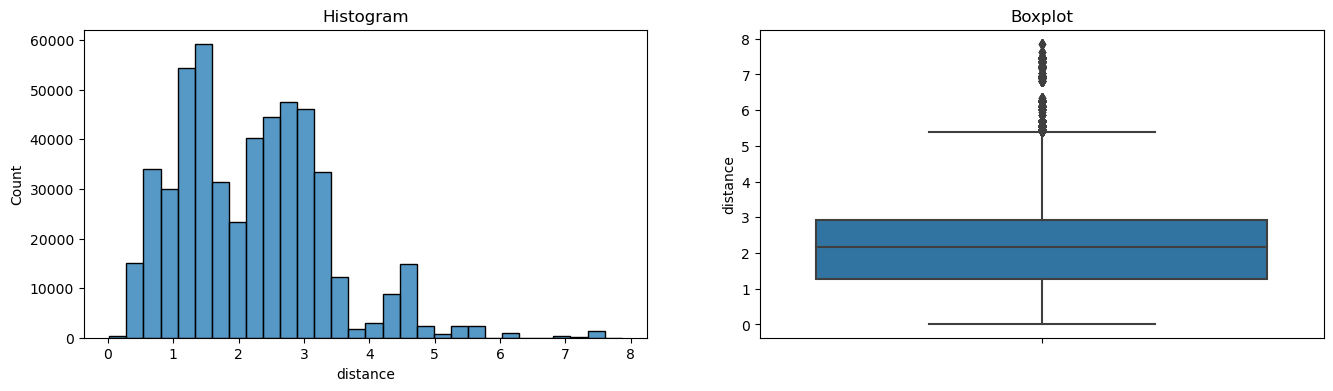


latitude - Before Capping


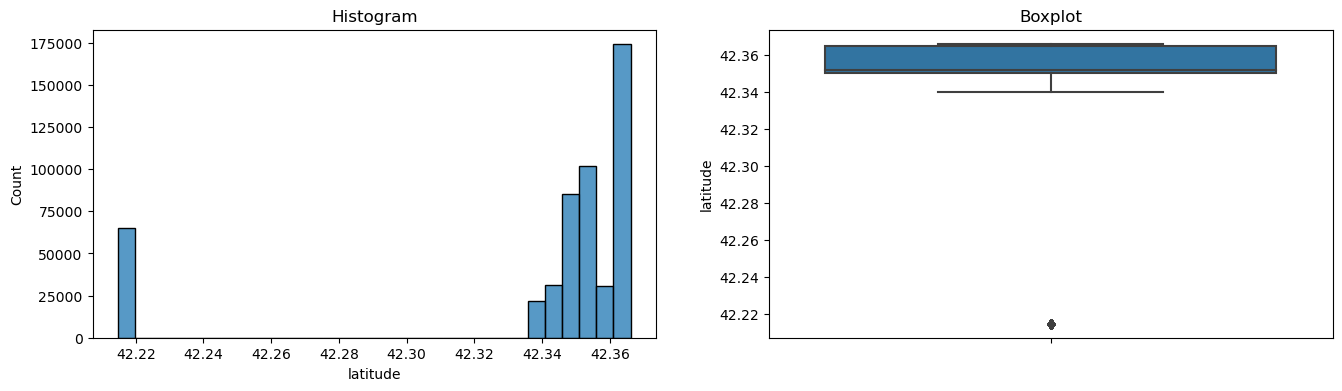


latitude - After Capping


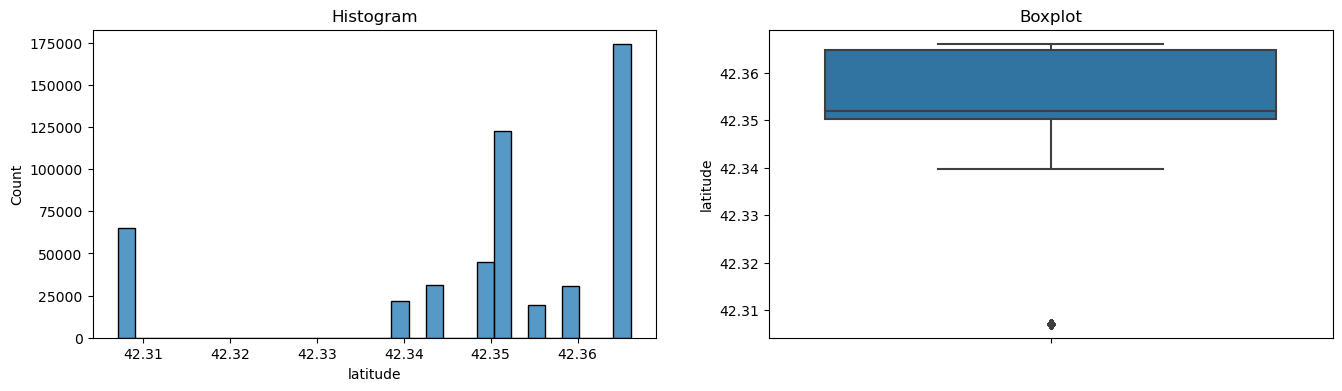


temperature - Before Capping


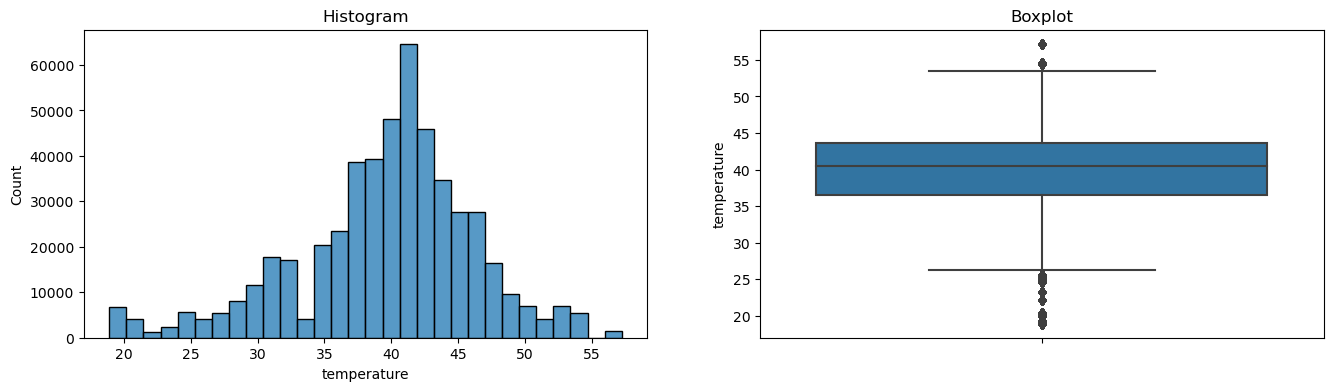


temperature - After Capping


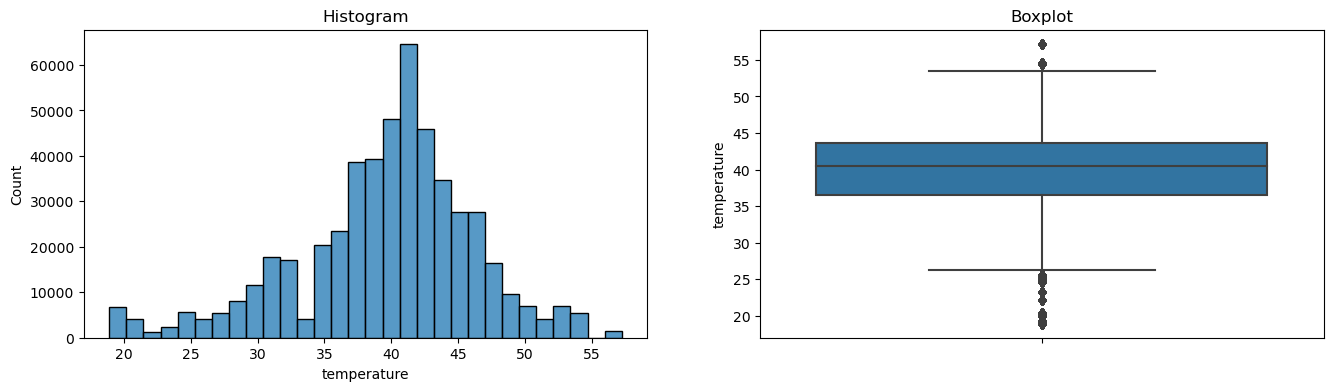


windGust - Before Capping


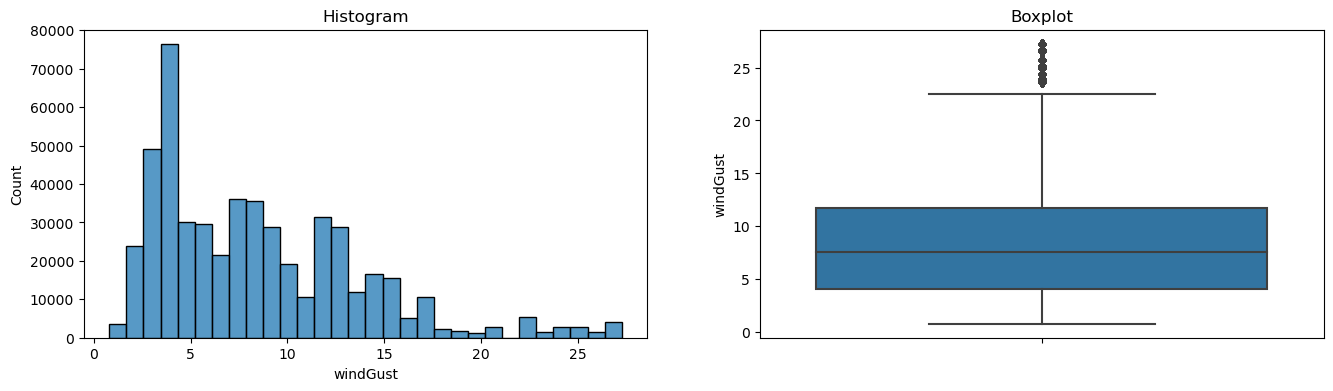


windGust - After Capping


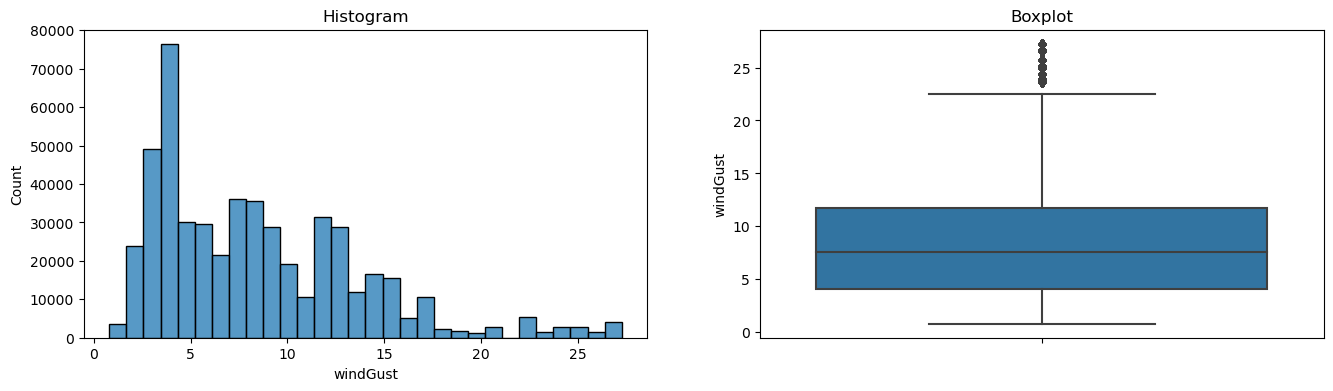


visibility - Before Capping


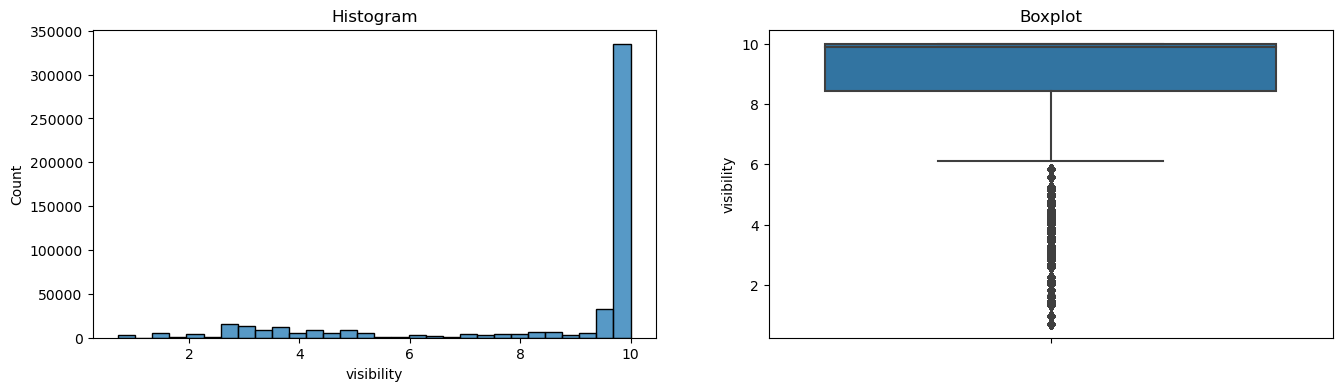


visibility - After Capping


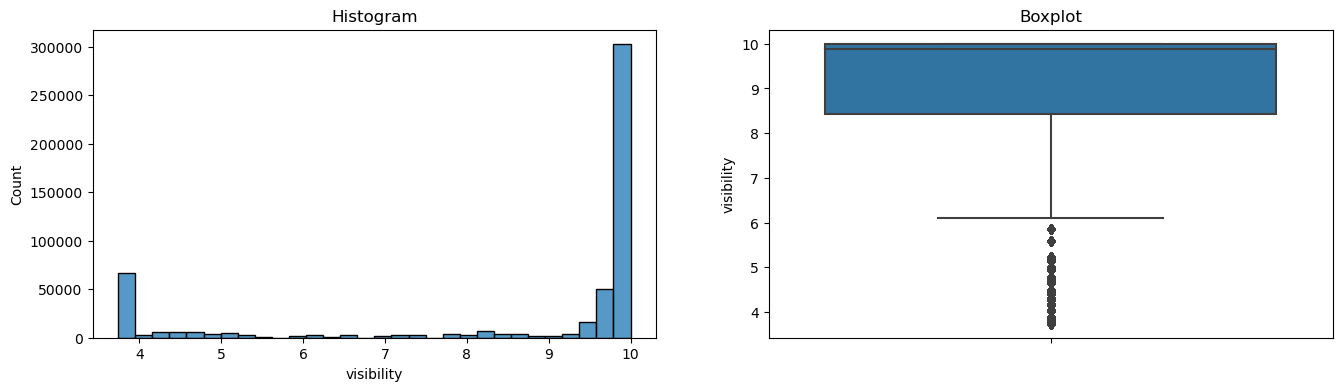


apparentTemperatureLow - Before Capping


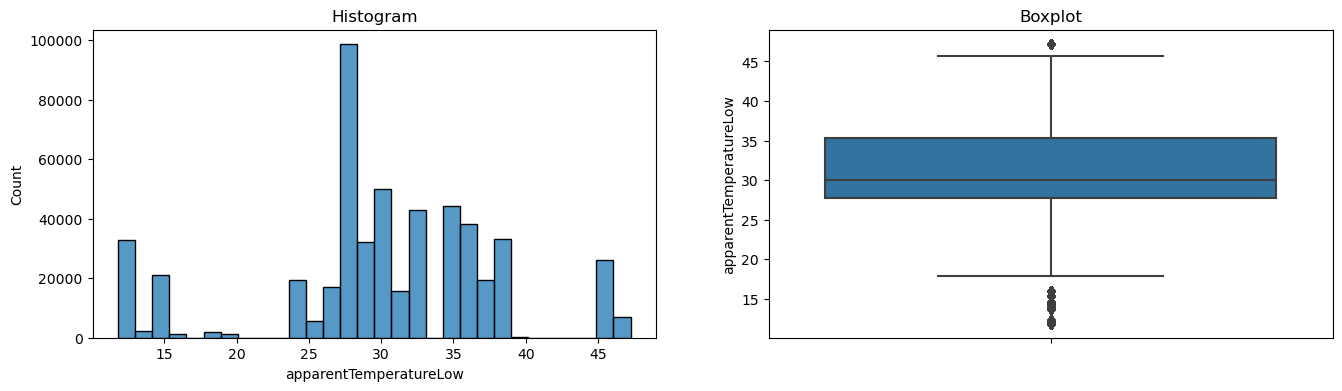


apparentTemperatureLow - After Capping


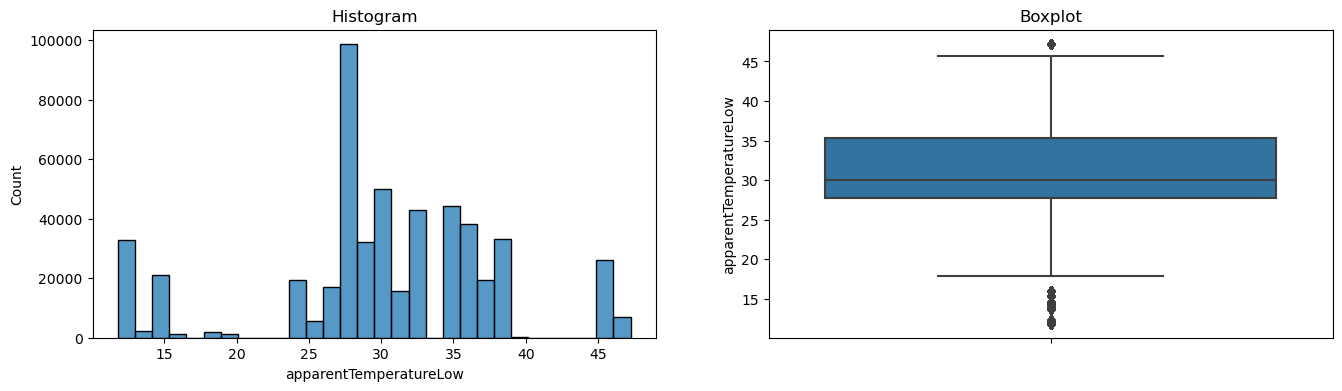


windBearing - Before Capping


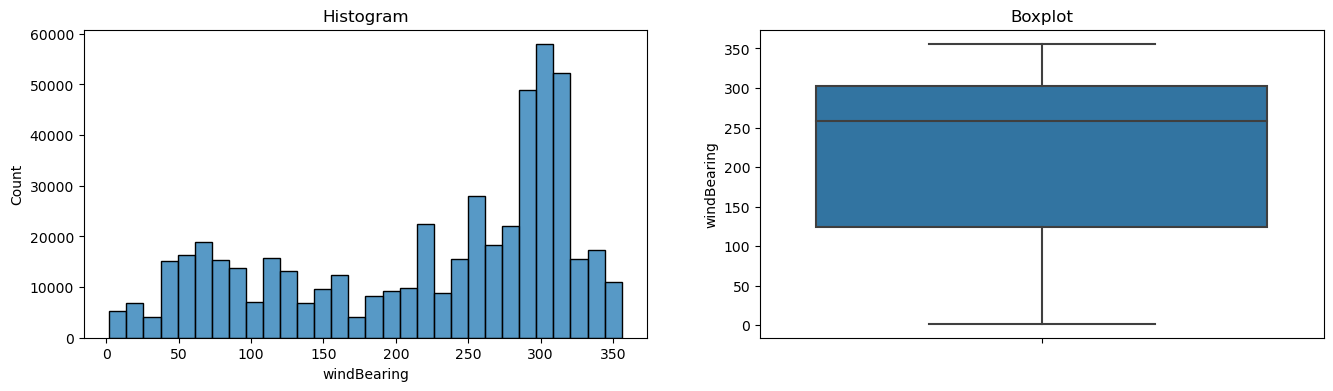


windBearing - After Capping


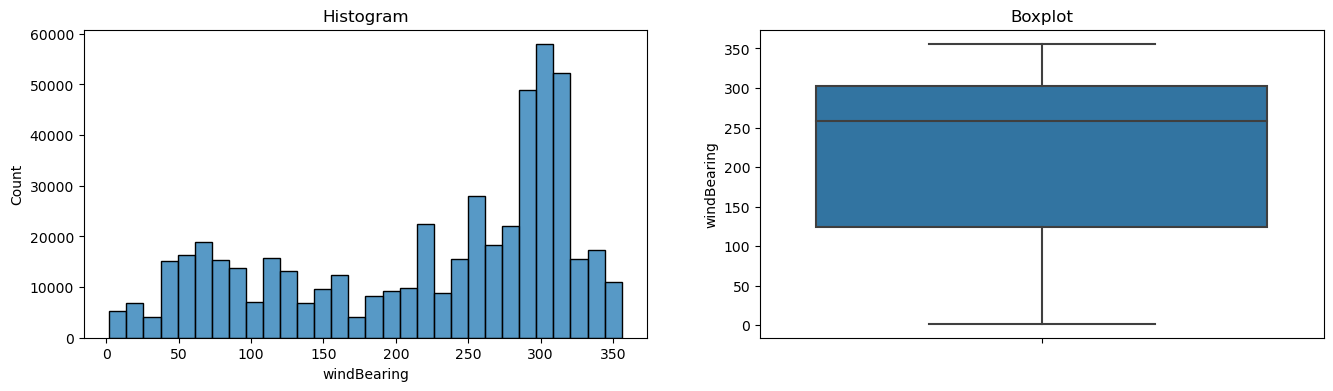


cloudCover - Before Capping


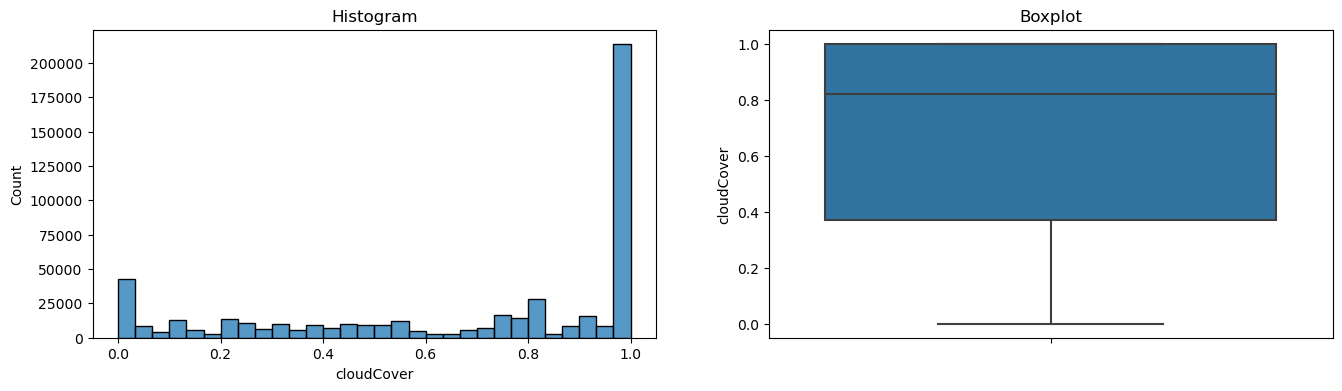


cloudCover - After Capping


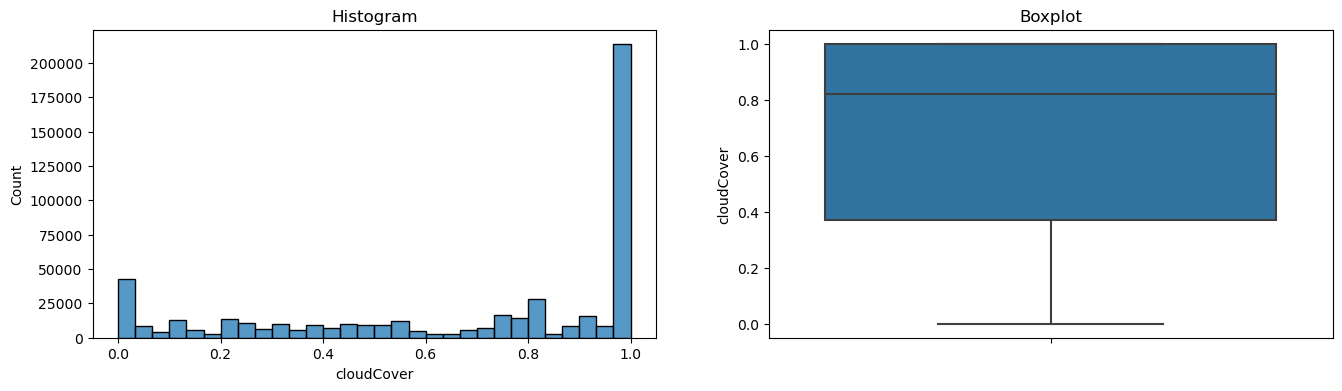


visibility.1 - Before Capping


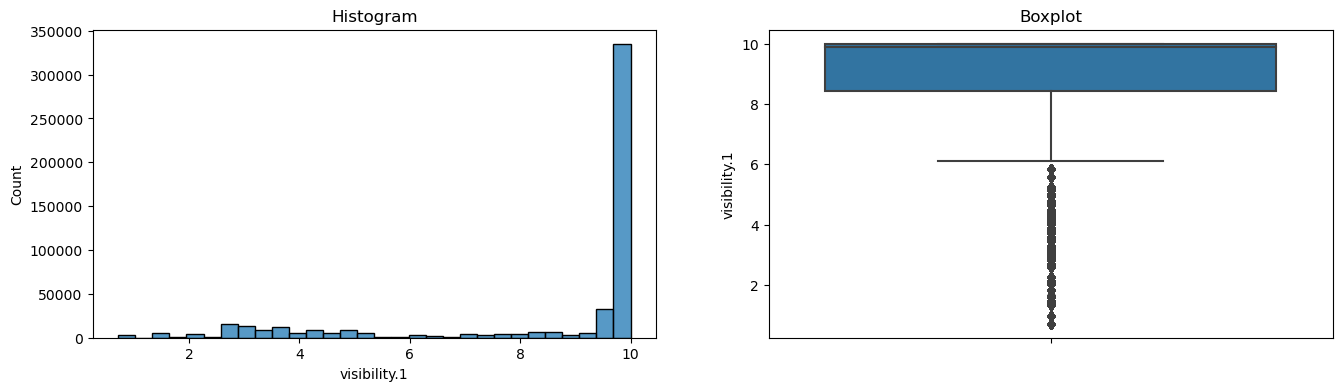


visibility.1 - After Capping


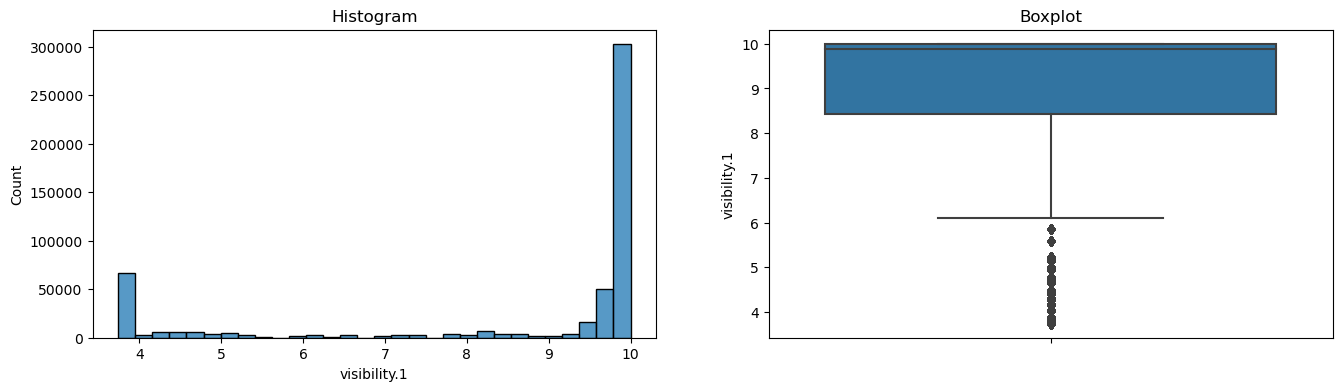


precipIntensityMax - Before Capping


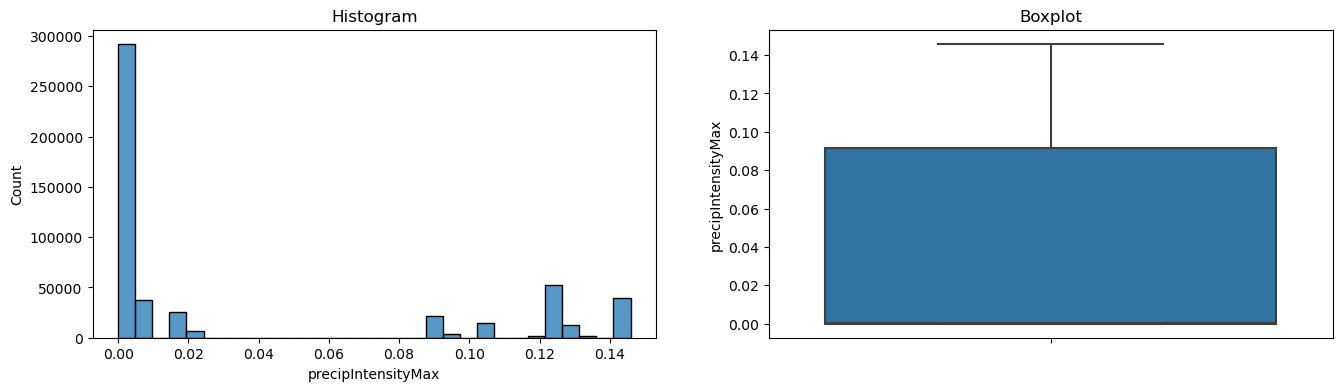


precipIntensityMax - After Capping


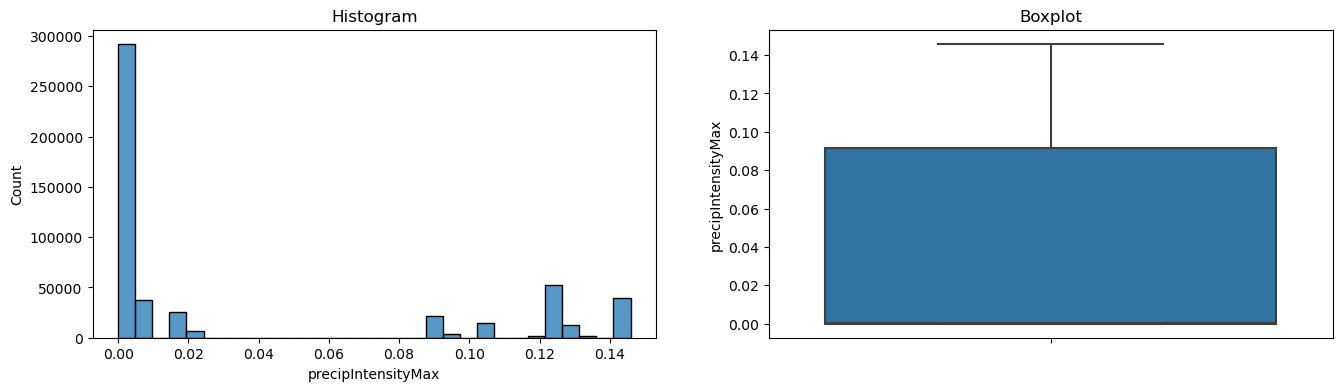


temperatureMin - Before Capping


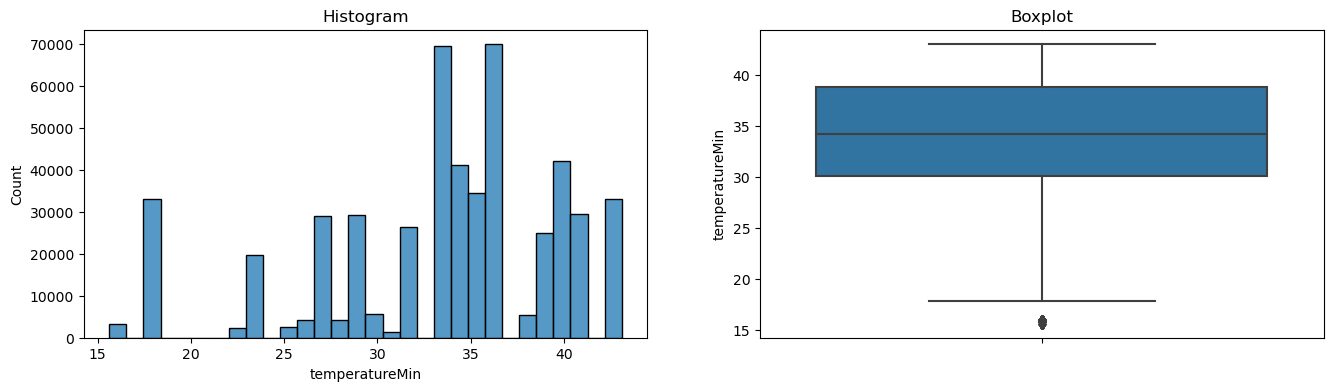


temperatureMin - After Capping


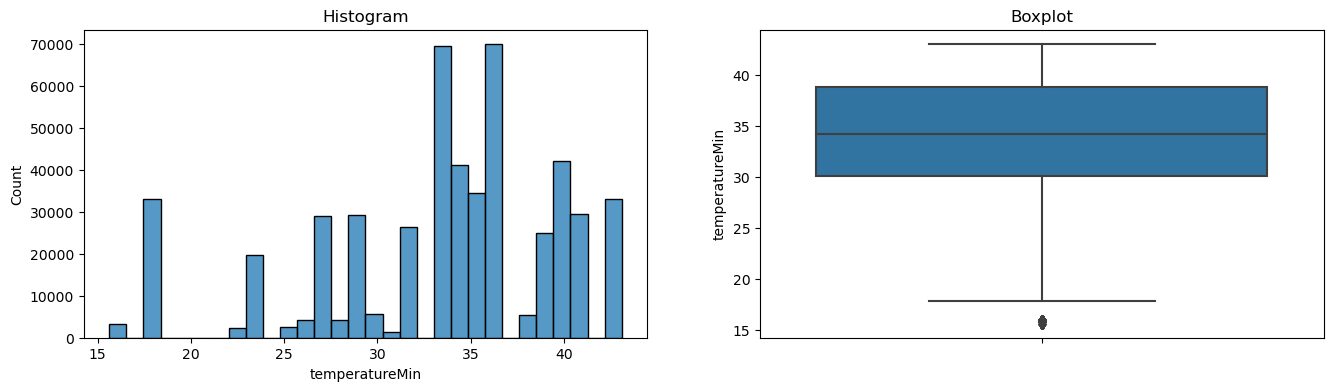


apparentTemperatureMin - Before Capping


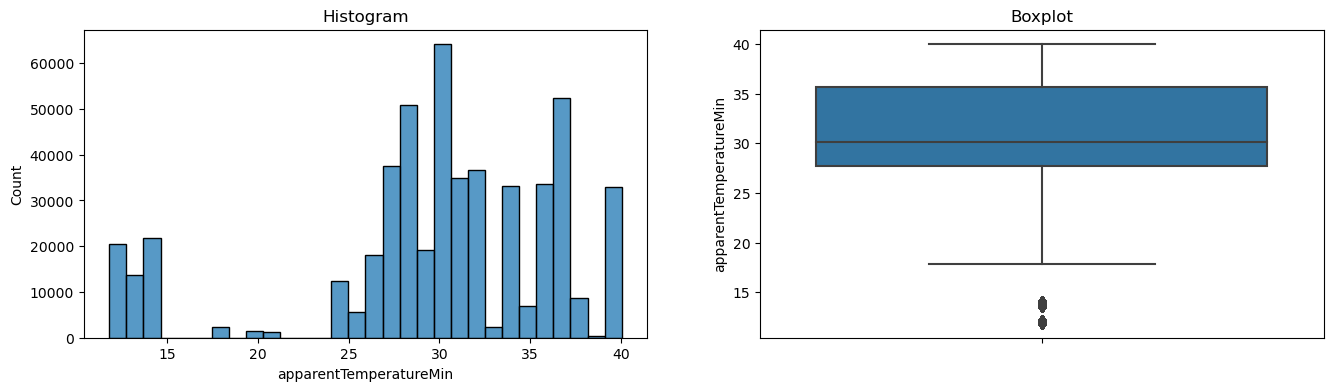


apparentTemperatureMin - After Capping


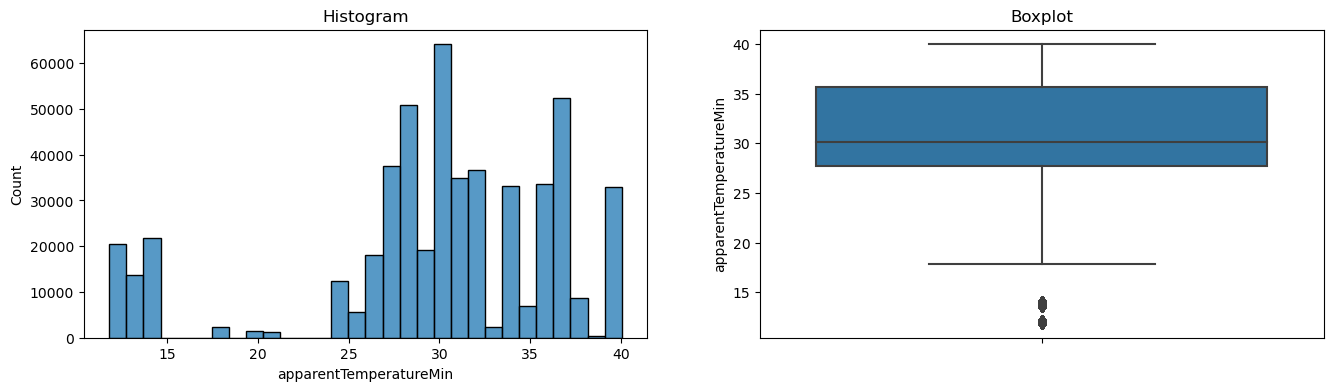


apparentTemperatureMax - Before Capping


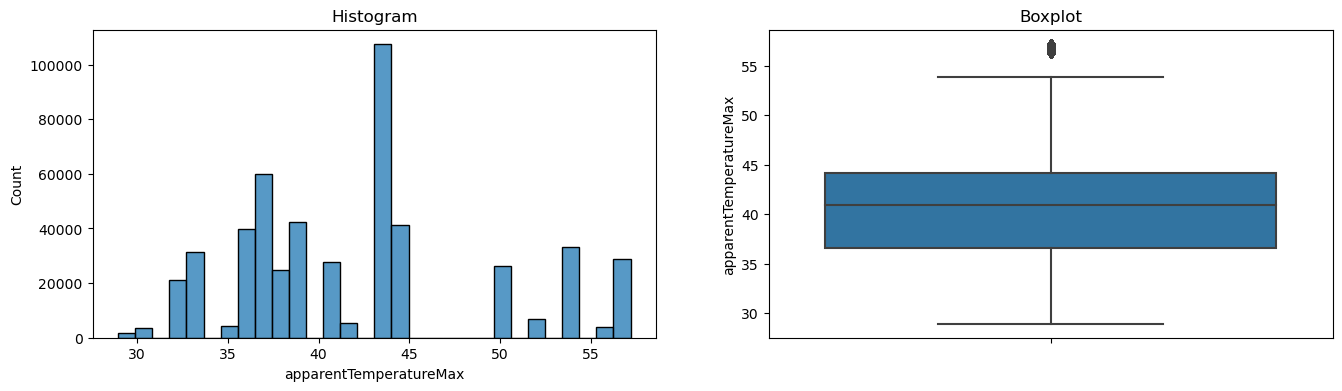


apparentTemperatureMax - After Capping


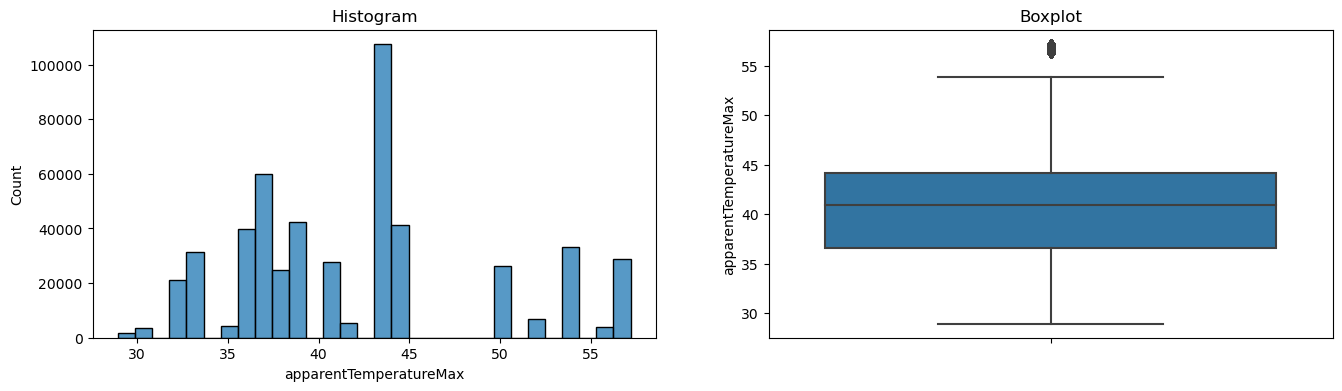

Visualisasi Distribusi Sebelum dan Sesudah Capping - Kolom dengan distribusi normal:

timestamp - Before Capping


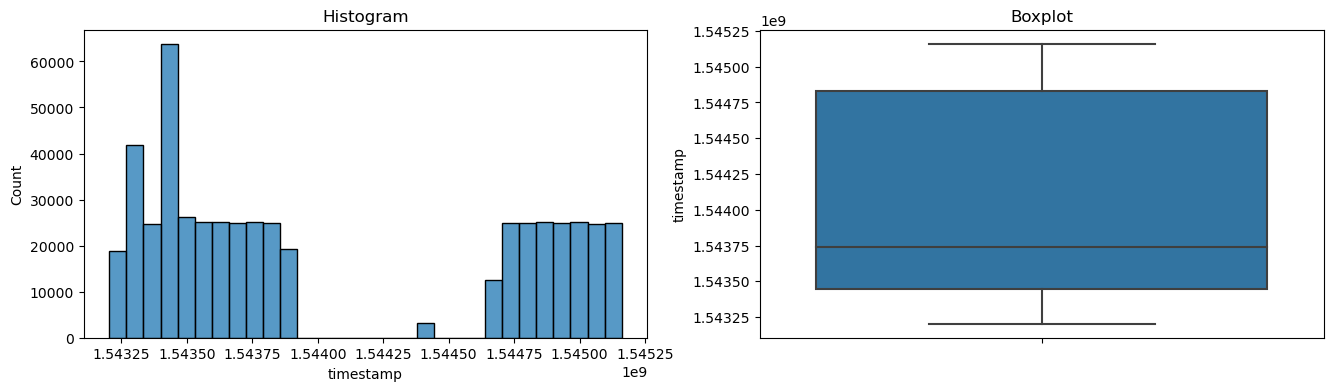


timestamp - After Capping


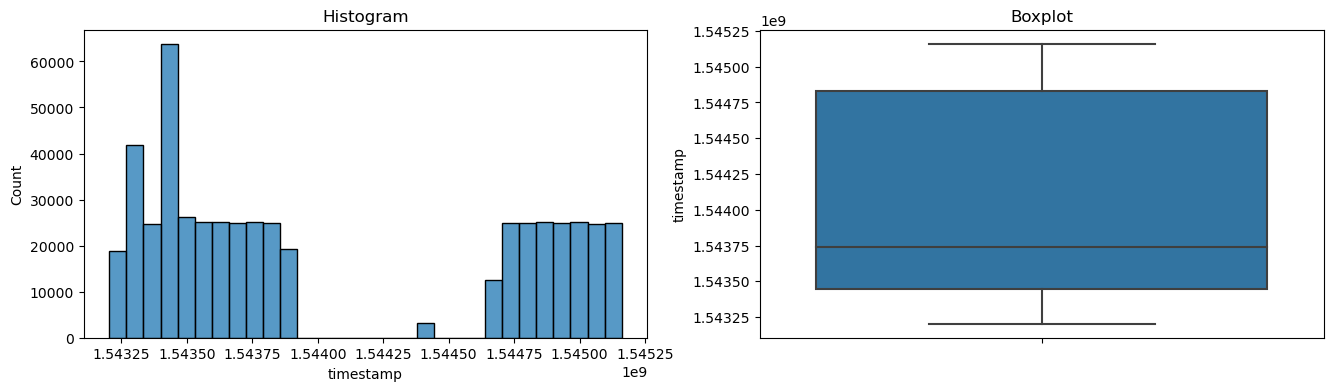


hour - Before Capping


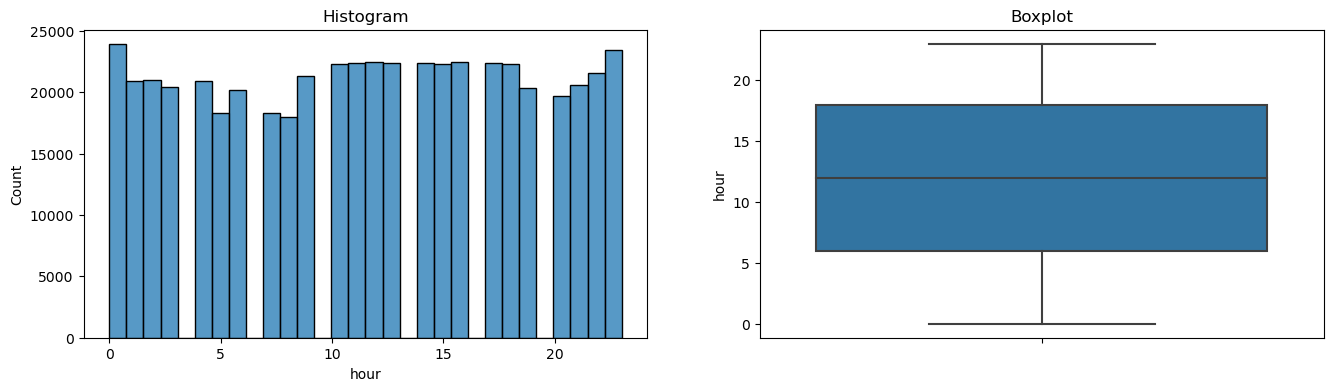


hour - After Capping


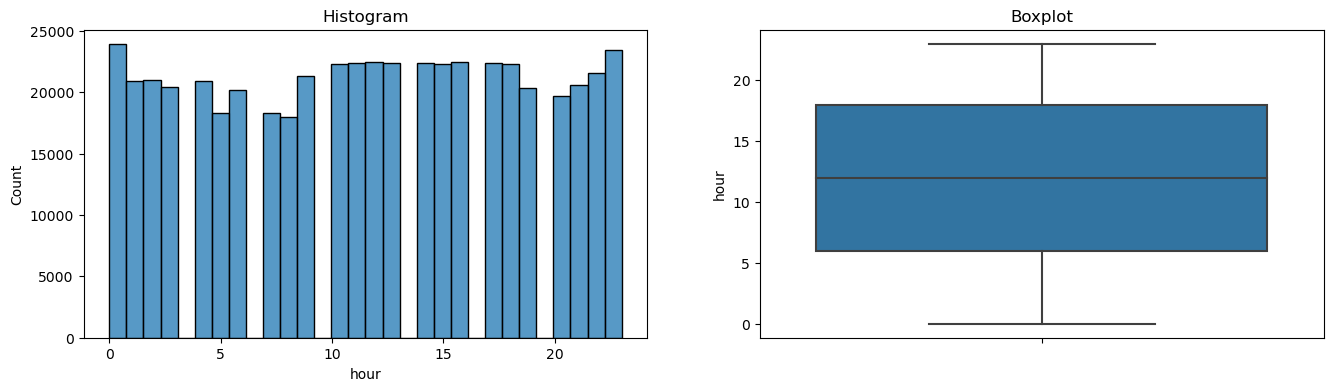


day - Before Capping


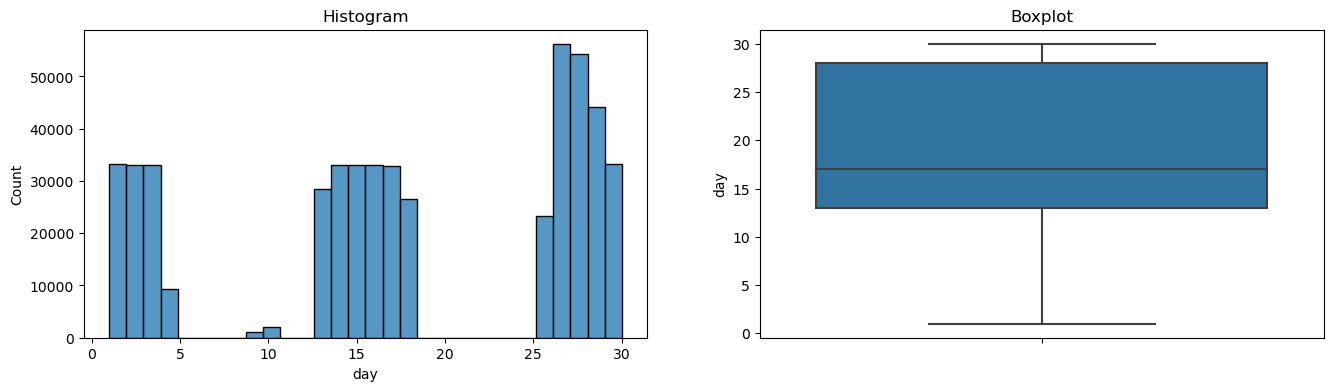


day - After Capping


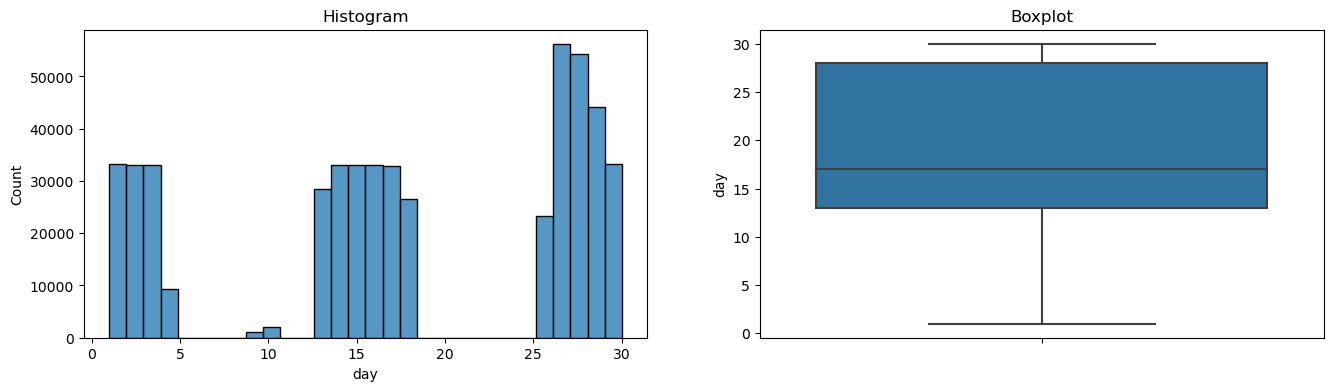


month - Before Capping


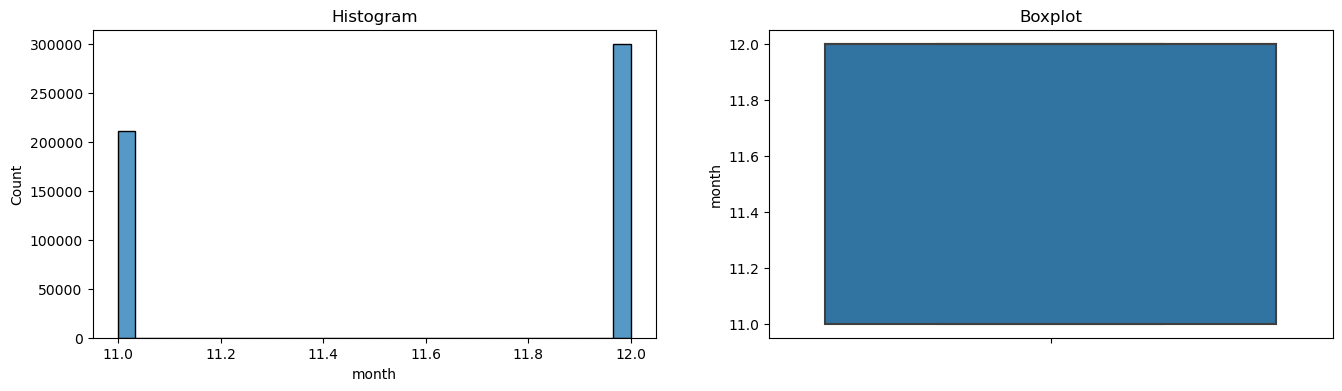


month - After Capping


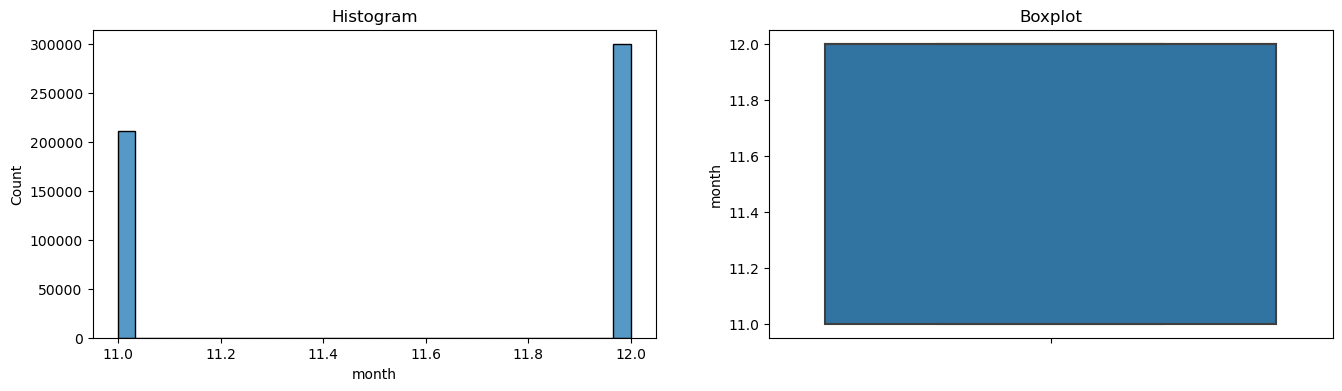


longitude - Before Capping


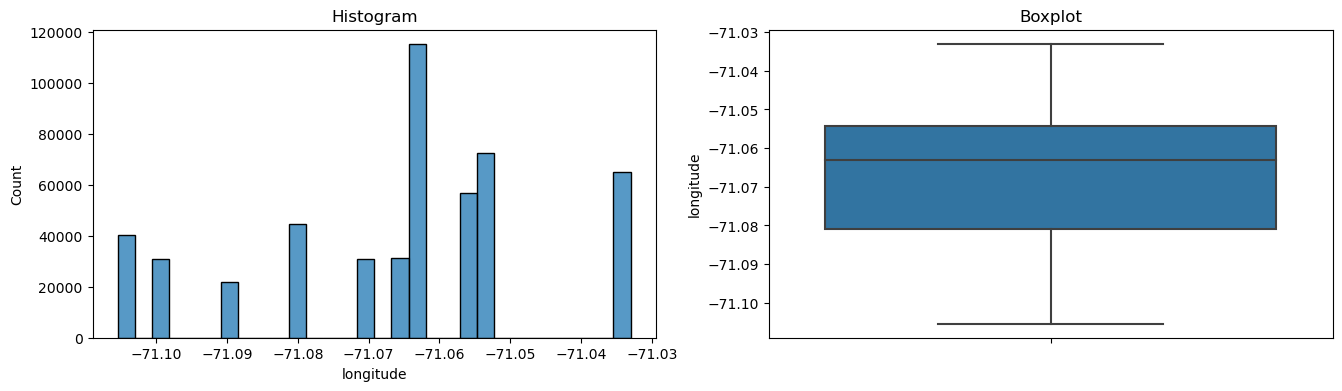


longitude - After Capping


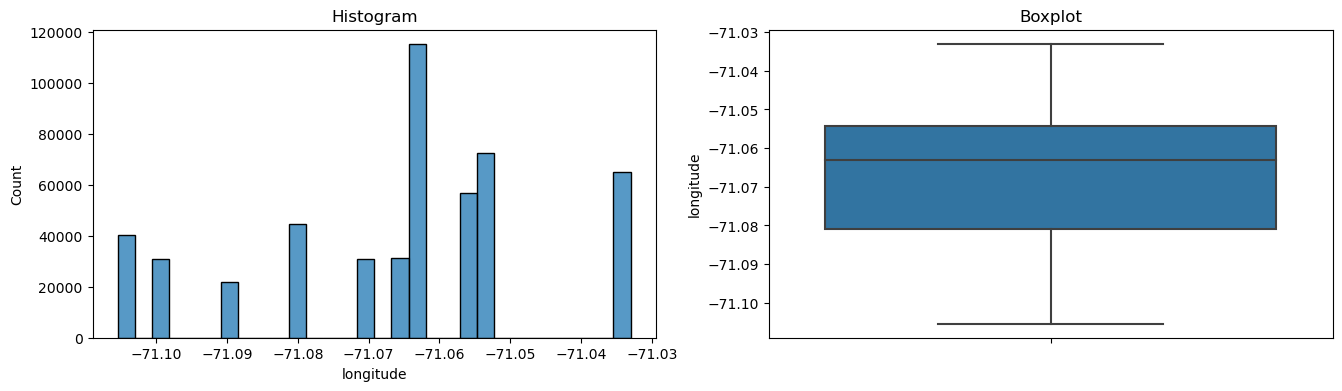


apparentTemperature - Before Capping


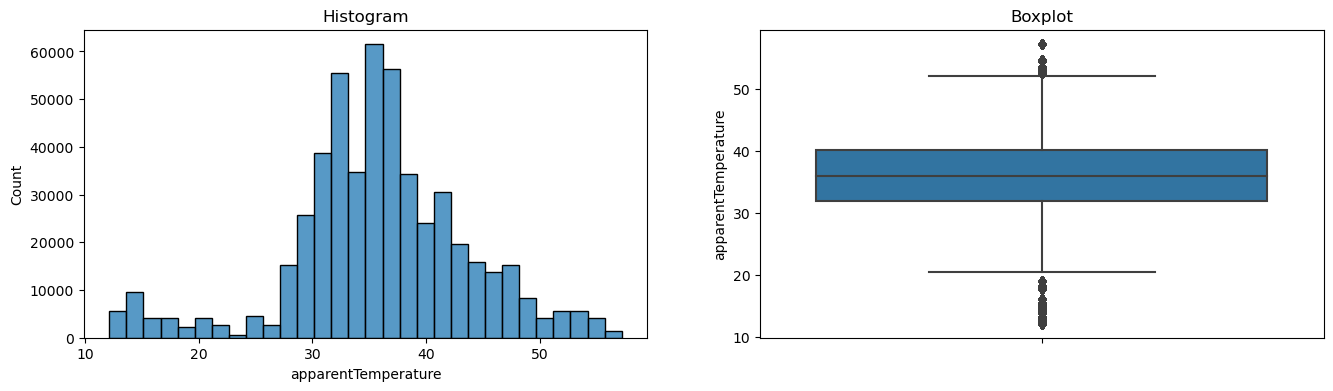


apparentTemperature - After Capping


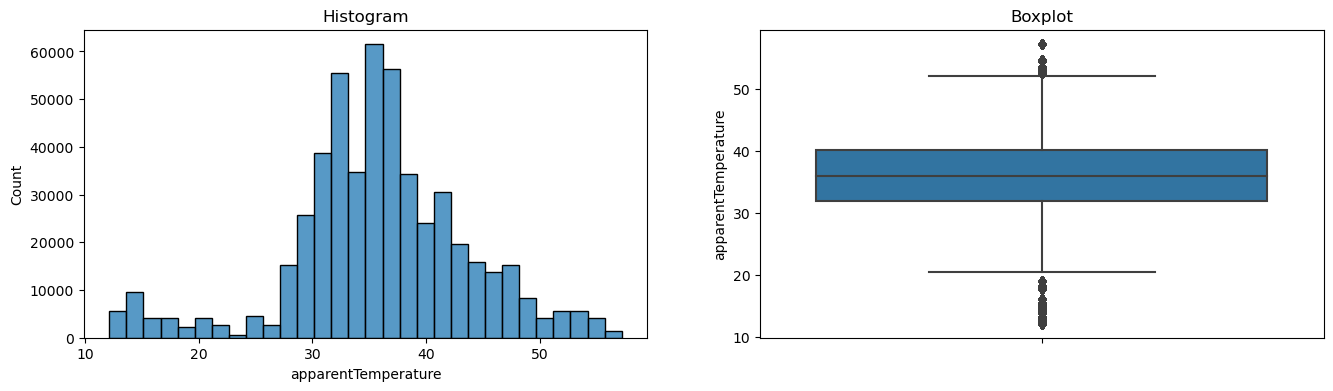


humidity - Before Capping


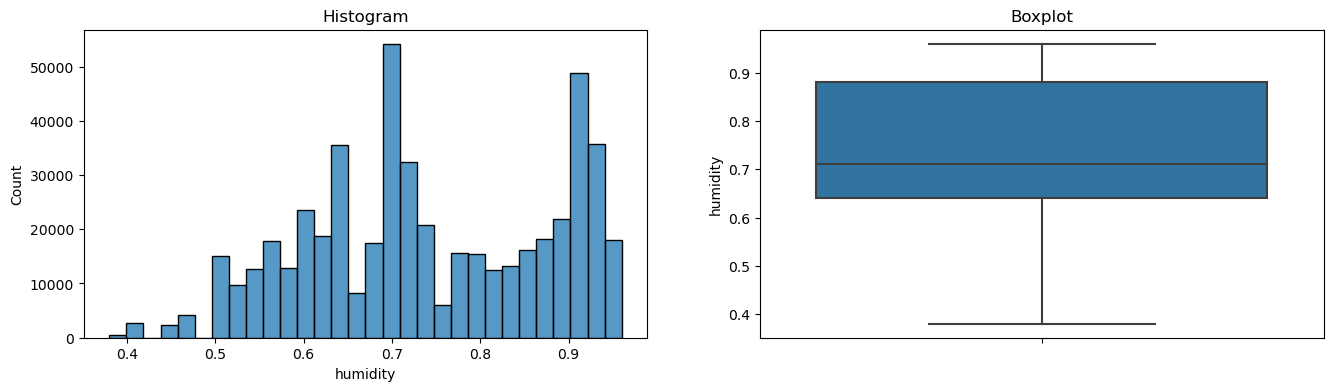


humidity - After Capping


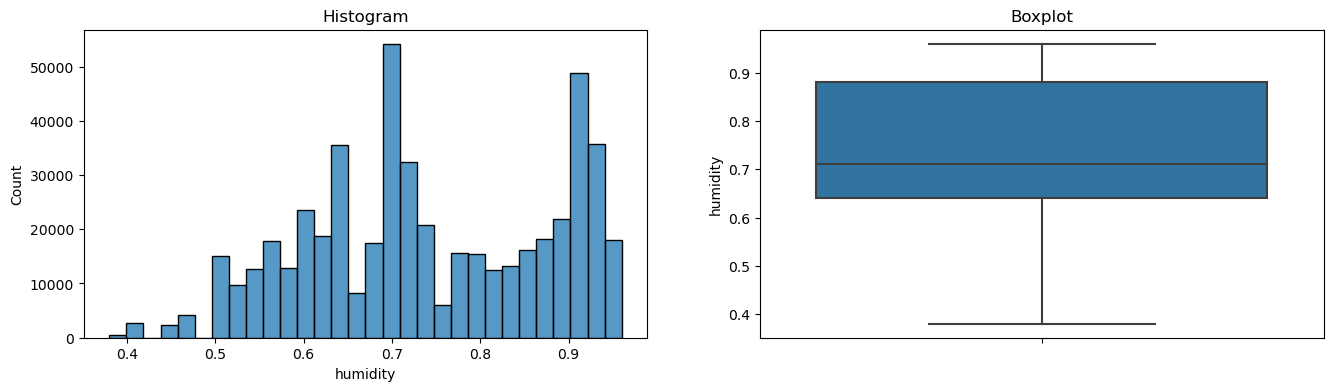


windSpeed - Before Capping


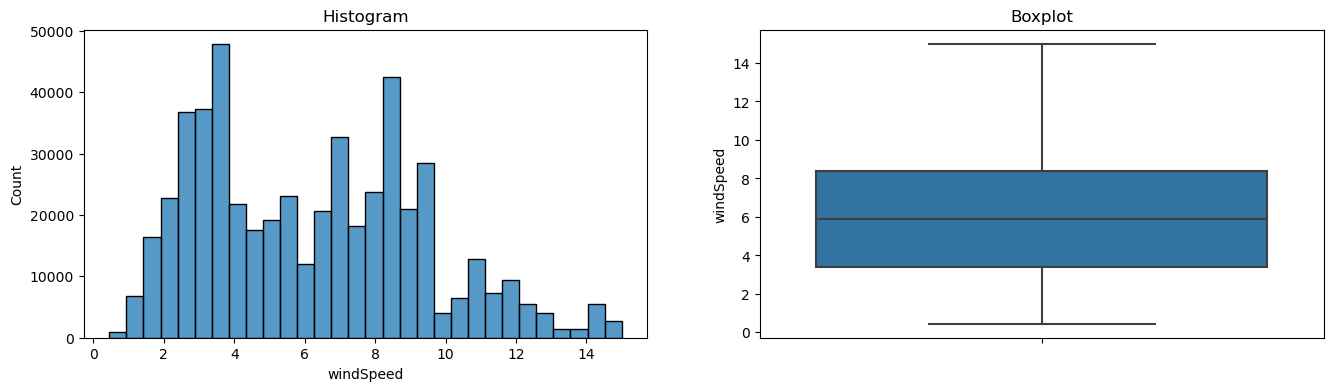


windSpeed - After Capping


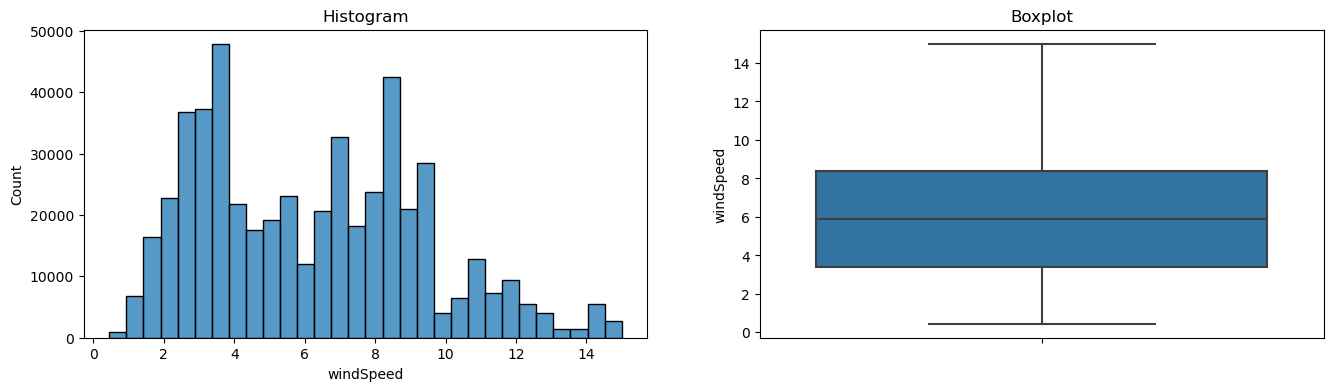


windGustTime - Before Capping


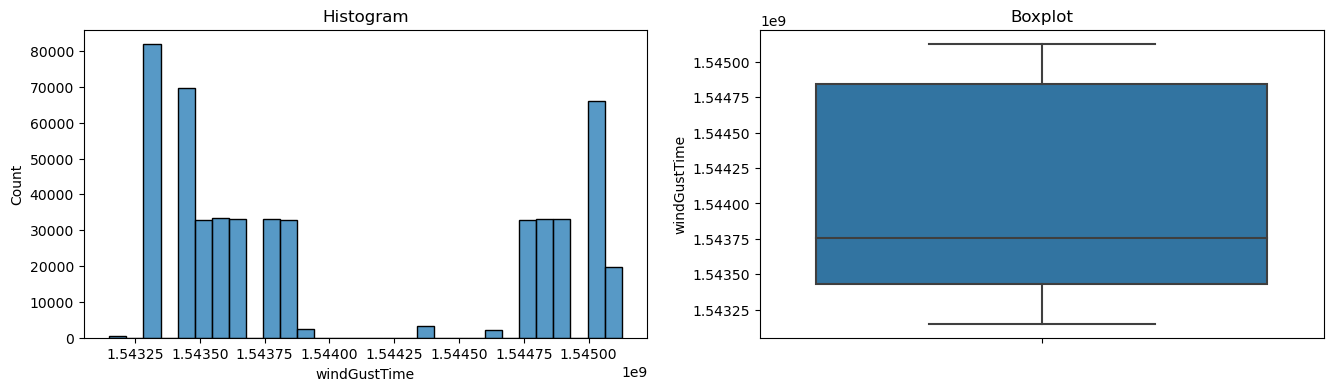


windGustTime - After Capping


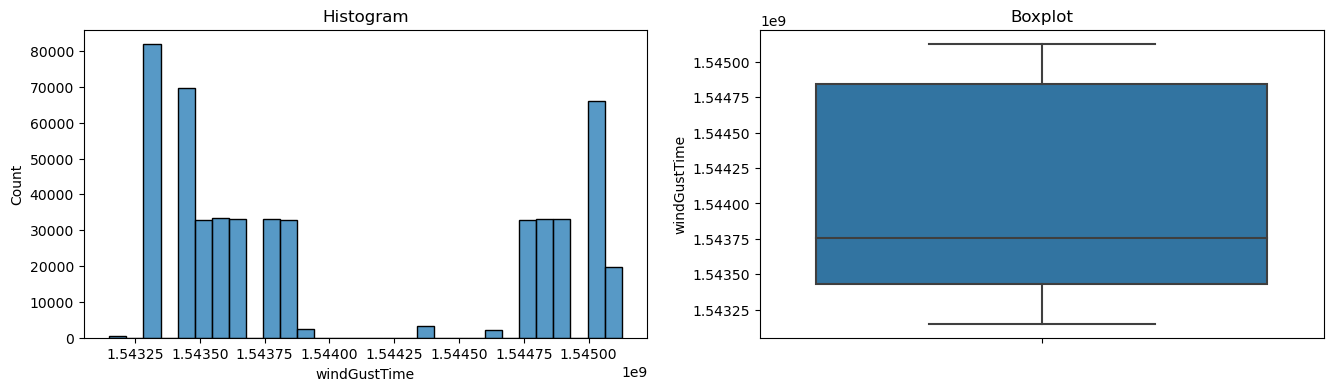


temperatureHigh - Before Capping


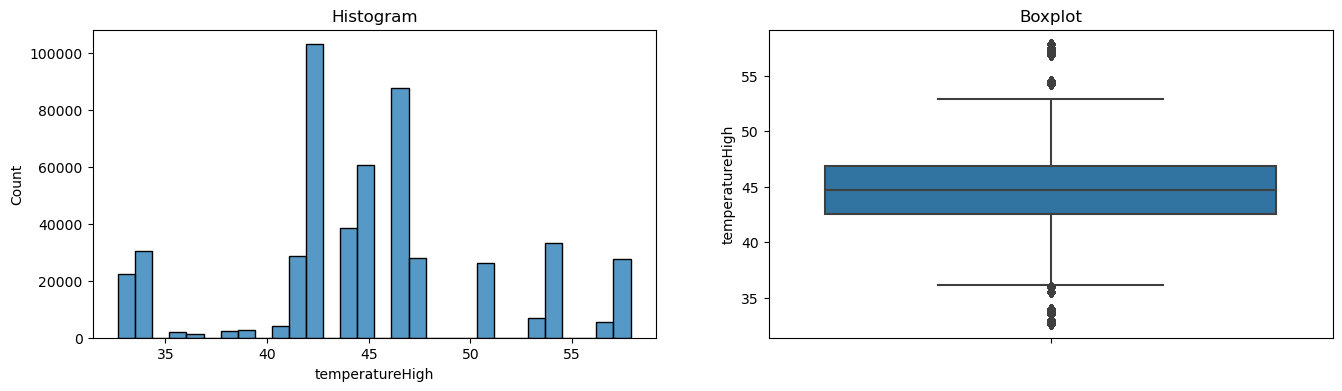


temperatureHigh - After Capping


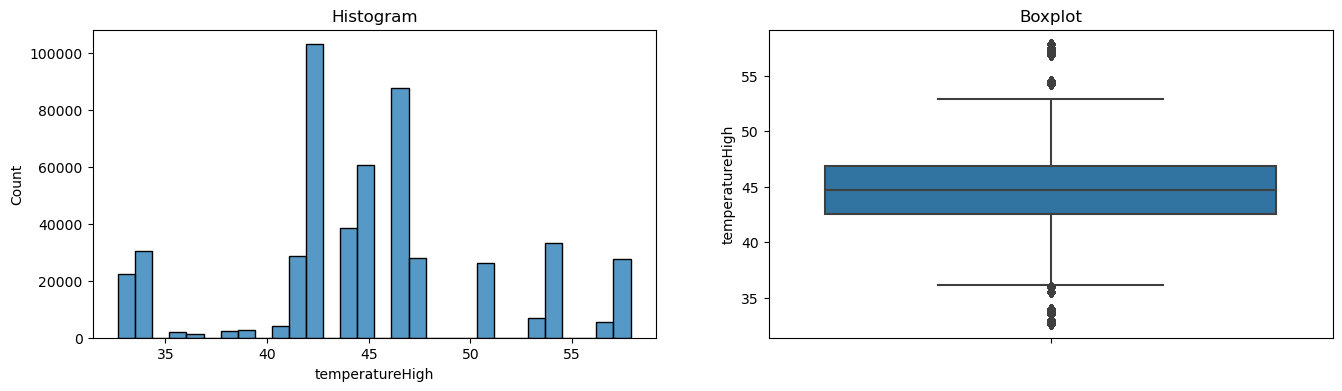


temperatureHighTime - Before Capping


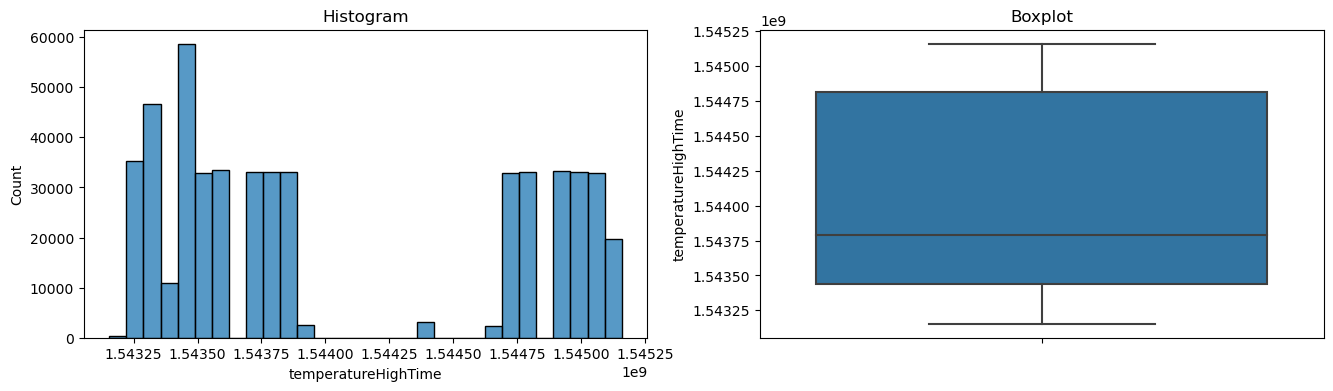


temperatureHighTime - After Capping


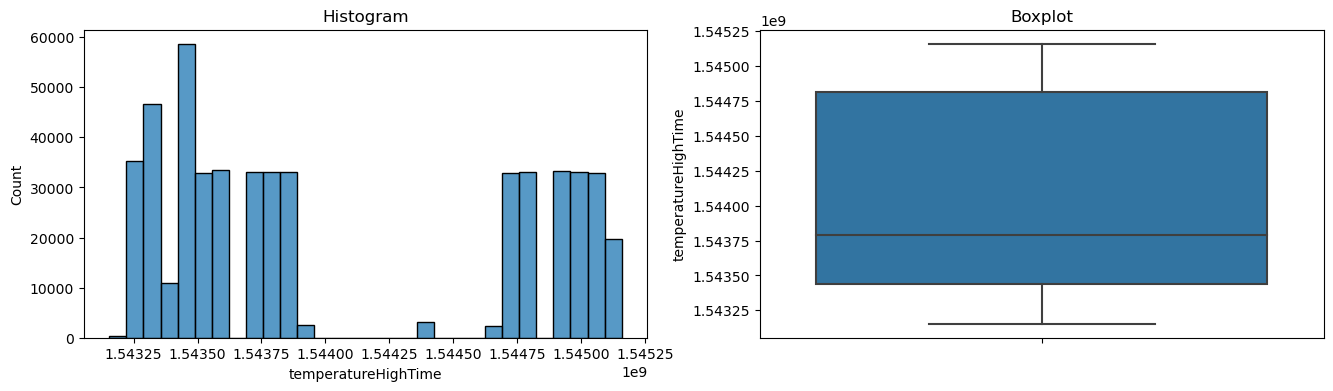


temperatureLow - Before Capping


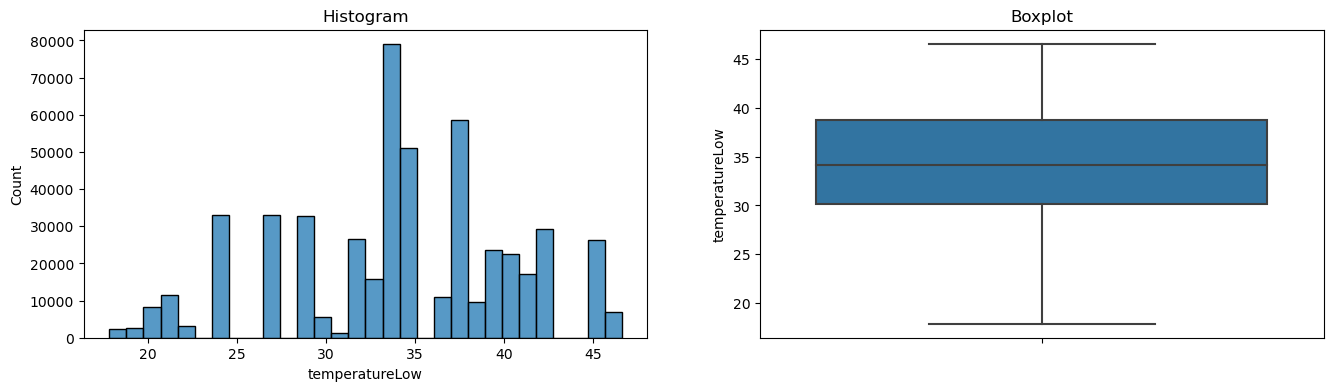


temperatureLow - After Capping


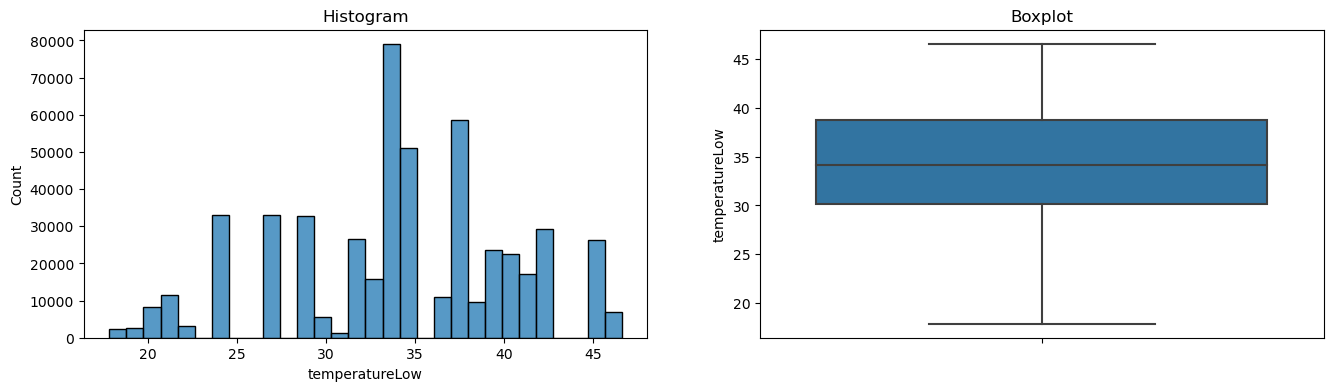


temperatureLowTime - Before Capping


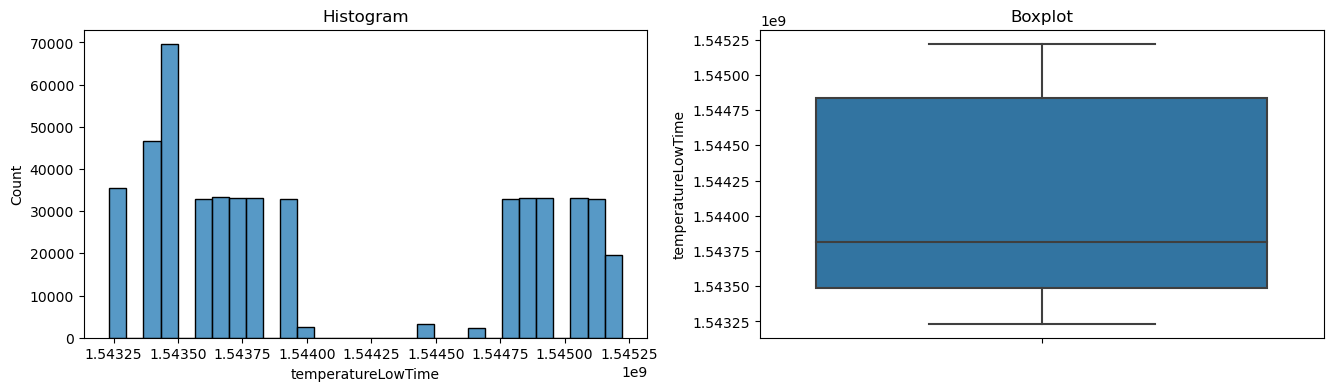


temperatureLowTime - After Capping


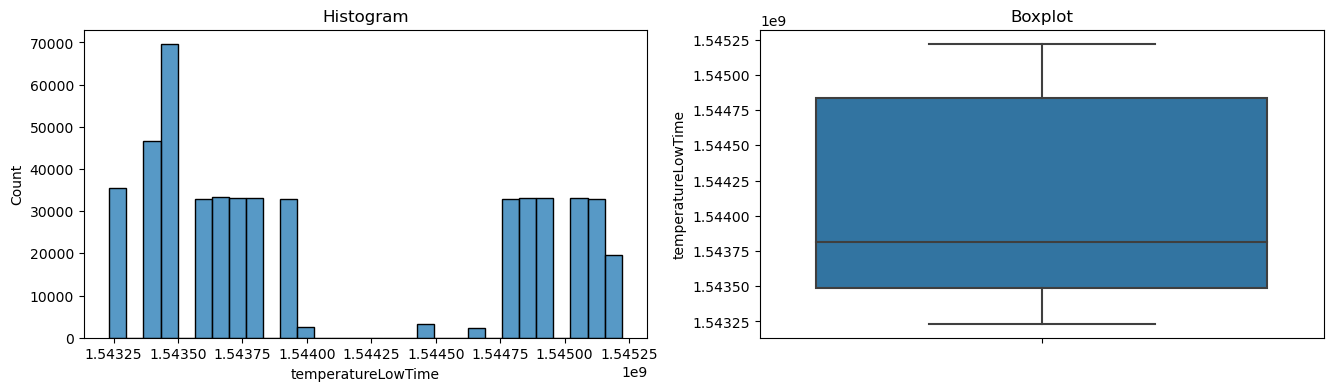


apparentTemperatureHigh - Before Capping


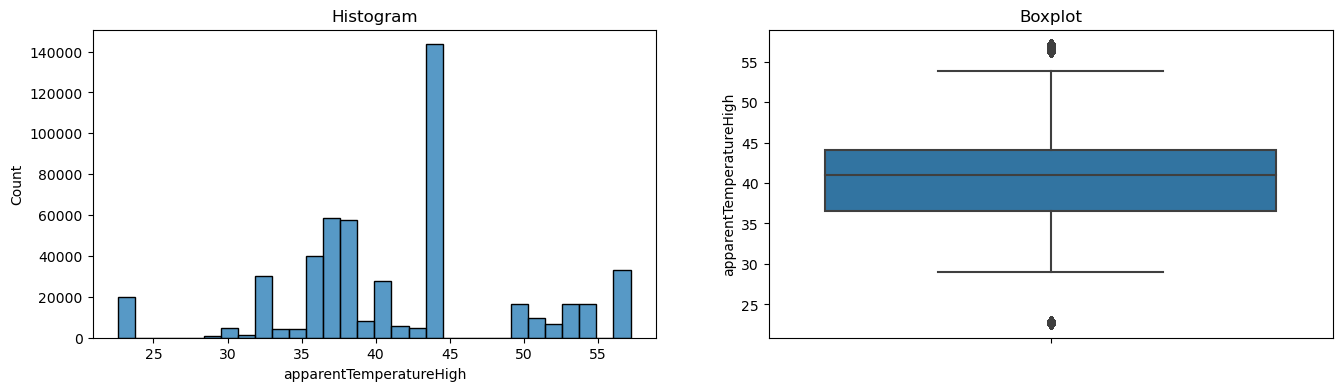


apparentTemperatureHigh - After Capping


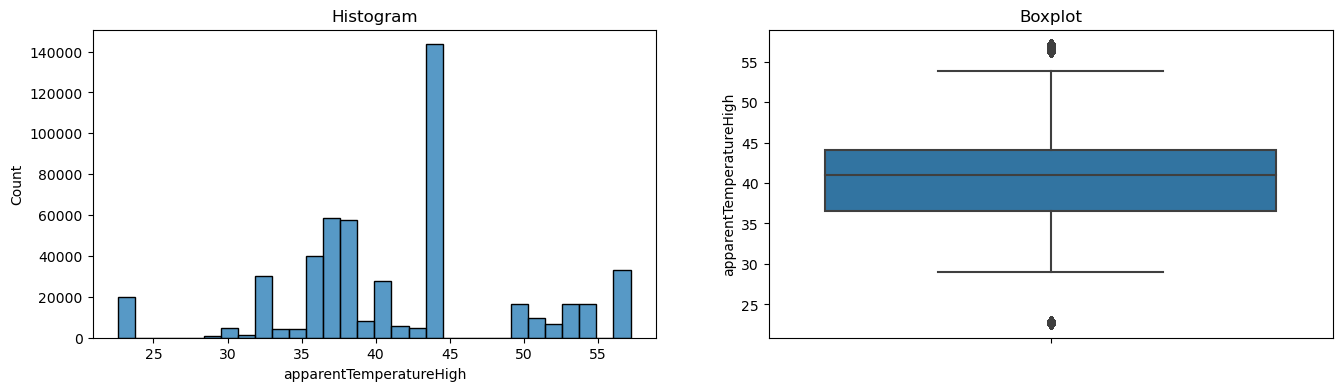


apparentTemperatureHighTime - Before Capping


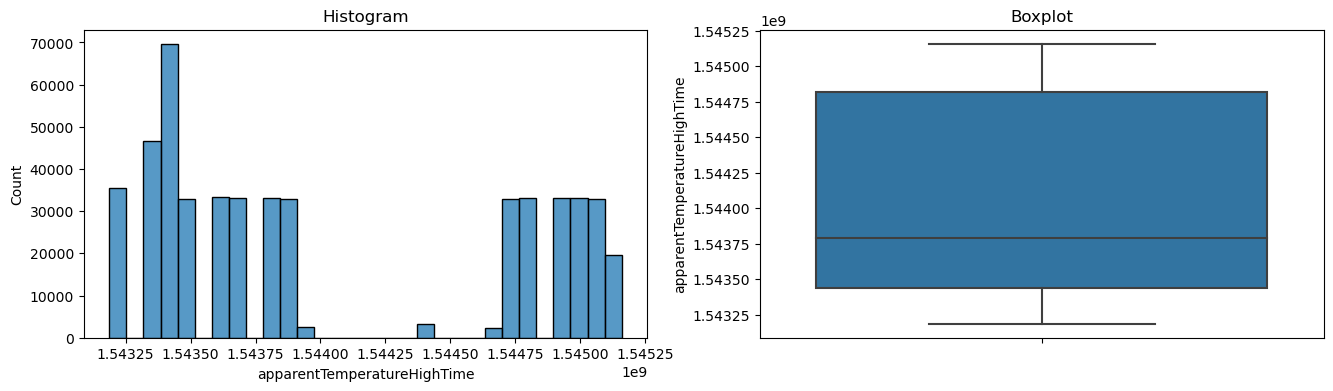


apparentTemperatureHighTime - After Capping


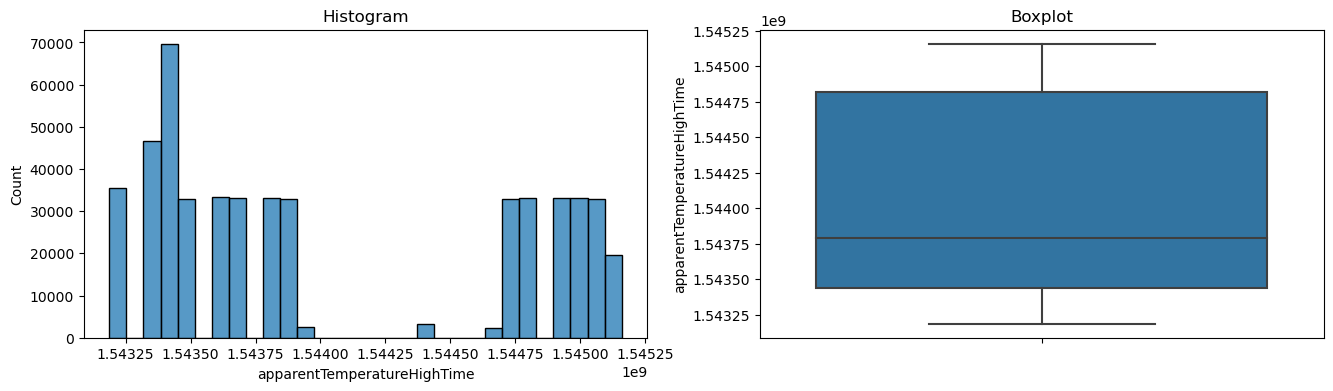


apparentTemperatureLowTime - Before Capping


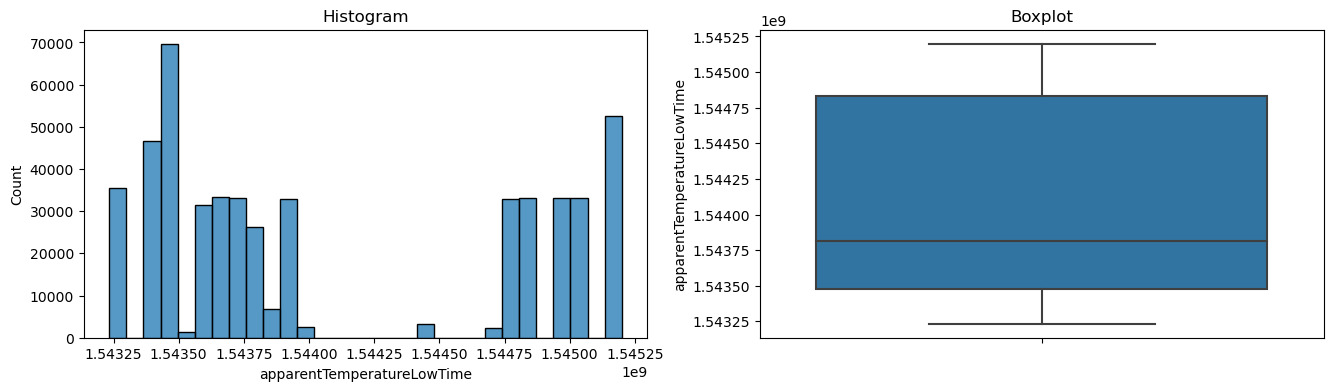


apparentTemperatureLowTime - After Capping


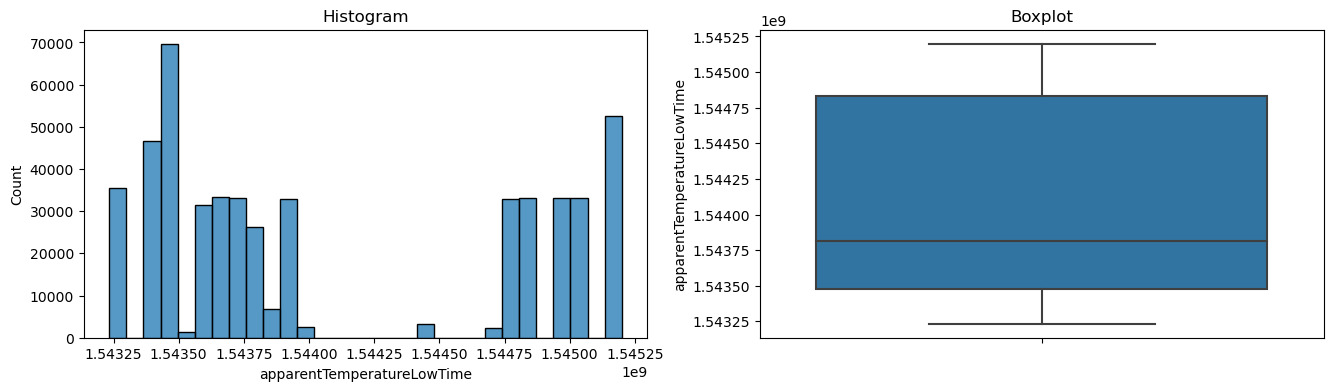


dewPoint - Before Capping


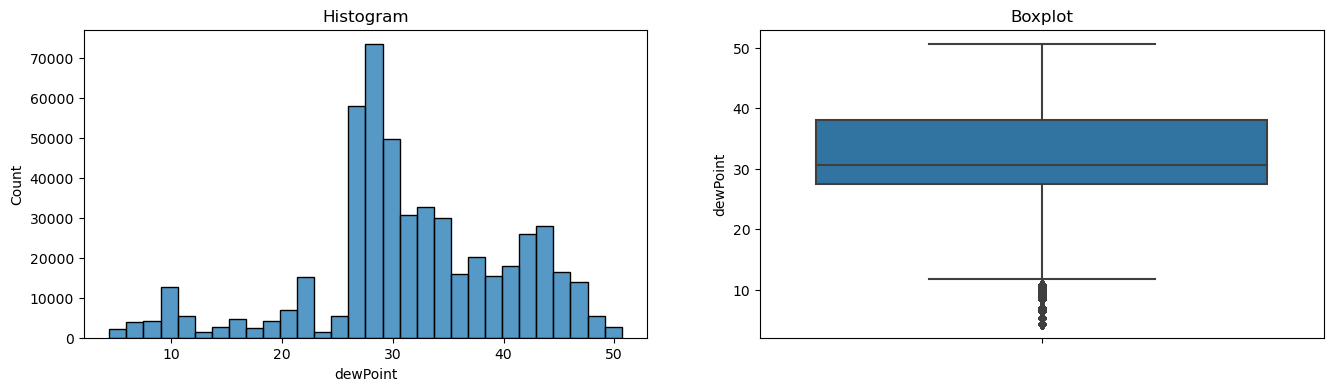


dewPoint - After Capping


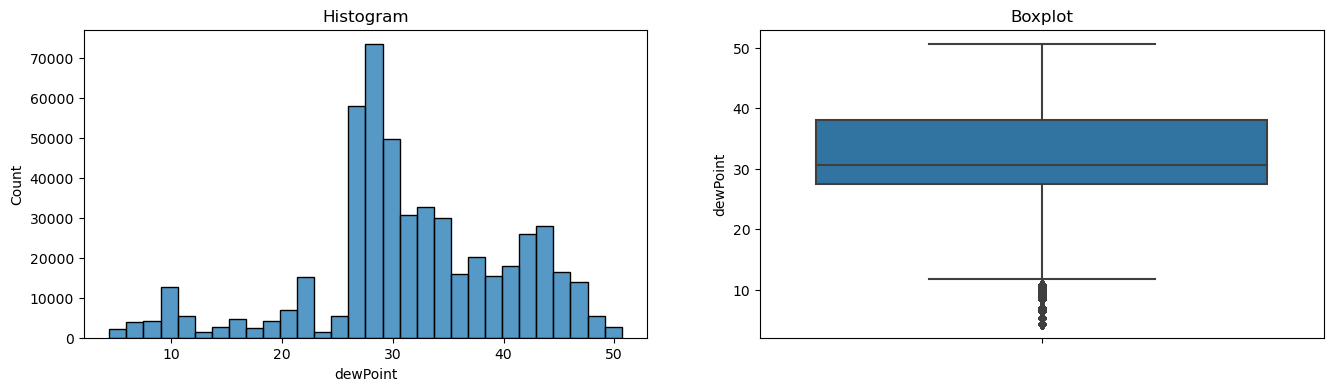


pressure - Before Capping


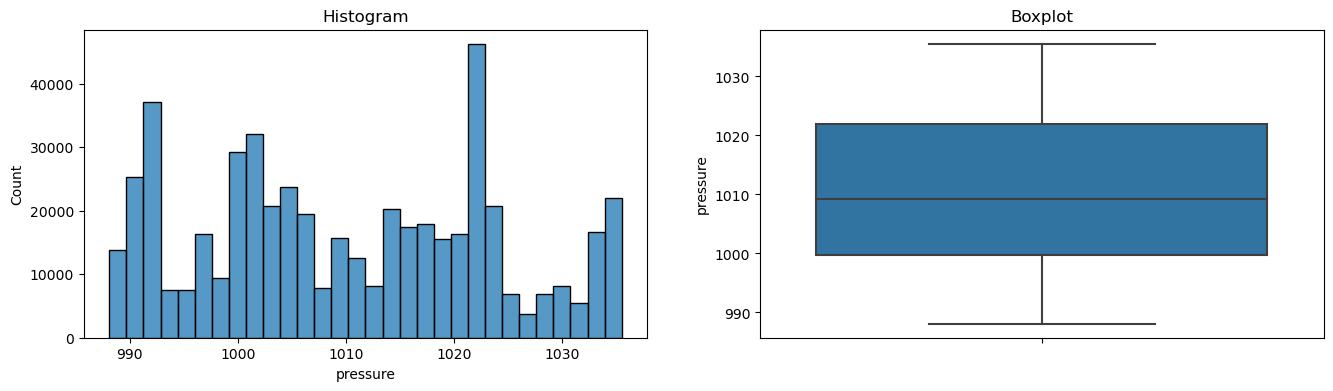


pressure - After Capping


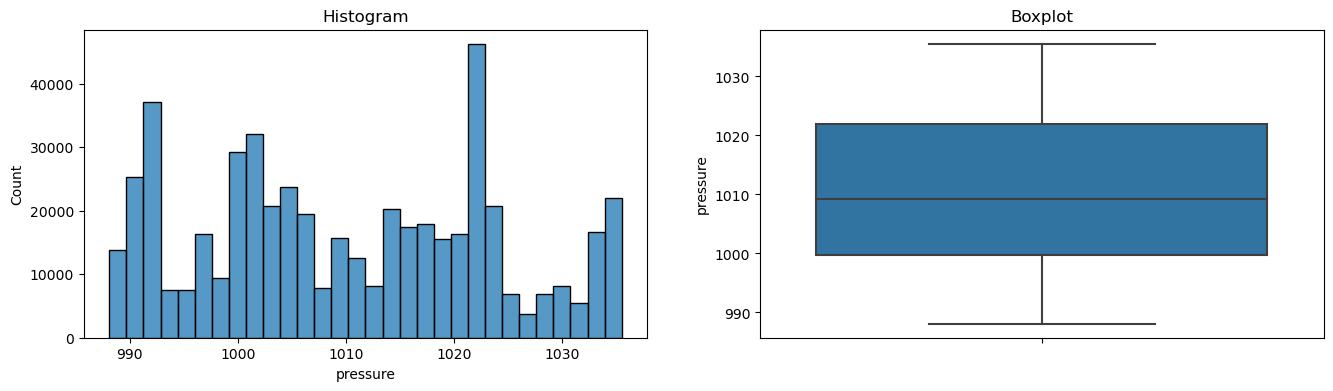


ozone - Before Capping


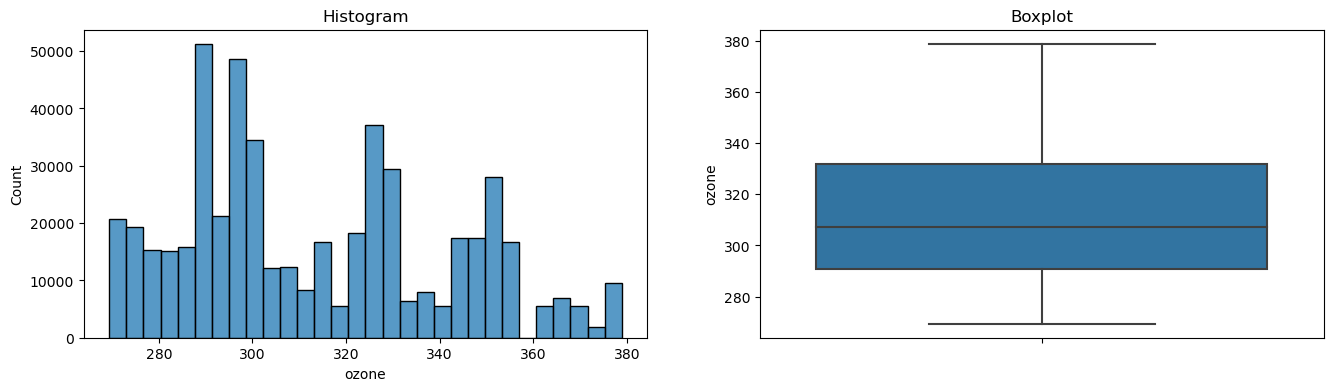


ozone - After Capping


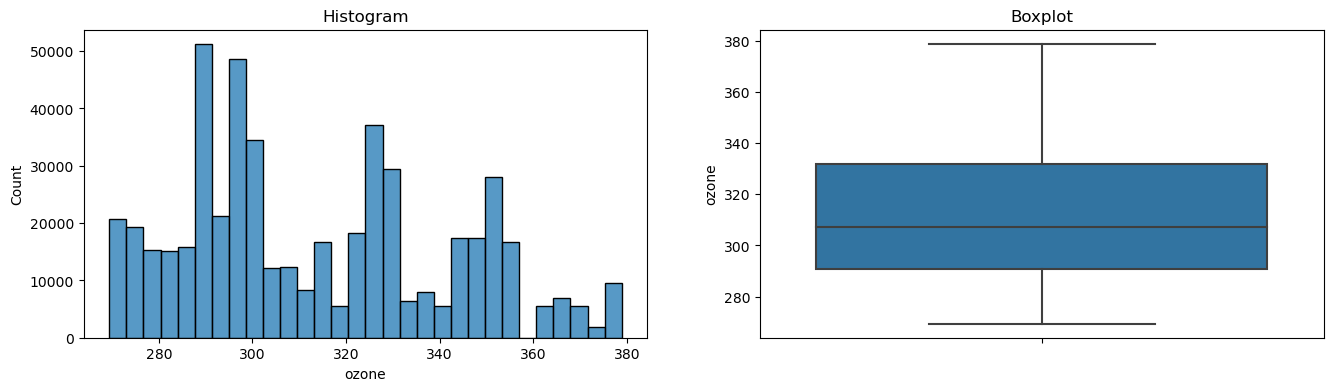


sunriseTime - Before Capping


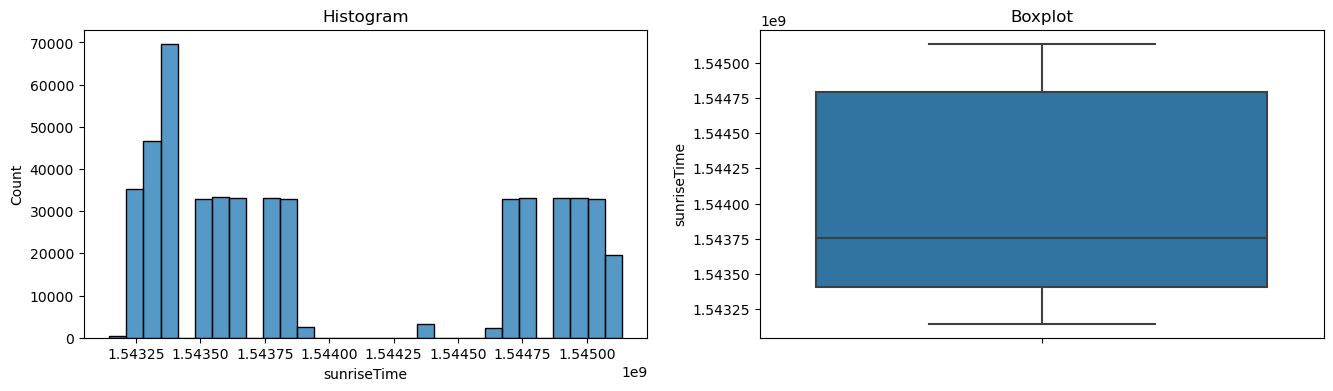


sunriseTime - After Capping


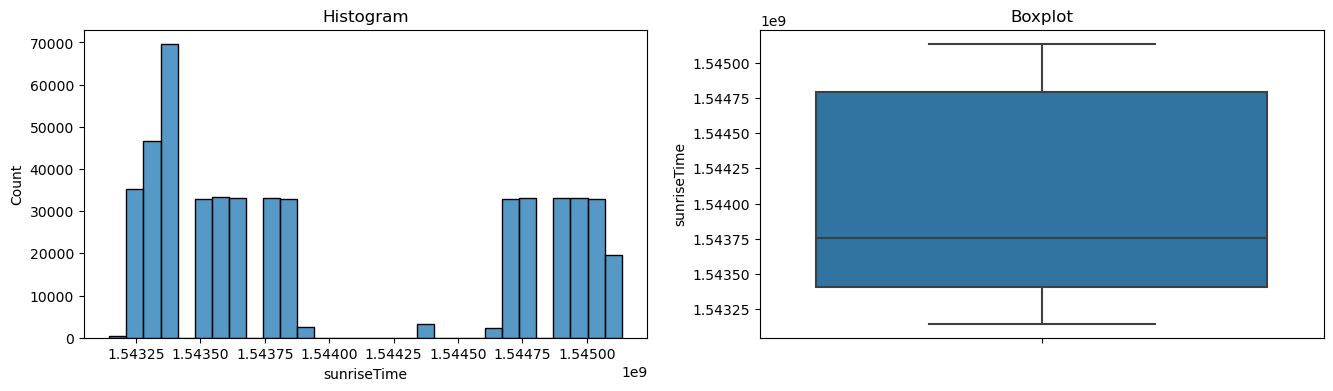


sunsetTime - Before Capping


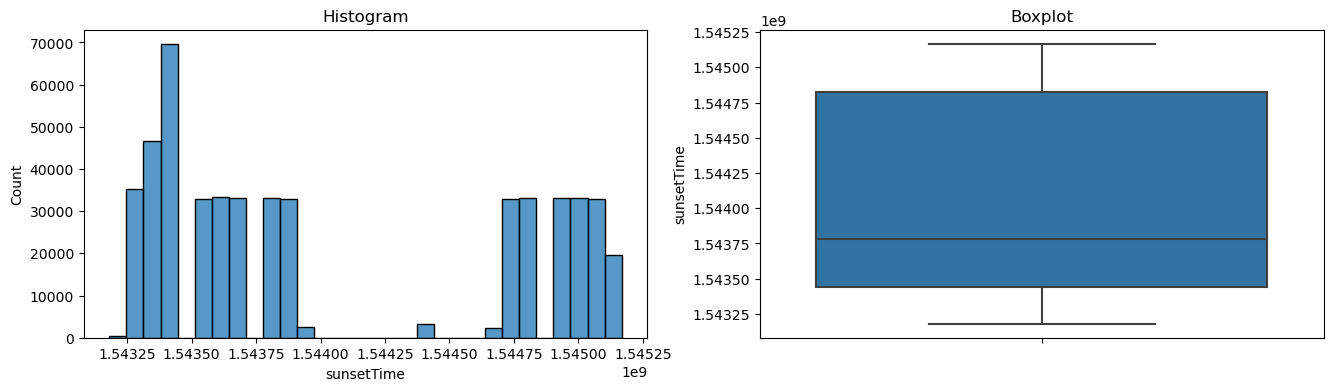


sunsetTime - After Capping


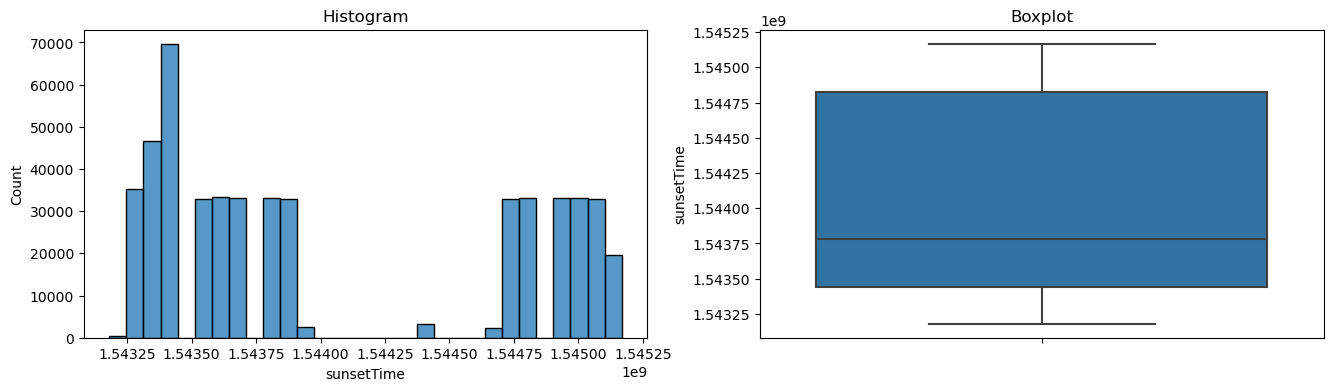


moonPhase - Before Capping


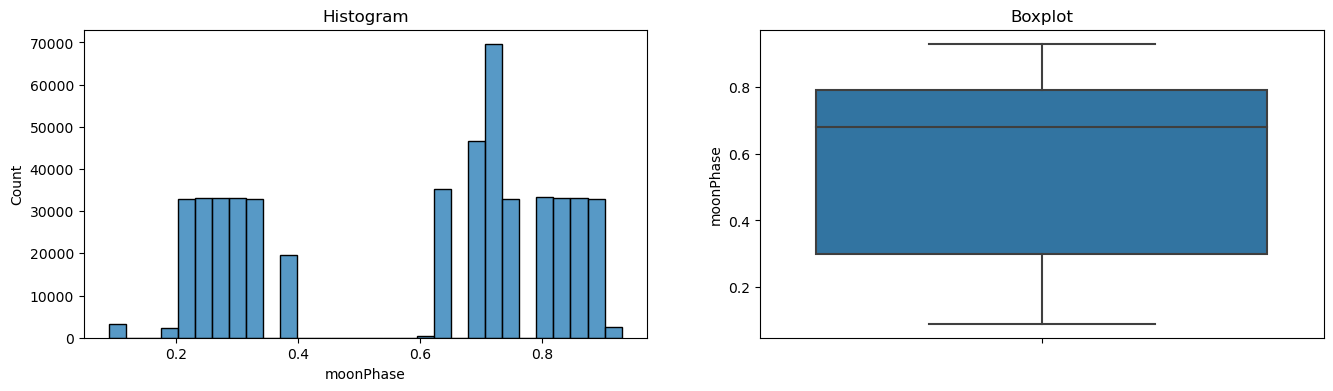


moonPhase - After Capping


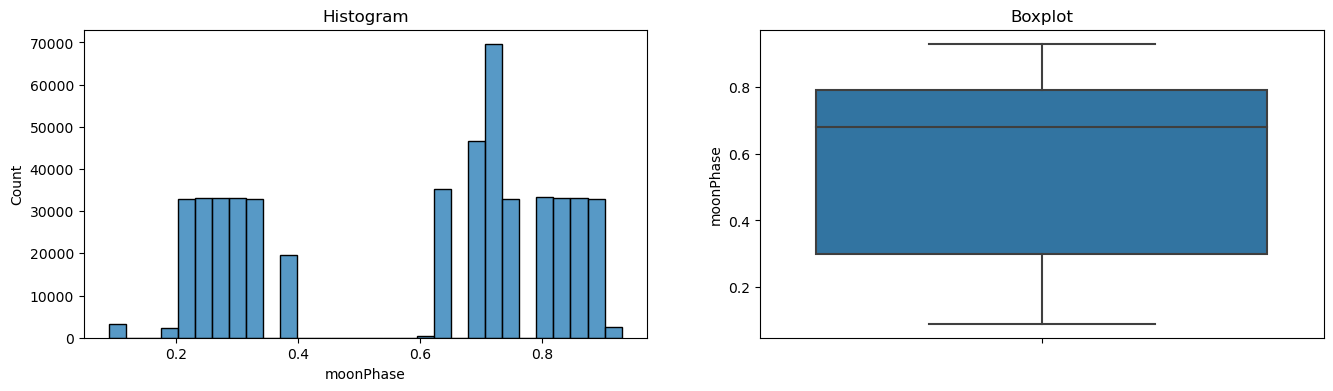


uvIndexTime - Before Capping


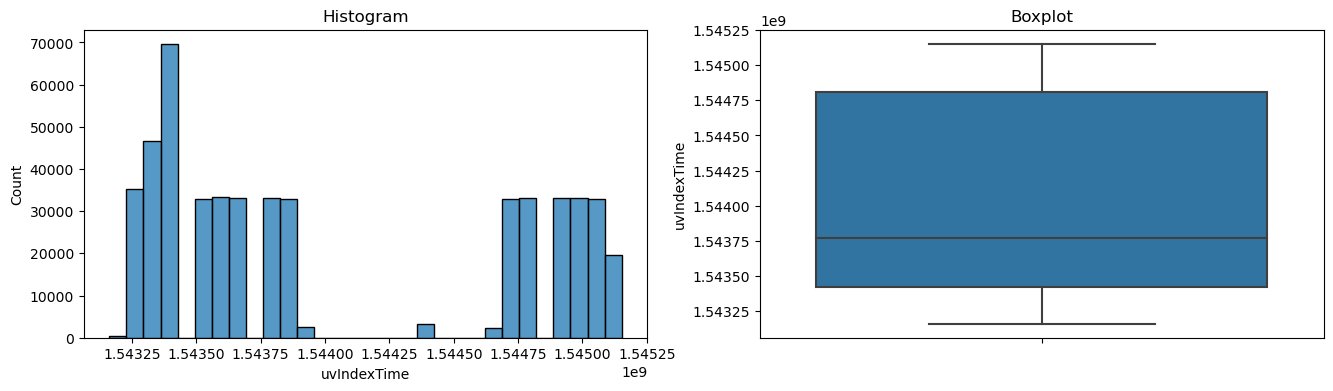


uvIndexTime - After Capping


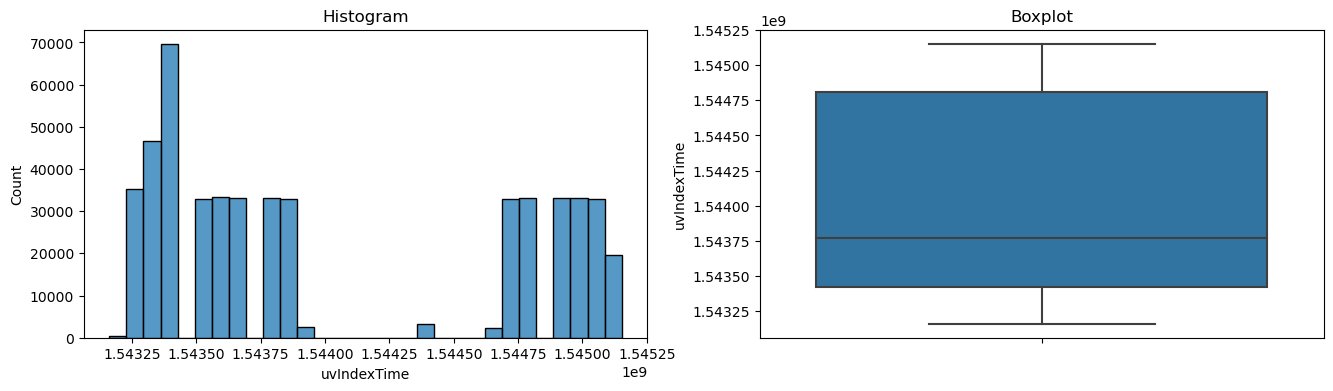


temperatureMinTime - Before Capping


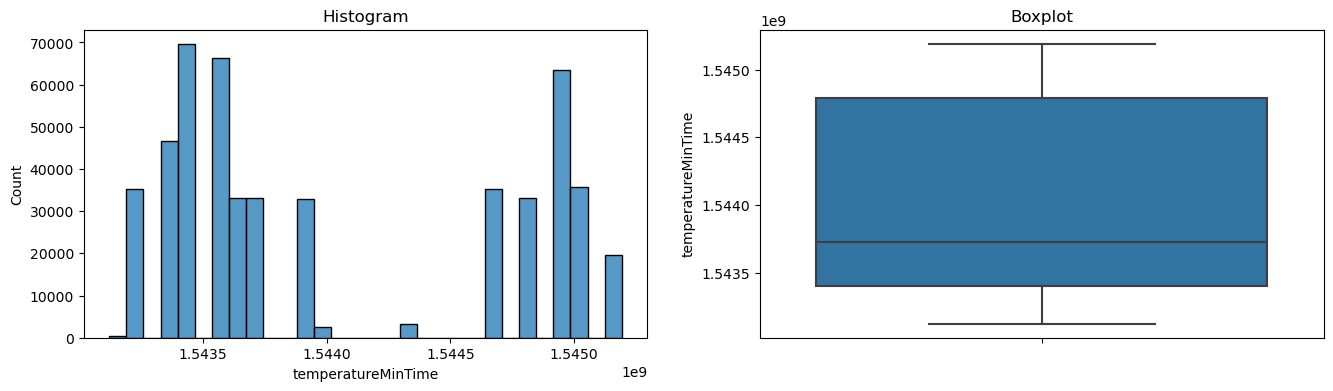


temperatureMinTime - After Capping


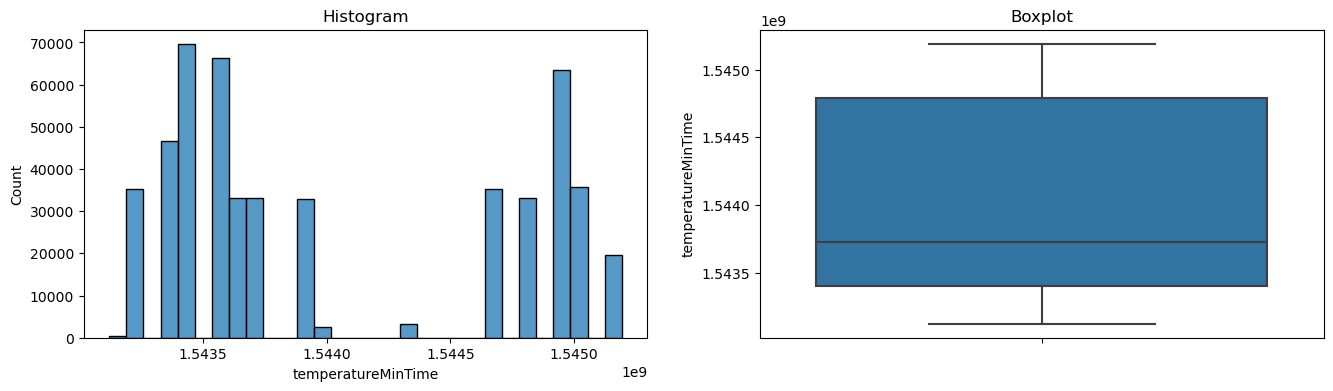


temperatureMax - Before Capping


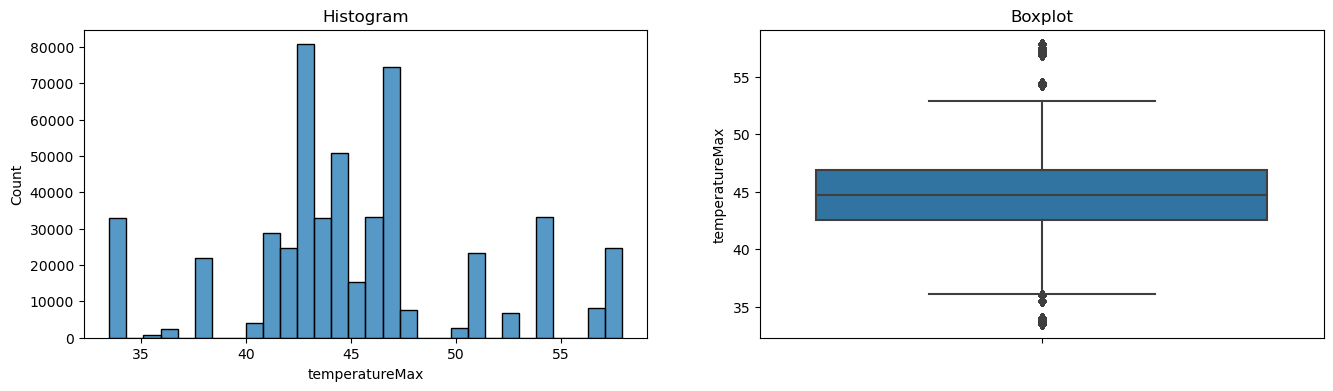


temperatureMax - After Capping


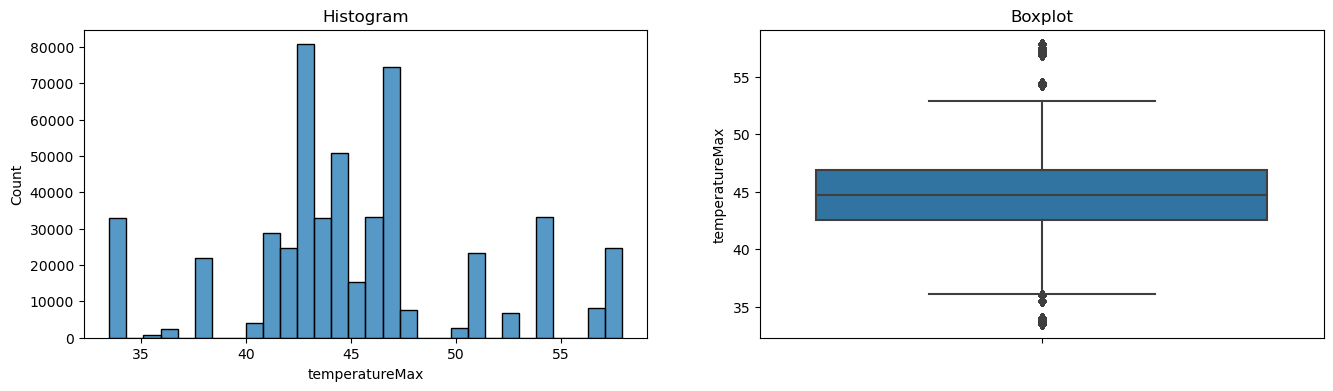


temperatureMaxTime - Before Capping


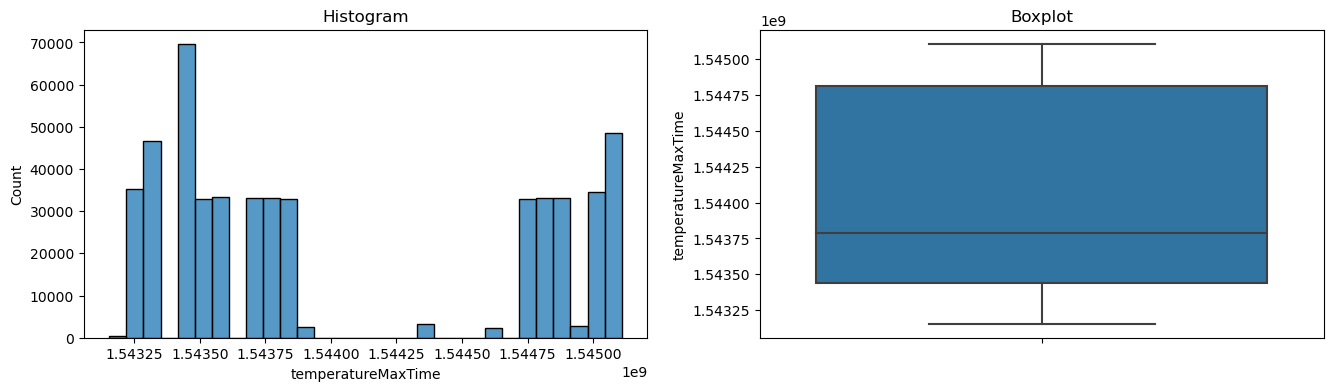


temperatureMaxTime - After Capping


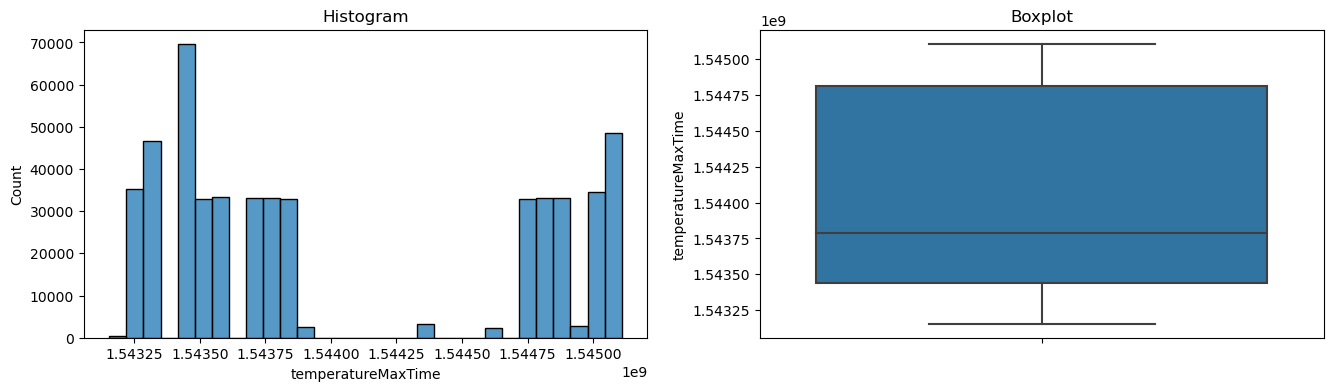


apparentTemperatureMinTime - Before Capping


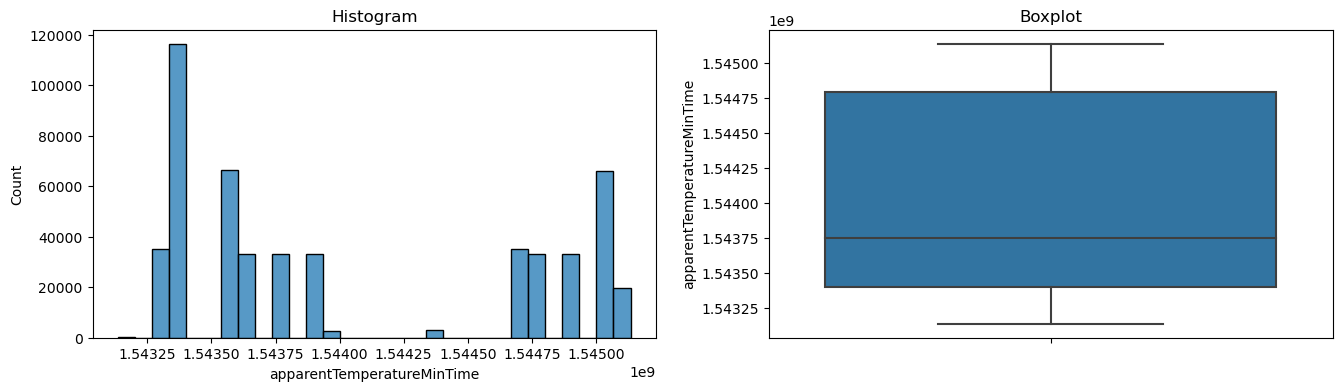


apparentTemperatureMinTime - After Capping


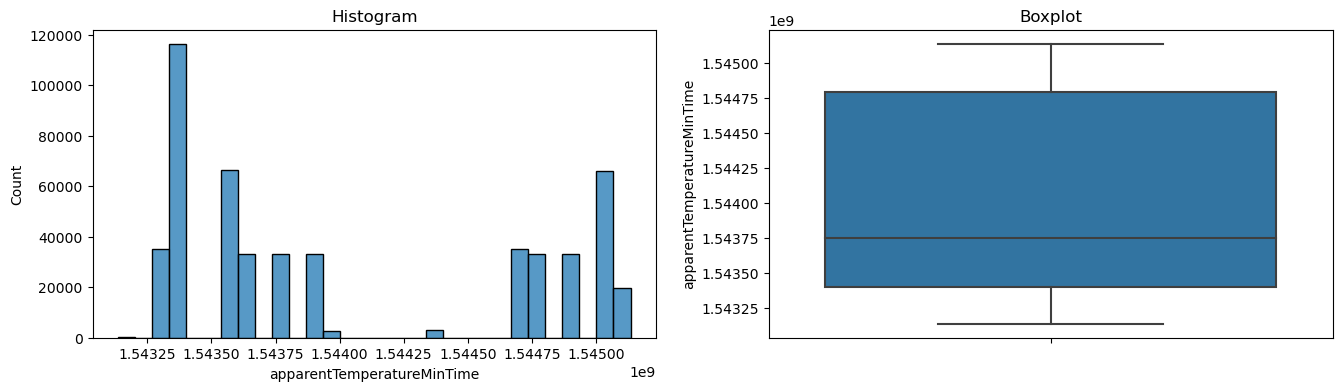


apparentTemperatureMaxTime - Before Capping


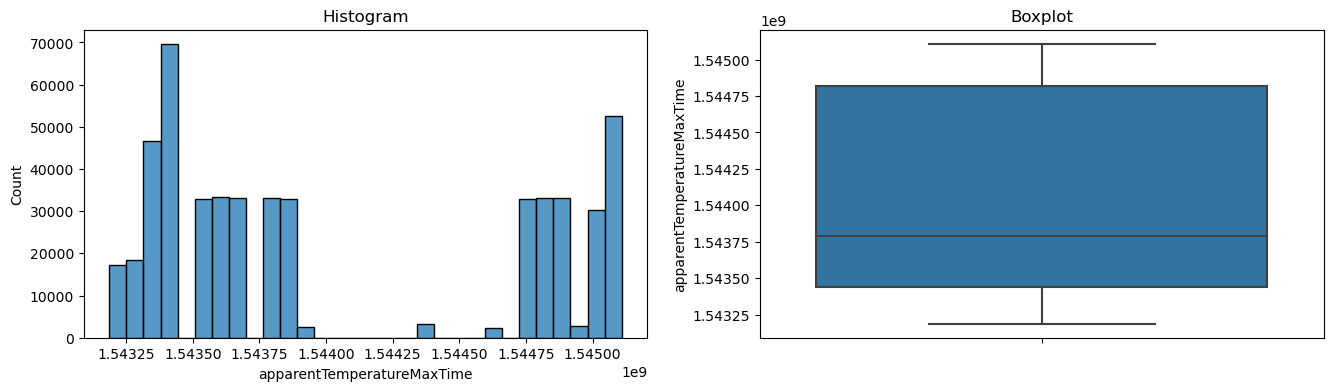


apparentTemperatureMaxTime - After Capping


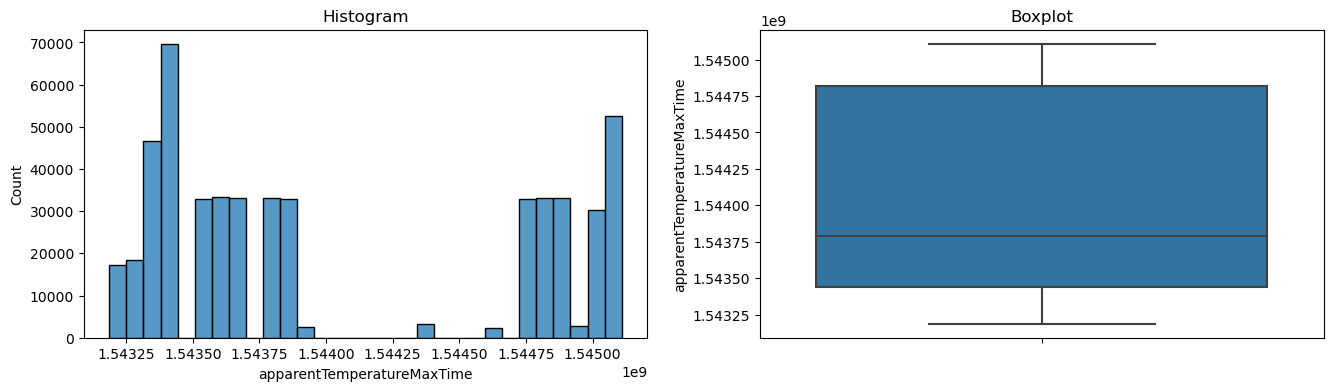


surge_multiplier - Before Capping


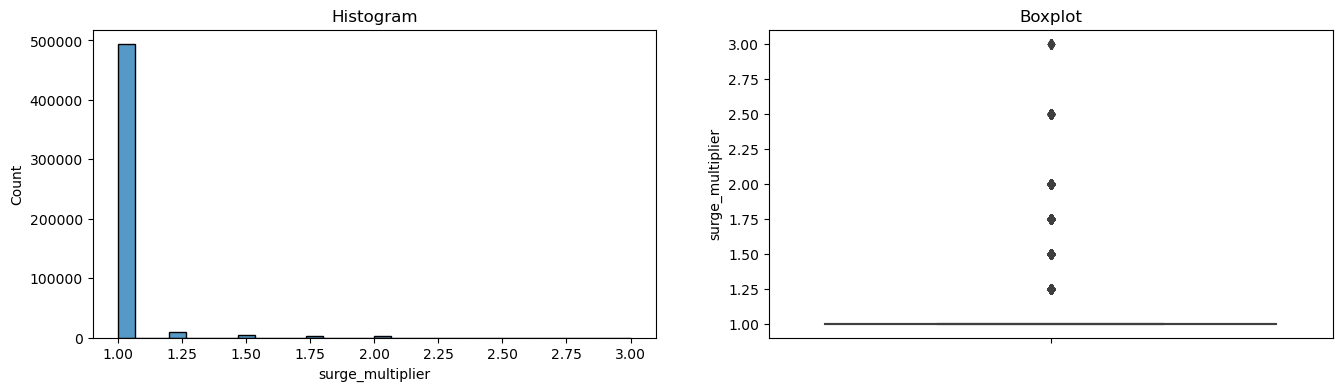


surge_multiplier - After Capping


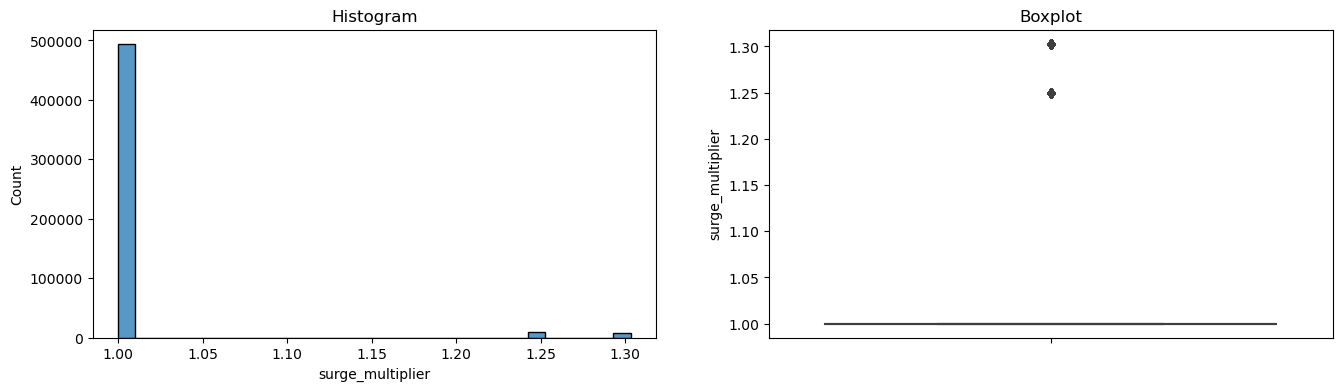


precipIntensity - Before Capping


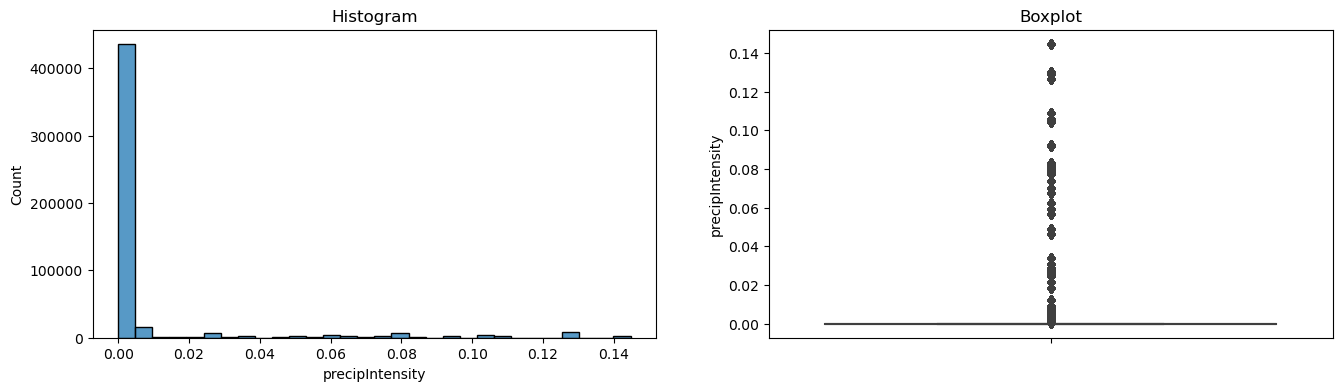


precipIntensity - After Capping


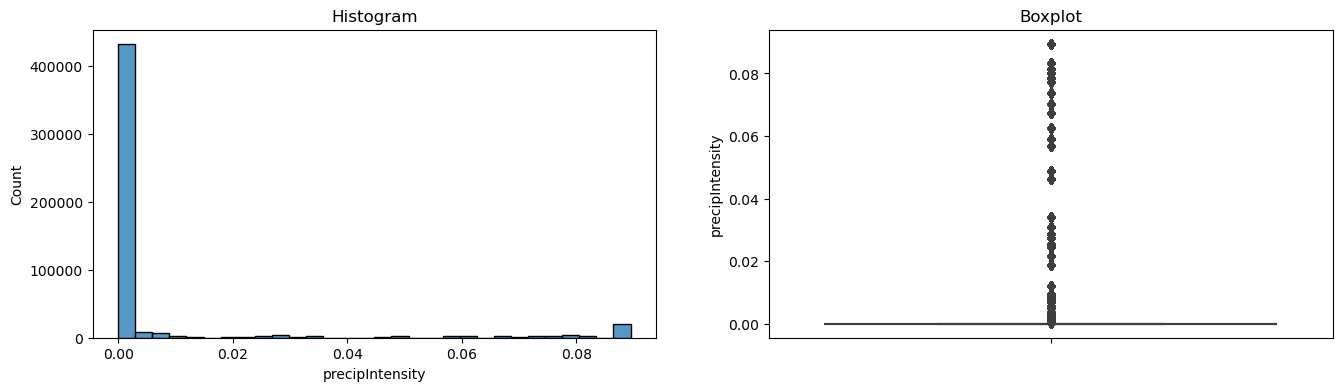


precipProbability - Before Capping


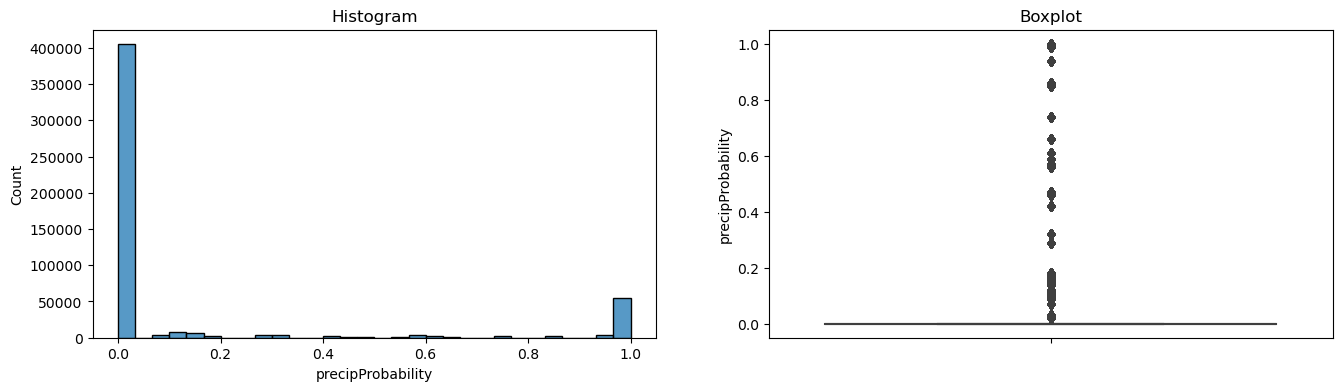


precipProbability - After Capping


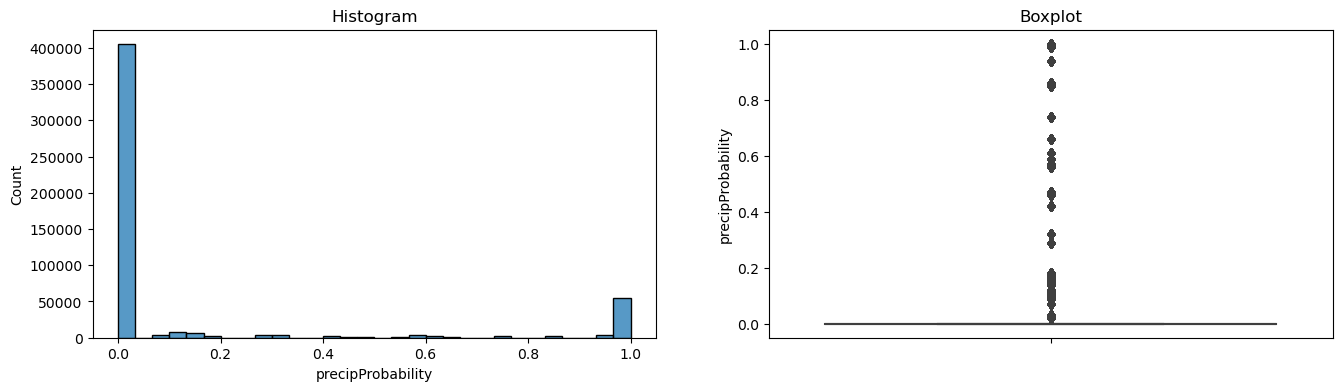


uvIndex - Before Capping


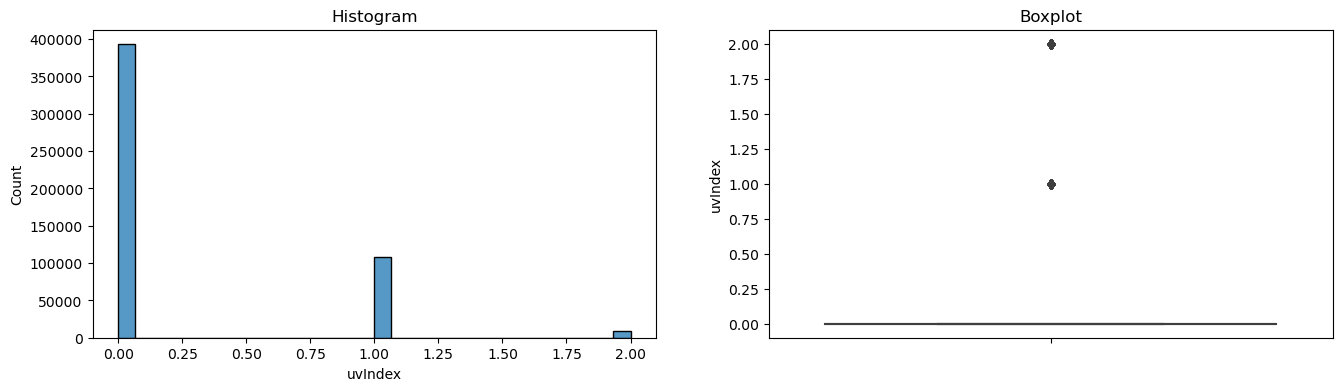


uvIndex - After Capping


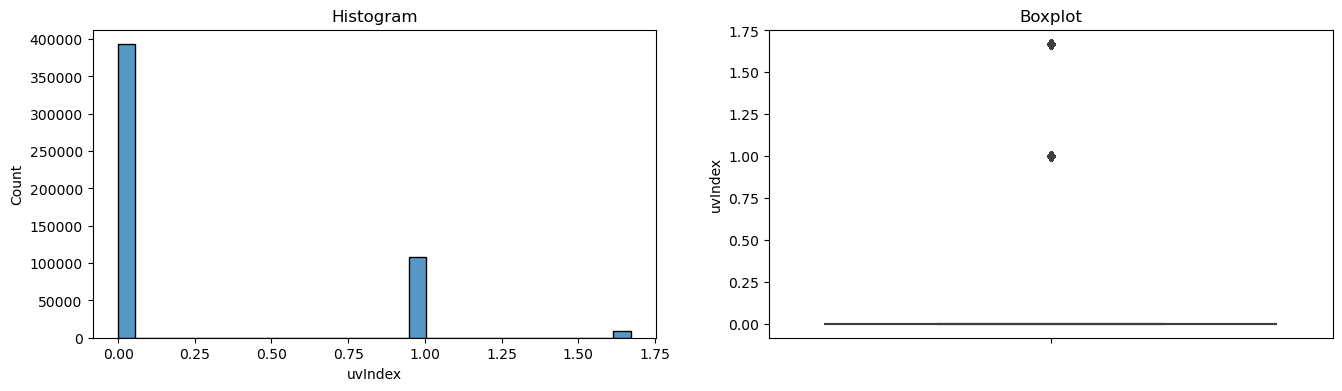

In [127]:
# Hasil yang telah diperoleh berdasarkan distribution normal dan skewed
distribution_normal = ['timestamp', 'hour', 'day', 'month', 'longitude', 'apparentTemperature', 'humidity', 'windSpeed', 'windGustTime', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'uvIndexTime', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime']
distribution_skewed = ['distance', 'surge_multiplier', 'latitude', 'temperature', 'precipIntensity', 'precipProbability', 'windGust', 'visibility', 'apparentTemperatureLow', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'precipIntensityMax', 'temperatureMin', 'apparentTemperatureMin', 'apparentTemperatureMax']

# Dibuat variabel baru untuk memisahkan 4 kolom yang memiliki variansi rendah
# Kolom dengan distribusi skewed
skewed = ['distance', 'latitude', 'temperature', 'windGust', 'visibility', 'apparentTemperatureLow', 'windBearing', 'cloudCover', 'visibility.1', 'precipIntensityMax', 'temperatureMin', 'apparentTemperatureMin', 'apparentTemperatureMax']

# Kolom dengan distribusi normal & yang memiliki variansi rendah
normal = ['timestamp', 'hour', 'day', 'month', 'longitude', 'apparentTemperature', 'humidity', 'windSpeed', 'windGustTime', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'uvIndexTime', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime', 'surge_multiplier', 'precipIntensity', 'precipProbability', 'uvIndex']

# Capping distribusi miring dengan metode IQR
winsoriser_skewed = Winsorizer(capping_method='iqr', 
                               tail='both', 
                               fold=3, 
                               variables=skewed)
X_train_capped_skewed = winsoriser_skewed.fit_transform(X_train)
X_test_capped_skewed = winsoriser_skewed.transform(X_test)

# Capping kolom variansi rendah dengan metode Gaussian
winsoriser_low_variance = Winsorizer(capping_method='gaussian', 
                                     tail='both', 
                                     fold=3, 
                                     variables=normal)
X_train_capped_low_variance = winsoriser_low_variance.fit_transform(X_train)
X_test_capped_low_variance = winsoriser_low_variance.transform(X_test)

# Visualisasi distribusi sebelum dan sesudah capping
# Kolom dengan distribusi skewed
print("Visualisasi Distribusi Sebelum dan Sesudah Capping - Kolom dengan distribusi skewed:")
for kolom in skewed:
    print(f'\n{kolom} - Before Capping')
    diagnostic_plots(X_train, kolom)

    print(f'\n{kolom} - After Capping')
    diagnostic_plots(X_train_capped_skewed, kolom)

# Kolom dengan distribusi normal
print("Visualisasi Distribusi Sebelum dan Sesudah Capping - Kolom dengan distribusi normal:")
for kolom in normal:
    print(f'\n{kolom} - Before Capping')
    diagnostic_plots(X_train, kolom)

    print(f'\n{kolom} - After Capping')
    diagnostic_plots(X_train_capped_low_variance, kolom)


# Feature Engineering

## Pengujian Korelasi

In [128]:
#Membuat dataframe baru untuk pengujian korelasi
train_data = pd.concat([X_train, y_train], axis=1)

In [129]:
# Cek ulang mengenai missing value pada dataframe baru
train_data.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatur

**Cek Korelasi Antar Variabel Menggunakan Uji Korelasi**
- jika nilai skewness dibawah 0.5, diuji menggunakan metode korelasi Pearson
- jika nilai skewness diatas 0.5, diuji menggunakan metode korelasi Spearman

##### Menghitung korelasi antar kolom numerik

- Dipilihnya uji korelasi menggunakan Spearman dan Pearson yaitu:
- Jika Pearson, data terdistribusi normal dan memiliki hubungan linear antar variabel. 
- Jika Spearman, tidak memerlukan data terdistribusi normal atau memiliki hubungan linear. 

In [130]:
# Inisialisasi daftar untuk menyimpan hasil analisis
results = []

# Iterasi melalui kolom-kolom yang Anda ingin analisis
for kolom in num_cols:
    # Hitung skewness dari kolom saat ini
    skewness = train_data[kolom].skew()
    
    # Tentukan metode korelasi berdasarkan skewness
    if skewness < 0.5:
        # Uji korelasi menggunakan Pearson
        correlation_coefficient, p_value = pearsonr(train_data['price'], train_data[kolom])
        correlation_type = 'Pearson'
    else:
        # Uji korelasi menggunakan Spearman
        correlation_coefficient, p_value = spearmanr(train_data['price'], train_data[kolom])
        correlation_type = 'Spearman'
    
    # Tentukan keterangan korelasi berdasarkan p-value
    correlation_significance = 'Signifikan' if p_value <= 0.05 else 'Tidak Signifikan'
    
    # Tambahkan hasil analisis ke dalam daftar
    results.append({'Kolom': kolom, 'Korelasi': correlation_coefficient, 'p-value': p_value, 'Metode': correlation_type, 'Keterangan': correlation_significance})

# Konversi hasil analisis ke dalam DataFrame
results_df = pd.DataFrame(results)

# Menyimpan hasil dalam DataFrame yang diurutkan berdasarkan nilai korelasi
sorted_results = results_df.sort_values(by='Korelasi', ascending=False)

In [131]:
sorted_results

Kolom  Korelasi   p-value    Metode  \
4                      distance  0.333905  0.000000  Spearman   
5              surge_multiplier  0.166249  0.000000  Spearman   
6                      latitude  0.001927  0.168707   Pearson   
30                 visibility.1  0.001756  0.209770   Pearson   
16                   visibility  0.001756  0.209770   Pearson   
26                     pressure  0.001375  0.325928   Pearson   
13                    windSpeed  0.001120  0.423584   Pearson   
14                     windGust  0.000964  0.490866  Spearman   
43       apparentTemperatureMax  0.000882  0.528699  Spearman   
1                          hour  0.000803  0.566453   Pearson   
42   apparentTemperatureMinTime  0.000532  0.703737   Pearson   
15                 windGustTime  0.000490  0.726564   Pearson   
38           temperatureMinTime  0.000475  0.734205   Pearson   
23       apparentTemperatureLow  0.000454  0.745505   Pearson   
0                     timestamp  0.000446  0.750284   Pearson   
24   apparentTemperatureLowTime  0.000429  0.759438   Pearson   
37               temperatureMin  0.000425  0.761379   Pearson   
20           temperatureLowTime  0.000415  0.766894   Pearson   
36                  uvIndexTime  0.000411  0.769019   Pearson   
40           temperatureMaxTime  0.000409  0.770228   Pearson   
33                   sunsetTime  0.000405  0.772203   Pearson   
32                  sunriseTime  0.000405  0.772220   Pearson   
18          temperatureHighTime  0.000392  0.779605   Pearson   
3                         month  0.000391  0.779837   Pearson   
44   apparentTemperatureMaxTime  0.000388  0.781460   Pearson   
22  apparentTemperatureHighTime  0.000373  0.789689   Pearson   
21      apparentTemperatureHigh  0.000229  0.869957   Pearson   
29                      uvIndex  0.000227  0.871274  Spearman   
41       apparentTemperatureMin  0.000167  0.905005   Pearson   
8                   temperature  0.000070  0.959865   Pearson   
35           precipIntensityMax  0.000053  0.969812  Spearman   
17              temperatureHigh  0.000004  0.997897   Pearson   
28                   cloudCover  0.000002  0.999025   Pearson   
9           apparentTemperature -0.000096  0.945153   Pearson   
39               temperatureMax -0.000136  0.922401   Pearson   
2                           day -0.000245  0.860797   Pearson   
11            precipProbability -0.000286  0.837992  Spearman   
10              precipIntensity -0.000294  0.833850  Spearman   
31                        ozone -0.000338  0.809281   Pearson   
19               temperatureLow -0.000490  0.726325   Pearson   
25                     dewPoint -0.000609  0.663567   Pearson   
34                    moonPhase -0.001331  0.341600   Pearson   
12                     humidity -0.001400  0.317176   Pearson   
27                  windBearing -0.001423  0.309227   Pearson   
7                     longitude -0.001523  0.276552   Pearson   

          Keterangan  
4         Signifikan  
5         Signifikan  
6   Tidak Signifikan  
30  Tidak Signifikan  
16  Tidak Signifikan  
26  Tidak Signifikan  
13  Tidak Signifikan  
14  Tidak Signifikan  
43  Tidak Signifikan  
1   Tidak Signifikan  
42  Tidak Signifikan  
15  Tidak Signifikan  
38  Tidak Signifikan  
23  Tidak Signifikan  
0   Tidak Signifikan  
24  Tidak Signifikan  
37  Tidak Signifikan  
20  Tidak Signifikan  
36  Tidak Signifikan  
40  Tidak Signifikan  
33  Tidak Signifikan  
32  Tidak Signifikan  
18  Tidak Signifikan  
3   Tidak Signifikan  
44  Tidak Signifikan  
22  Tidak Signifikan  
21  Tidak Signifikan  
29  Tidak Signifikan  
41  Tidak Signifikan  
8   Tidak Signifikan  
35  Tidak Signifikan  
17  Tidak Signifikan  
28  Tidak Signifikan  
9   Tidak Signifikan  
39  Tidak Signifikan  
2   Tidak Signifikan  
11  Tidak Signifikan  
10  Tidak Signifikan  
31  Tidak Signifikan  
19  Tidak Signifikan  
25  Tidak Signifikan  
34  Tidak Signifikan  
12  Tidak Signifikan  
27  Tidak Signifikan  


##### Menghitung Korelasi Kolom Kategorikal

- Dipilihnya uji korelasi Kendalltau karena salah satu metode yang digunakan untuk mengukur tingkat hubungan atau korelasi antara dua variabel ordinal atau kategorikal, Uji Kendall's Tau tidak memerlukan asumsi tentang distribusi dari variabel-variabel yang diuji, sehingga lebih fleksibel dalam berbagai situasi.

**Pada kolom ID, timestamp, datetime, timezone memiliki tipe data object akan tetapi 4 kolom tersebut tidak termasuk kolom kategorikal.**

In [132]:
# Kolom-kolom yang tidak ingin dimasukkan ke dalam cat_cols
exclude_cols = ['id', 'timestamp', 'datetime', 'timezone']

# Filter kolom-kolom kategorikal
cat_cols = X_train.columns[(X_train.dtypes == object) & (~X_train.columns.isin(exclude_cols))]

In [133]:
# Inisialisasi dictionary untuk menyimpan nilai korelasi Kendall dan p-value
kendall_correlation = {}

# Loop melalui setiap kolom kategori (cat_cols)
for kolom in cat_cols:
    # Hitung korelasi Kendall antara kolom saat ini dan variabel target (price)
    kendall_corr, p_value = kendalltau(train_data['price'], train_data[kolom])
    
    # Tentukan keterangan korelasi berdasarkan p-value
    correlation_significance = 'Signifikan' if p_value <= 0.05 else 'Tidak Signifikan'
    
    # Simpan nilai korelasi dan p-value dalam dictionary
    kendall_correlation[kolom] = {'Kendall Correlation': kendall_corr, 'p-value': p_value, 'Keterangan': correlation_significance}

# Konversi hasil analisis ke dalam DataFrame
kendall_df = pd.DataFrame.from_dict(kendall_correlation, orient='index')
kendall_df.index.name = 'Kolom'

# Tampilkan hasil dengan pengurutan berdasarkan p-value
kendall_df_sorted = kendall_df.sort_values(by='p-value')

In [134]:
kendall_df_sorted

Kendall Correlation        p-value        Keterangan
Kolom                                                              
cab_type                 -0.057525   0.000000e+00        Signifikan
product_id                0.050949   0.000000e+00        Signifikan
name                     -0.397540   0.000000e+00        Signifikan
destination              -0.031716  6.895493e-226        Signifikan
source                   -0.012563   5.197415e-37        Signifikan
icon                      0.001547   1.374001e-01  Tidak Signifikan
long_summary              0.000770   4.521781e-01  Tidak Signifikan
short_summary            -0.000274   7.915531e-01  Tidak Signifikan

- Kolom numerikal yang memiliki korelasi kuat dengan 'price' :
1. distance
2. surge multiplier

- Kolom kategorikal yang memiliki korelasi :
1. cab_type
2. name
3. product_id (tidak termasuk kolom yang berkorelasi walaupun p-value nya menunjukan korelasi)
4. destination
5. source

- Membagi kolom numerik dan kategorikal berdasarkan variabel yang berkorelasi dengan price

In [135]:
# Split antara kolom numerik dan kategorikal
selected_numeric_cols = ['distance', 'surge_multiplier']
selected_categorical_cols = ['cab_type', 'name', 'destination', 'source']
df_selected = selected_numeric_cols + selected_categorical_cols

# Encoding & Scaling

In [136]:
# Split train set ke numerik dan kategorikal
X_train_num = X_train[selected_numeric_cols]
X_train_cat = X_train[selected_categorical_cols]

# Split test set ke numerik dan kategorikal
X_test_num = X_test[selected_numeric_cols]
X_test_cat = X_test[selected_categorical_cols]

## Encoding

- Digunakannya encoder = OneHotEncoder karena cocok untuk data yang dimana tidak ada hubungan ordinal antara kategorinya (tidak ada tingkat urutan yang bermakna antara kategori)

In [138]:
# Define Encoder
encoder = OneHotEncoder()

# Fit the Encoder
encoder.fit(X_train_cat)

# Transform the data
X_train_cat_encode = encoder.transform(X_train_cat)
X_test_cat_encode = encoder.transform(X_test_cat)

In [139]:
#Concat data numerikal dan data kategorikal yang telah di encode
# Gabungkan data numerikal dan data kategorikal yang telah diencode
X_train_encoded = pd.concat([X_train_num.reset_index(drop=True), pd.DataFrame(X_train_cat_encode.toarray())], axis=1)
X_test_encoded = pd.concat([X_test_num.reset_index(drop=True), pd.DataFrame(X_test_cat_encode.toarray())], axis=1)

X_train_encoded = pd.concat([X_train_num.reset_index(drop=True), pd.DataFrame(X_train_cat_encode.toarray())], axis=1)

## Scaling

- Dipilihnya MinMaxScaler karena kemampuannya untuk memelihara rentang asli data dan menghindari perubahan distribusi serta dapat mengurangi efek outlier karena rentang yang lebih kecil.

In [140]:
# Konversi nama kolom menjadi string
X_train_encoded.columns = [str(col) for col in X_train_encoded.columns]
X_test_encoded.columns = [str(col) for col in X_test_encoded.columns]

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler pada data numerikal dari set pelatihan
scaler.fit(X_train_encoded)

# Transformasi data numerikal dari set pelatihan dan pengujian
X_train_scaled = scaler.transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Modeling

- Model yang digunakan yaitu LinearRegression karena hubungan antar variabel dependen dan variabel independen bersifat linear yang berarti perubahan dalam variabel independen berkontribusi secara proporsional terhadap perubahan dalam variabel independen
- Linear Regression sering digunakan dalam kasus seperti memprediksi nilai variabel dependen berdasarkan nilai variabel independen yang diberikan dimana model ini dapat memberikan wawasan yang berguna tentang hubungan antara variabel-variabel tersebut.

In [141]:
#Define Model
model = LinearRegression()

In [142]:
# Train model 
model.fit(X_train_scaled, y_train)

LinearRegression()

# Model Evaluation

- Adapun tujuan dari model evaluation yaitu mengukur kinerja dan keefektifan model yang telah dibangun dalam memecahkan maslaah tertentu. Evaluasi model membantu memahami sejauh mana model dapat memprediksi keakuratan.

In [38]:
# Evaluation the model performance on train  & test set
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Metric Evaluation
print('MAE - Train Set : ', mean_absolute_error(y_train, y_pred_train))
print('MAE - Test Set : ', mean_absolute_error(y_test, y_pred_test))
print('')

print('MSE - Train Set  : ', mean_squared_error(y_train, y_pred_train))
print('MSE - Test Set   : ', mean_squared_error(y_test, y_pred_test))
print('')

print('RMSE - Train Set : ', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test, squared=False))
print('')

print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test))
print('')

MAE - Train Set :  1.7503591663353844
MAE - Test Set :  1.7455985132380156

MSE - Train Set  :  6.2093473393981125
MSE - Test Set   :  6.197740045286987

RMSE - Train Set :  2.4918562035956473
RMSE - Test Set  :  2.489526068408802

R2 Score - Train Set :  0.9286150101364832
R2 Score - Test Set  :  0.9285813217122829



/Users/putriarzalya/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/putriarzalya/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- MAE mengukur rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya, dimana nilai MAE memberikan informasi tentang kesalahan prediksi secara langsung.
- R2 mengukur seberapa baik variabilitas dari variabel dependen. R2 memberikan gambaran mengenai seberapa baik model sesuai dengan data keseluruhan.
- Dalam konteks distribusi harga yang berkisar 0-40$, nilai MAE 1.75 dapat dianggap relatif baik. Hal ini menunjukkan bahwa rata-rata selisih antara nilai prediksi dan nilai aktual sekitar 1.75$. Dengan rentang harga tersebut, MAE 1.75 mungkin dianggap sebagai kesalahan yang cukup rendah.
- Dengan R2 sebesar 0.92 menandakan sekitar 92% variabilitas dalam variabel target (harga perjalanan) dapat dijelaskan oleh fitur atau variabel independen dalam model.

# Model Saving

In [39]:
# Save list kolom kategorikal
with open('list_cat_cols.txt', 'w') as file_1:
  json.dump(selected_categorical_cols, file_1)

# Save list kolom numerika;
with open('list_num_kols.txt', 'w') as file_2:
  json.dump(selected_numeric_cols, file_2)

# Save Encoder
with open('encoder.pkl', 'wb') as file_3:
  pickle.dump(encoder, file_3)

# Save scaler
with open('scaler.pkl', 'wb') as file_4:
  pickle.dump(scaler, file_4)

# Save model
with open('model.pkl', 'wb') as file_5:
  pickle.dump(model, file_5)

## Assumption of Linear Regression

**1.Linear Relationship**
- Memastikan bahwa hubungan antara variabel independen dan variabel dependen adalah linear memungkinkan interpretasi yang jelas tentang bagaimana perubahan dalam satu variabel memengaruhi variabel lainnya. Hal ini memungkinkan model untuk memberikan estimasi yang konsisten dan dapat diandalkan.

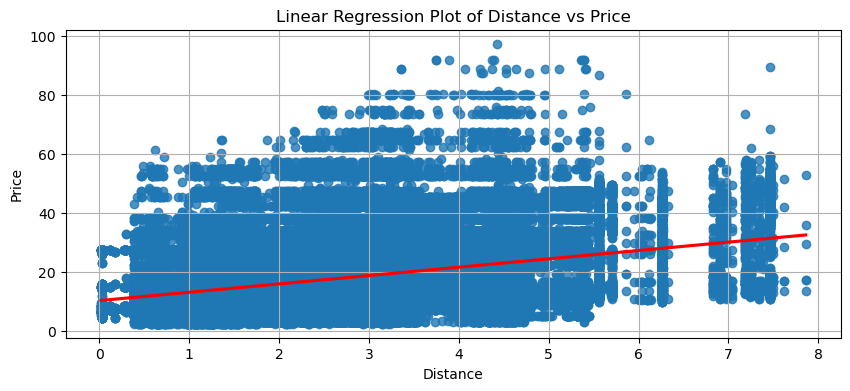

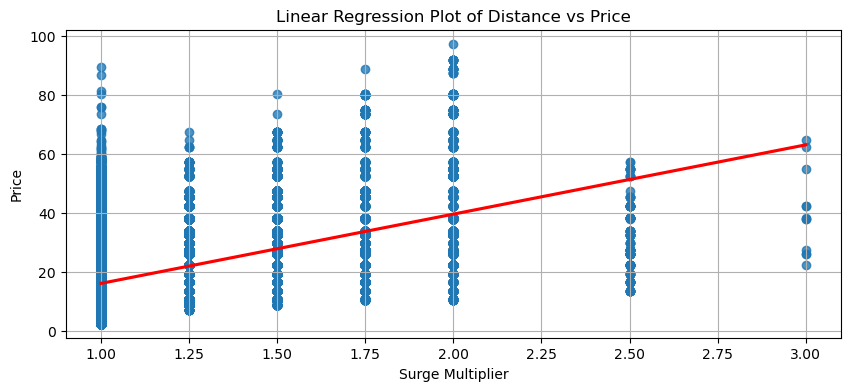

In [104]:
# Plot regresi linear antara distance dan price
plt.figure(figsize=(10, 4))
sns.regplot(data=df, x='distance', y='price', ci=None, line_kws={'color': 'red'})
plt.title('Linear Regression Plot of Distance vs Price')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Plot regresi linear antara surge_multipier dan price
plt.figure(figsize=(10, 4))
sns.regplot(data=df, x='surge_multiplier', y='price', ci=None, line_kws={'color': 'red'})
plt.title('Linear Regression Plot of Distance vs Price')
plt.xlabel('Surge Multiplier')
plt.ylabel('Price')
plt.grid(True)
plt.show()

- Berdasarkan plot distance dan price, pola yang dihasilkan terlihat linear karena titik-titiknya menyebar cukup merata dan mengikuti pola garis lurus.
- Berdasarkan plot surge_multiplier dan price, pola yang dihasilkan cukup linear karena titik-titiknya menyebar tidak terlalu merata tapi tetap mengikuti pola garis lurus.

**2.No or Little Multicollinearity**

Multicollinearity merupakanfenomena di mana dua atau lebih variabel independen dalam model regresi memiliki korelasi yang tinggi satu sama lain.

In [53]:
# Create a function to calculate Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [58]:
# Check Multicolinearity pada X

calc_vif(X_train_num)

variables       VIF
0          distance  4.611557
1  surge_multiplier  4.611557

- Berdasarkan nilai VIF, diperoleh nilai yang rendah (dianggap rendah apabila dibawah 5) sehingga tidak mengindikasikan adanya multicollinearity yang signifikan.

**3.Multivariate Normality**

In [ ]:
# Get residuals
y_test_residuals = y_test - y_pred_test
y_test_residuals

441132   -0.715782
274010   -0.306648
194181   -1.224209
197807    4.350384
553729    0.346783
            ...   
251723   -2.134499
145644   -1.499846
148136    1.782635
284581   -2.046886
292845   -0.785341
Name: price, Length: 127685, dtype: float64

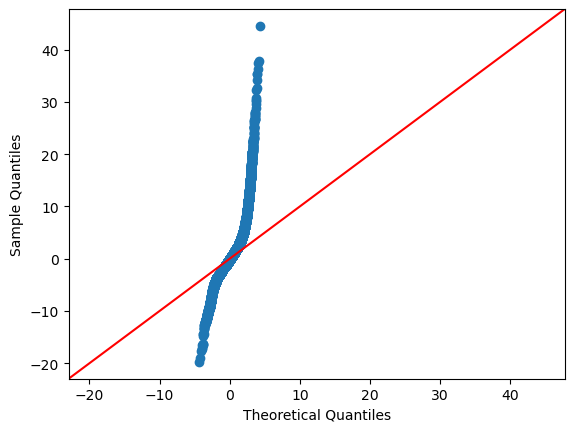

In [ ]:
# Menampilkan QQ plot
sm.qqplot(y_test_residuals, line ='45')
plt.show()

- Plot QQ menunjukkan bahwa distribusi data tidak sepenuhnya mengikuti distribusi normal. Meskipun tidak mengikuti distribusi normal secara sempurna, tetap ada kemungkinan untuk menerapkan metode yang memerlukan asumsi normalitas dalam analisis data. 
- Dengan plot seperti ini, kemungkinan hasilnya tidak optimal dan menyebabkan pelanggaran terhadap asumsi multivariate normality. 

**4.No Auto-Corellation**

In [ ]:
durbin_watson(y_test_residuals)

1.995503362246155

- Hasil yang diperoleh sebesar 1.995, range ideal untuk test ini yaitu 1.5 - 2.5 sehingga autocorellation pada model regresi linear ini tidak dipermasalahkan.

**5.Homoscedasticity**

- Homoscedasticity merupakan kesalahan konstan sepanjang nilai variabel dependent. Jika melanggar homoscedasticity berarti terjadi heteroscedasticity. Umumnya, varians non-konstan muncul karena adanya outlier atau nilai leverage yang ekstrim.

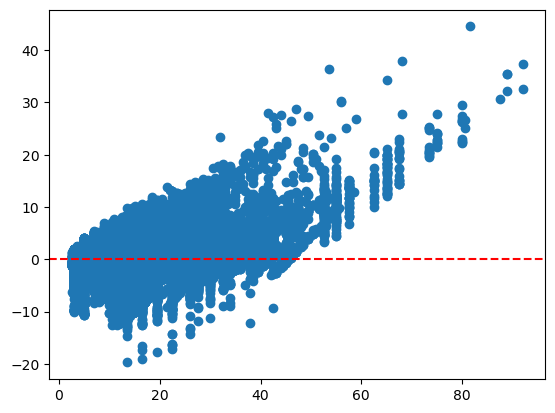

In [ ]:
plt.scatter(y_test, y_test_residuals)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

- Dapat dilihat dari plot scatter, y_test_residuals dan y_test memiliki pola linear cenderung sedikit naik menandakan adanya heteroscedascity. Heteroscedascity merupakan ketidakseimbangan dalam variabilitas dari kesalahan yang tidak konstan di seluruh rentang nilai prediktor. Hal ini tentu mempengaruhi pada penurunan ketepatan estimasi, ketidakpastian dalam prediksi, penurunan ketepatan uji hipotesis. 

# Conclusion

- Tingkat Kehadiran Pola dalam Data: Analisis harga perjalanan ride-hailing platform menunjukkan adanya pola dalam distribusi harga, yang mungkin dipengaruhi oleh faktor-faktor seperti jarak perjalanan, waktu, cuaca, dan jenis layanan taksi.

- Pengaruh Variabel-variabel Independen: Variabel-variabel independen seperti jarak perjalanan, waktu, dan cuaca dapat memiliki pengaruh signifikan terhadap harga perjalanan. Analisis regresi dapat membantu dalam memahami seberapa kuat hubungan antara variabel-variabel ini dengan harga.

- Evaluasi Model: Evaluasi model regresi, seperti menggunakan metrik MAE dan R-squared dapat memberikan gambaran tentang seberapa baik model dapat memprediksi harga perjalanan. MAE yang rendah dan R-squared yang tinggi menunjukkan bahwa model mampu memberikan perkiraan harga yang akurat.

- Asumsi Model: Penting untuk memeriksa asumsi-asumsi model regresi, seperti linearitas, normalitas, dan multikolinearitas. Pelanggaran asumsi-asumsi ini dapat mempengaruhi keandalan dan interpretasi model.

- Insight Bisnis: Analisis data dapat memberikan wawasan bisnis yang berharga, seperti pola preferensi pengguna, tren harga sepanjang waktu, dan dampak faktor-faktor eksternal seperti cuaca terhadap permintaan layanan.

- Kesimpulan ini dapat menjadi dasar untuk pengambilan keputusan dan perencanaan strategi lebih lanjut terkait harga perjalanan ride-hailing platform, serta memberikan landasan untuk pengembangan model yang lebih baik.

# Conceptual Problems

**1.Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression ! (Gunakan bahasa anda sendiri)**

- Hubungan Linier yaitu model Linear Regression mengasumsikan bahwa hubungan antara variabel independen (fitur) dan variabel dependen (target) adalah linier. Pada kasus ini, asumsi ini bermakna bahwa perubahan dalam variabel independen berhubungan dengan perubahan yang proporsional dalam variabel dependen.

- No or little multicollinearity: Asumsi ini menunjukkan bahwa tidak ada hubungan linier sempurna antara dua atau lebih variabel independen. Dalam konteks Linear Regression, ini berarti tidak ada fitur yang sangat berkorelasi satu sama lain.

- Multivariate Normality: Residual seharusnya memiliki distribusi normal. Ini berarti, residual seharusnya terdistribusi secara simetris di sekitar nilai rata-rata nol.

- No Auto-Corellation: mengacu pada asumsi bahwa tidak ada korelasi antara nilai residual (selisih antara nilai yang diamati dan nilai yang diprediksi oleh model) pada satu waktu dengan nilai residual pada waktu lainnya

- Homoscedasticity: Varians dari residual harus konstan, yang berarti variasi dari residual harus seragam di sepanjang rentang nilai variabel independen.




**2.Tunjukkan dan tafsirkan arti dari slope dan intercept yang didapat dari model yang telah Anda bangun !**

- "slope" mengacu pada koefisien atau bobot yang diberikan kepada setiap fitur dalam model Linear Regression, sedangkan "intercept" adalah titik di mana garis regresi memotong sumbu y (nilai target) ketika semua fitur memiliki nilai nol.

- Pada kasus ini, setelah melakukan pemodelan Linear Regression, kemudian diperoleh nilai slope (koefisien) untuk setiap fitur yang dimodelkan dan nilai intercept yang memberikan informasi tambahan tentang bagaimana model Linear Regression memprediksi target.

- Slope (Koefisien):

- Setiap koefisien menggambarkan seberapa besar perubahan yang diharapkan dalam nilai target (harga) ketika fitur yang bersangkutan mengalami kenaikan satu satuan, dengan semua fitur lainnya tetap konstan. Jika koefisien positif, maka kenaikan dalam fitur tersebut akan berkontribusi pada peningkatan nilai target (harga), sedangkan jika negatif, maka kenaikan dalam fitur tersebut akan berkontribusi pada penurunan nilai target. Contohnya, jika koefisien untuk fitur "distance" adalah 5, itu berarti bahwa setiap peningkatan satu unit dalam jarak akan mengakibatkan kenaikan sebesar 5 unit dalam harga, asumsi semua fitur lainnya tetap tidak berubah. Tidak ada informasi yang langsung menunjukkan nilai koefisien atau fitur-fitur mana yang memiliki pengaruh langsung pada prediksi 12.53. Namun, dapat diasumsikan bahwa seluruh model Linear Regression, termasuk koefisien dari setiap fitur yang diikutsertakan dalam model, telah berkontribusi pada prediksi akhir ini.

- Intercept:

- Intercept adalah titik di mana garis regresi memotong sumbu y (nilai target) ketika semua fitur memiliki nilai nol. Ini memberikan nilai prediksi dasar (harga minimum yang diharapkan) ketika semua fitur memiliki nilai nol. Jika intercept besar dan positif, itu berarti bahwa nilai dasar yang diharapkan untuk harga juga besar, sedangkan jika intercept negatif, nilai dasar yang diharapkan lebih kecil. Misalnya, jika intercept adalah 10, ini berarti bahwa tanpa mempertimbangkan fitur lainnya, harga minimum yang diharapkan adalah 10. Jika nilai prediksi adalah 12.53, ini menunjukkan bahwa nilai dasar yang diharapkan untuk harga (price) adalah sebesar 12.53, tanpa mempertimbangkan nilai fitur lainnya. Dengan kata lain, harga minimum yang diharapkan adalah 12.53.

- Dengan kata lain, slope dan intercept digunakan untuk membentuk persamaan garis regresi yang memberikan prediksi harga berdasarkan nilai fitur-fitur yang diberikan. Prediksi harga dapat dihitung dengan menggunakan persamaan garis regresi dengan memasukkan nilai fitur-fitur ke dalam persamaan tersebut.